<a id="top_section"></a>
<div align='center'><font size="5" color="#000000"><b>Prédiction du risque de défaut de paiement des clients d'une banque</b></font></div>
<hr>
<div align='center'><font size="4" color="#000000">Optimisation et déploiement d'un modèle de machine learning</font></div>
<hr>

## Sommaire

- [**Introduction**](#Introduction)
    - [Contexte](#Contexte)
    - [Objectifs du projet](#Objectifs-du-projet)
- [**Importation des packages**](#Importation-des-packages)
- [**Exploration et préparation des données**](#Exploration-et-préparation-des-données)
    - [Chargement des données](#Chargement-des-données)
    - [Aperçu des données](#Aperçu-des-données)
    - [Gestion des valeurs manquantes](#Gestion-des-valeurs-manquantes)
        - [Suppression des variables contenant trop de valeurs manquantes](#Suppression-des-variables-contenant-trop-de-valeurs-manquantes)
        - [Imputation des valeurs manquantes](#Imputation-des-valeurs-manquantes)
    - [Traitement des doublons](#Traitement-des-doublons)
    - [Exploration des données](#Exploration-des-données)
        - [Analyse univariée](#Analyse-univariée)
            - [Représentation graphique](#Représentation-graphique)
            - [Gestion des valeurs aberrantes](#Gestion-des-valeurs-aberrantes)
        - [Analyse bivariée](#Analyse-bivariée)
            - [Relations entre la variable cible et les variables numériques](#Relations-entre-la-variable-cible-et-les-variables-numériques)
            - [Relations entre la variable cible et les variables catégorielles](#Relations-entre-la-variable-cible-et-les-variables-catégorielles)    
    - [Feature Engineering](#Feature-Engineering)
        - [Création de nouvelles variables](#Création-de-nouvelles-variables)
        - [Transformation des variables](#Transformation-des-variables)
            - [Transformation logarithmique](#Transformation-logarithmique)
            - [Séparation de la variable cible des variables prédictives](#Séparation-de-la-variable-cible-des-variables-prédictives)
            - [Standardisation des variables numériques](#Standardisation-des-variables-numériques)
            - [Encodage des variables catégorielles](#Encodage-des-variables-catégorielles)
    - [Séparation des données en deux ensembles : entraînement et test](#Séparation-des-données-en-deux-ensembles-:-entraînement-et-test)
    - [Equilibrage des classes](#Equilibrage-des-classes)
- [**Modélisation**](#Modélisation)
    - [Définition du score métier](#Définition-du-score-métier)
    - [Entraînement des modèles](#Entraînement-des-modèles)
        - [Fonction : Optimisation des hyperparamètres](#Fonction-:-Optimisation-des-hyperparamètres)
        - [Dummy Classifier](#Dummy-Classifier)
        - [Modèles linéaires](#Modèles-linéaires)
            - [Régression logistique](#Régression-logistique)
            - [SVM linéaire](#SVM-linéaire)
        - [Modèles non linéaires](#Modèles-non-linéaires)
            - [K-Nearest Neighbors](#K-Nearest-Neighbors)
            - [SVM à noyau](#SVM-à-noyau)
        - [Modèles ensemblistes](#Modèles-ensemblistes)
            - [Random Forest](#Random-Forest)
            - [Gradient Boosting](#Gradient-Boosting)
            - [XGBoost](#XGBoost)
        - [Réseaux de neurones](#Réseaux-de-neurones)
            - [Perceptron multicouches](#Perceptron-multicouches)
            - [Deep Neural Networks](#Deep-Neural-Networks)
    - [Évaluation des modèles](#Évaluation-des-modèles)
        - [Métriques de performance](#Métriques-de-performance)
        - [Courbes ROC](#Courbes-ROC)
        - [Matrices de confusion](#Matrices-de-confusion)
    - [Sélection et enregistrement du modèle final](#Sélection-et-enregistrement-du-modèle-final)
- [**Analyse de la feature importance**](#Analyse-de-la-feature-importance)
    - [Analyse globale](#Analyse-globale)
    - [Analyse locale](#Analyse-locale)
        - [Visualisation des valeurs SHAP pour un client ayant remboursé son prêt](#Visualisation-des-valeurs-SHAP-pour-un-client-ayant-remboursé-son-prêt)
        - [Visualisation des valeurs SHAP pour un client ayant un défaut de paiement](#Visualisation-des-valeurs-SHAP-pour-un-client-ayant-un-défaut-de-paiement)
- [**Conclusion**](#Conclusion)

## Introduction

### Contexte

Dans le secteur bancaire, l'octroi de crédits à la consommation est une activité clé qui nécessite une évaluation précise du risque associé à chaque demande. Les institutions financières doivent être capables de prédire avec fiabilité la probabilité qu'un client rembourse un crédit, afin de minimiser les pertes financières et optimiser la gestion des ressources.

Ce projet vise à développer un outil de **scoring crédit** pour évaluer le risque de défaut de paiement des clients. Le scoring crédit est un processus de classification qui attribue un score à chaque demande de crédit en fonction de divers facteurs, afin de déterminer la probabilité que le client ne rembourse pas son emprunt. Cette évaluation permet de classer les demandes en crédits accordés ou refusés.

### Objectifs du projet

1. **Développement d'un modèle de scoring** : Construire un algorithme de classification capable de prédire la probabilité de défaut de paiement en utilisant des données comportementales et financières variées.

2. **Analyse des features** : Examiner l'importance des variables dans le modèle, tant à un niveau global qu'individuel, pour garantir la transparence et la compréhension du score attribué.

3. **Mise en production** : Déployer le modèle sous la forme d'une API accessible et créer une interface de test pour valider ses performances en conditions réelles.

## Importation des packages

In [1]:
# Manipulation et traitement de données
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from matplotlib.gridspec import GridSpec

# Prétraitement des données
from scipy.stats import f_oneway, chi2_contingency
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Machine learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from skopt import BayesSearchCV
import joblib

# Deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

# Feature Importance
from sklearn.inspection import permutation_importance
import shap

# Warnings
import warnings

## Exploration et préparation des données
### Chargement des données

In [2]:
df = pd.read_csv('data.csv')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

La définition des variables est disponible dans le fichier columns_description.csv.

### Aperçu des données

In [3]:
print("Dimensions du jeu de données :", df.shape)

Dimensions du jeu de données : (153755, 122)


Le jeu de données comprend 153 755 observations et 122 variables, parmi lesquelles se trouve la variable TARGET que nous souhaitons prédire. Pour cette variable, la valeur 0 indique que les prêts ont été remboursés à temps, tandis que la valeur 1 correspond aux prêts qui n'ont pas été remboursés à temps.

In [4]:
# Nombre de chaque type de colonne
df.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

 `int64` et `float64` sont des variables numériques (qui peuvent être discrètes ou continues). Les colonnes `object` sont des variables catégorielles et contiennent des chaînes de caractères.

In [5]:
# Nombre de classes uniques pour chaque variable catégorielle
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [6]:
# Statistiques de base
pd.set_option('display.max_columns', None) # Ajuste les options d'affichage pour voir toutes les variables
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  153755.000000  153755.000000  153755.000000      1.537550e+05   
mean   189170.002328       0.081565       0.418165      1.689216e+05   
std     51463.651282       0.273701       0.721313      3.152764e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    144511.500000       0.000000       0.000000      1.125000e+05   
50%    189145.000000       0.000000       0.000000      1.440000e+05   
75%    233727.500000       0.000000       1.000000      2.025000e+05   
max    278201.000000       1.000000      12.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  1.537550e+05  153747.000000     1.536260e+05   
mean   5.989486e+05   27109.485453     5.382826e+05   
std    4.028108e+05   14586.895220     3.699052e+05   
min    4.500000e+04    1980.000000     4.500000e+04   
25%    2.700000e+05   16488.000000     2.385000e+05   
50%    5.130405e+05   24894.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               153755.000000  153755.000000  153755.000000   
mean                     0.020875  -16022.886384   63564.174349   
std                      0.013825    4367.830769  141060.521722   
min                      0.000533  -25201.000000  -17531.000000   
25%                      0.010006  -19670.000000   -2753.000000   
50%                      0.018850  -15726.000000   -1214.000000   
75%                      0.028663  -12388.000000    -289.000000   
max                      0.072508   -7676.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH   OWN_CAR_AGE     FLAG_MOBIL  \
count      153755.000000    153755.000000  52224.000000  153755.000000   
mean        -4979.822562     -2993.920549     12.044807       0.999993   
std          3525.892632      1511.073387     11.954074       0.002550   
min        -22701.000000     -7197.000000      0.000000       0.000000   
25%         -7464.000000     -4299.000000      5.000000       1.000000   
50%         -4486.000000     -3256.000000      9.000000       1.000000   
75%         -2005.000000     -1714.000000     15.000000       1.000000   
max             0.000000         0.000000     65.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   153755.000000    153755.000000     153755.000000  153755.000000   
mean         0.820572         0.199870          0.997997       0.280160   
std          0.383712         0.399904          0.044712       0.449079   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  153755.000000    153754.000000         153755.000000   
mean        0.056603         2.155430              2.053592   
std         0.231083         0.910345              0.510134   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        14.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                153755.000000            153755.000000   
mean                      2.032630                12.064843   
std                       0.503544                 3.263367   
min                       1.000000                 0.000000   
25%                       2.000000 

Observons plus en détail la variable cible "TARGET" :

In [7]:
# Nombre d'observations par classe
df['TARGET'].value_counts()

TARGET
0    141214
1     12541
Name: count, dtype: int64

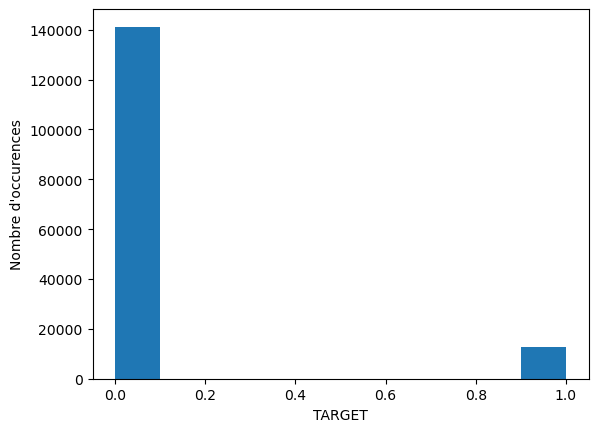

In [8]:
df['TARGET'].astype(int).plot.hist()
plt.xlabel('TARGET')
plt.ylabel("Nombre d'occurences")
plt.show()

Il y a bien plus de prêts qui ont été remboursés à temps (0) que de prêts qui ne l'ont pas été (1). Ces classes sont donc représentées de manière inégale dans le jeu de données. Cependant, cela peut entraîner plusieurs problèmes dans le cadre d'un projet de machine learning :

- Biais du modèle : Un modèle entraîné sur des données déséquilibrées risque de devenir biaisé en faveur de la classe majoritaire.

- Métriques trompeuses : Les mesures de performance comme l'accuracy peuvent être trompeuses. Par exemple, si 95 % des données appartiennent à une seule classe, un modèle qui prédit toujours cette classe aura une précision de 95 %, mais il ne sera pas vraiment efficace pour identifier les exemples de la classe minoritaire.

- Performance réduite : Le modèle peut avoir des difficultés à apprendre les caractéristiques de la classe minoritaire, ce qui conduit à de mauvaises performances pour cette dernière. Dans notre cas, cette classe est très importante car elle nous renseigne sur les prêts non remboursés.

Par la suite, nous allons donc devoir équilibrer ces classes pour l'ensemble de données d'entraînement afin d'éviter ces problèmes.

### Gestion des valeurs manquantes

In [9]:
def missing_values_table(df):
    """
    Calcule les valeurs manquantes pour chaque colonne d'un DataFrame et retourne un tableau résumant les résultats.

    Paramètres :
    df (pandas.DataFrame) : Le DataFrame pour lequel les valeurs manquantes doivent être calculées.

    Retour :
    pandas.DataFrame : Un tableau résumant le nombre et le pourcentage de valeurs manquantes pour chaque colonne du DataFrame.
    """
    # Nombre total de valeurs manquantes par colonne
    mis_val = df.isnull().sum()
    
    # Pourcentage de valeurs manquantes par colonne
    mis_val_percent = 100 * mis_val / len(df)
    
    # Création d'un tableau avec les résultats
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Renommer les colonnes du tableau
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Nombre de valeurs manquantes', 1: 'Pourcentage de valeurs manquantes'})
    
    # Trier le tableau par pourcentage de valeurs manquantes de manière décroissante
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            'Pourcentage de valeurs manquantes', ascending=False).round(1)
    
    # Afficher des informations résumées
    print ("Le DataFrame sélectionné comporte " + str(df.shape[1]) + " colonnes,\n"      
            "parmis lesquelles " + str(mis_val_table_ren_columns.shape[0]) +
            " contiennent des valeurs manquantes.")
    
    # Retourner le DataFrame contenant les informations sur les valeurs manquantes
    return mis_val_table_ren_columns

In [10]:
# Affichage des 50 variables contenant le plus de valeurs manquantes
missing_values = missing_values_table(df)
missing_values.head(50)

Le DataFrame sélectionné comporte 122 colonnes,
parmis lesquelles 67 contiennent des valeurs manquantes.


Nombre de valeurs manquantes  \
COMMONAREA_MEDI                                     107529   
COMMONAREA_AVG                                      107529   
COMMONAREA_MODE                                     107529   
NONLIVINGAPARTMENTS_MEDI                            106815   
NONLIVINGAPARTMENTS_MODE                            106815   
NONLIVINGAPARTMENTS_AVG                             106815   
LIVINGAPARTMENTS_MODE                               105212   
LIVINGAPARTMENTS_MEDI                               105212   
LIVINGAPARTMENTS_AVG                                105212   
FONDKAPREMONT_MODE                                  105201   
FLOORSMIN_MODE                                      104392   
FLOORSMIN_MEDI                                      104392   
FLOORSMIN_AVG                                       104392   
YEARS_BUILD_MODE                                    102311   
YEARS_BUILD_MEDI                                    102311   
YEARS_BUILD_AVG                                     102311   
OWN_CAR_AGE                                         101531   
LANDAREA_AVG                                         91439   
LANDAREA_MEDI                                        91439   
LANDAREA_MODE                                        91439   
BASEMENTAREA_MEDI                                    90182   
BASEMENTAREA_AVG                                     90182   
BASEMENTAREA_MODE                                    90182   
EXT_SOURCE_1                                         86602   
NONLIVINGAREA_MEDI                                   85043   
NONLIVINGAREA_MODE                                   85043   
NONLIVINGAREA_AVG                                    85043   
ELEVATORS_MEDI                                       82178   
ELEVATORS_MODE                                       82178   
ELEVATORS_AVG                                        82178   
WALLSMATERIAL_MODE                                   78374   
APARTMENTS_MODE                                      78275   
APARTMENTS_MEDI                                      78275   
APARTMENTS_AVG                                       78275   
ENTRANCES_MODE                                       77620   
ENTRANCES_AVG                                        77620   
ENTRANCES_MEDI                                       77620   
LIVINGAREA_MEDI                                      77413   
LIVINGAREA_MODE                                      77413   
LIVINGAREA_AVG                                       77413   
HOUSETYPE_MODE                                       77382   
FLOORSMAX_MEDI                                       76705   
FLOORSMAX_AVG                                        76705   
FLOORSMAX_MODE                                       76705   
YEARS_BEGINEXPLUATATION_AVG                          75205   
YEARS_BEGINEXPLUATATION_MEDI                         75205   
YEARS_BEGINEXPLUATATION_MODE                         75205   
TOTALAREA_MODE                                       74446   
EMERGENCYSTATE_MODE                                  73099   
OCCUPATION_TYPE                                      48212   

                              Pourcentage de valeurs manquantes  
COMMONAREA_MEDI                                            69.9  
COMMONAREA_AVG                                             69.9  
COMMONAREA_MODE                                            69.9  
NONLIVINGAPARTMENTS_MEDI                                   69.5  
NONLIVINGAPARTMENTS_MODE                                   69.5  
NONLIVINGAPARTMENTS_AVG                                    69.5  
LIVINGAPARTMENTS_MODE                                      68.4  
LIVINGAPARTMENTS_MEDI                                      68.4  
LIVINGAPARTMENTS_AVG                                       68.4  
FONDKAPREMONT_MODE                                         68.4  
FLOORSMIN_MODE                                             67.9  
FLOORSMIN_MEDI                                             67.9  
FLOORSMIN

#### Suppression des variables contenant trop de valeurs manquantes

Nous allons supprimer les variables ayant plus de 45% de valeurs manquantes car ces colonnes contiennent trop peu d'informations utiles :

In [11]:
def remove_columns_with_missing_values(df, threshold=0.50):
    """
    Supprime les colonnes d'un DataFrame ayant plus d'un certain pourcentage de valeurs manquantes.

    Paramètres :
    df (pandas.DataFrame) : Le DataFrame à traiter.
    seuil (float): Le pourcentage seuil au-dessus duquel les colonnes sont supprimées (par défaut 0.50).

    Retour :
    pandas.DataFrame : Un DataFrame sans les colonnes ayant plus de 'seuil' de valeurs manquantes.
    """
    # Calculer le pourcentage de valeurs manquantes par colonne
    missing_percentage = df.isnull().mean()
    
    # Identifier les colonnes dont le nombre de valeurs manquantes est supérieur au seuil spécifié
    columns_to_drop = missing_percentage[missing_percentage > threshold].index
    
    # Supprimer ces colonnes
    cleaned_df = df.drop(columns=columns_to_drop)
    
    print(f"Nombre de colonnes supprimées : {len(columns_to_drop)}")
    
    return cleaned_df

In [12]:
# Création du nouveau dataframe sans les variables ayant plus de 45% de valeurs manquantes
df = remove_columns_with_missing_values(df, threshold=0.45)

Nombre de colonnes supprimées : 49


In [13]:
# Vérification en observant les 5 variables contenant le plus de valeurs manquantes
missing_values = missing_values_table(df)
missing_values.head()

Le DataFrame sélectionné comporte 73 colonnes,
parmis lesquelles 18 contiennent des valeurs manquantes.


Nombre de valeurs manquantes  \
OCCUPATION_TYPE                                    48212   
EXT_SOURCE_3                                       30420   
AMT_REQ_CREDIT_BUREAU_YEAR                         20624   
AMT_REQ_CREDIT_BUREAU_QRT                          20624   
AMT_REQ_CREDIT_BUREAU_MON                          20624   

                            Pourcentage de valeurs manquantes  
OCCUPATION_TYPE                                          31.4  
EXT_SOURCE_3                                             19.8  
AMT_REQ_CREDIT_BUREAU_YEAR                               13.4  
AMT_REQ_CREDIT_BUREAU_QRT                                13.4  
AMT_REQ_CREDIT_BUREAU_MON                                13.4

Les variables contenant plus de 45% de valeurs manquantes ont bien été supprimées.

#### Imputation des valeurs manquantes

Nous allons imputer les valeurs manquantes en utilisant deux approches :

1. Imputation des variables numériques : Nous allons remplacer les valeurs manquantes par la médiane des variables numériques parmi les clients ayant des situations professionnelles similaires.
2. Imputation des variables catégorielles : Nous allons imputer les valeurs manquantes par la catégorie "Unknown".

Pour regrouper les clients selon leur situation professionnelle, nous utiliserons les variables suivantes :

- `NAME_INCOME_TYPE` : Représente le type de revenu du client, avec des catégories telles que "Working", "Pensioner", "Commercial Associate", etc.
- `ORGANIZATION_TYPE` : Représente le secteur d'activité pour lequel le client travail, avec des catégories telles que "Medicine", "Government", "School", etc.

Ces deux variables ne contiennent aucune valeurs manquantes :

In [14]:
# Vérifier si 'NAME_INCOME_TYPE' et 'ORGANIZATION_TYPE' contiennent des valeurs manquantes
missing_name_income_type = df['NAME_INCOME_TYPE'].isnull().sum()
missing_organization_type = df['ORGANIZATION_TYPE'].isnull().sum()

print(f"Nombre de valeurs manquantes dans 'NAME_INCOME_TYPE' : {missing_name_income_type}")
print(f"Nombre de valeurs manquantes dans 'ORGANIZATION_TYPE' : {missing_organization_type}")

Nombre de valeurs manquantes dans 'NAME_INCOME_TYPE' : 0
Nombre de valeurs manquantes dans 'ORGANIZATION_TYPE' : 0


Imputation des valeurs manquantes :

In [15]:
# Listes des variables numériques et catégorielles
numerical_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Créer une copie du DataFrame df
df_imputed = df.copy()

# Imputation des variables numériques
for (income_type, organization_type), group in df.groupby(['NAME_INCOME_TYPE', 'ORGANIZATION_TYPE']):
    for col in numerical_features:
        if group[col].isnull().sum() > 0: # Vérifie s'il y a des valeurs manquantes
            median_value = group[col].median()  # Calcule la médiane pour le groupe
            df_imputed.loc[group.index, col] = df.loc[group.index, col].fillna(median_value) # Imputation par médiane
    
# Imputation des variables catégorielles
imputer_cat = SimpleImputer(strategy="constant", fill_value="Unknown")
df_imputed[categorical_features] = imputer_cat.fit_transform(df[categorical_features])

In [16]:
# Vérification
missing_values_table(df_imputed)

Le DataFrame sélectionné comporte 73 colonnes,
parmis lesquelles 7 contiennent des valeurs manquantes.


Nombre de valeurs manquantes  \
EXT_SOURCE_3                                           6   
AMT_REQ_CREDIT_BUREAU_HOUR                             6   
AMT_REQ_CREDIT_BUREAU_DAY                              6   
AMT_REQ_CREDIT_BUREAU_WEEK                             6   
AMT_REQ_CREDIT_BUREAU_MON                              6   
AMT_REQ_CREDIT_BUREAU_QRT                              6   
AMT_REQ_CREDIT_BUREAU_YEAR                             6   

                            Pourcentage de valeurs manquantes  
EXT_SOURCE_3                                              0.0  
AMT_REQ_CREDIT_BUREAU_HOUR                                0.0  
AMT_REQ_CREDIT_BUREAU_DAY                                 0.0  
AMT_REQ_CREDIT_BUREAU_WEEK                                0.0  
AMT_REQ_CREDIT_BUREAU_MON                                 0.0  
AMT_REQ_CREDIT_BUREAU_QRT                                 0.0  
AMT_REQ_CREDIT_BUREAU_YEAR                                0.0

Notre stratégie d'imputation échoue pour 6 observations, car elles présentent des combinaisons uniques de `NAME_INCOME_TYPE` et `ORGANIZATION_TYPE`. En d'autres termes, ces combinaisons n'apparaissent pas dans d'autres observations du jeu de données. Il est donc impossible de calculer une médiane pour imputer les valeurs manquantes, ce qui laisse ces observations sans valeur imputée.

Pour résoudre ce problème, nous allons imputer les valeurs manquantes restantes en utilisant la médiane globale calculée sur l'ensemble du jeu de données :

In [17]:
# Imputation des valeurs manquantes restantes
imputer_num = SimpleImputer(strategy='median')
df_imputed[numerical_features] = imputer_num.fit_transform(df_imputed[numerical_features])

In [18]:
# Vérification
missing_values_table(df_imputed)

Le DataFrame sélectionné comporte 73 colonnes,
parmis lesquelles 0 contiennent des valeurs manquantes.


Empty DataFrame
Columns: [Nombre de valeurs manquantes, Pourcentage de valeurs manquantes]
Index: []

### Traitement des doublons

In [19]:
has_duplicates = df['SK_ID_CURR'].duplicated().any()
if has_duplicates:
    print("La colonne SK_ID_CURR contient des doublons.")
else:
    print("La colonne SK_ID_CURR ne contient pas de doublons.")

La colonne SK_ID_CURR ne contient pas de doublons.


### Exploration des données
#### Analyse univariée
##### Représentation graphique


Analyse univariée de SK_ID_CURR : 


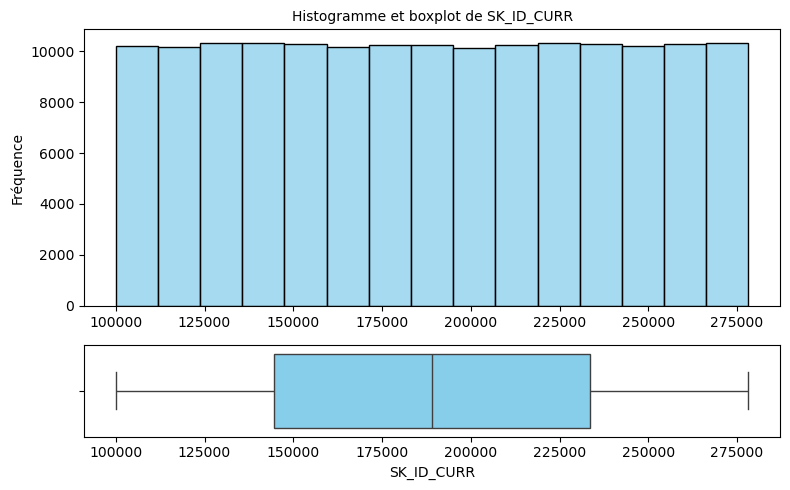

________________________________________

Analyse univariée de TARGET : 


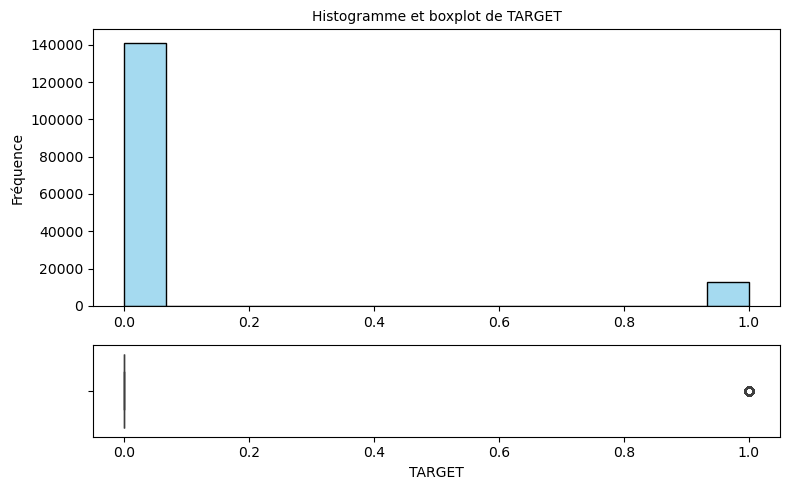

________________________________________

Analyse univariée de CNT_CHILDREN : 


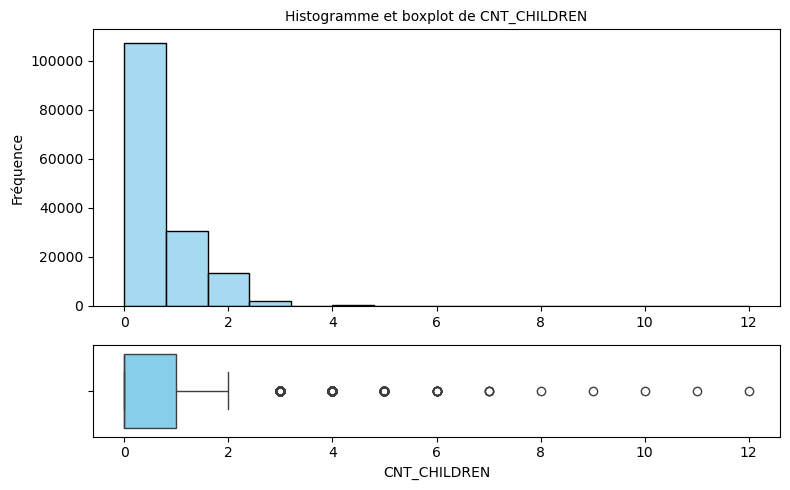

________________________________________

Analyse univariée de AMT_INCOME_TOTAL : 


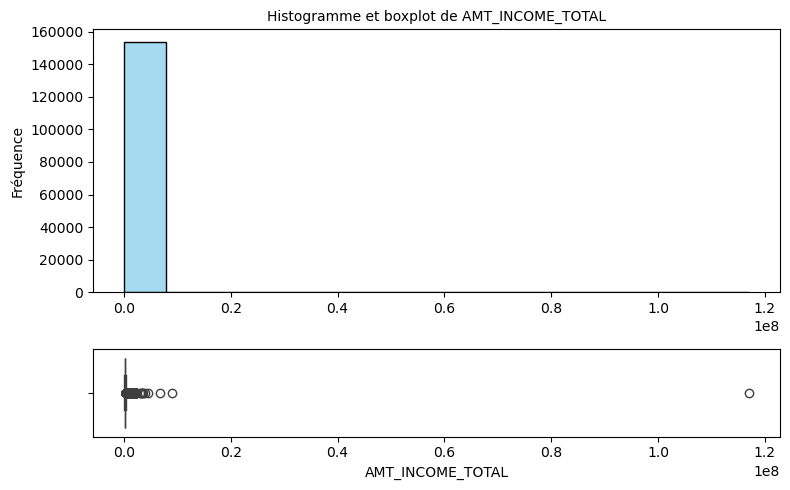

________________________________________

Analyse univariée de AMT_CREDIT : 


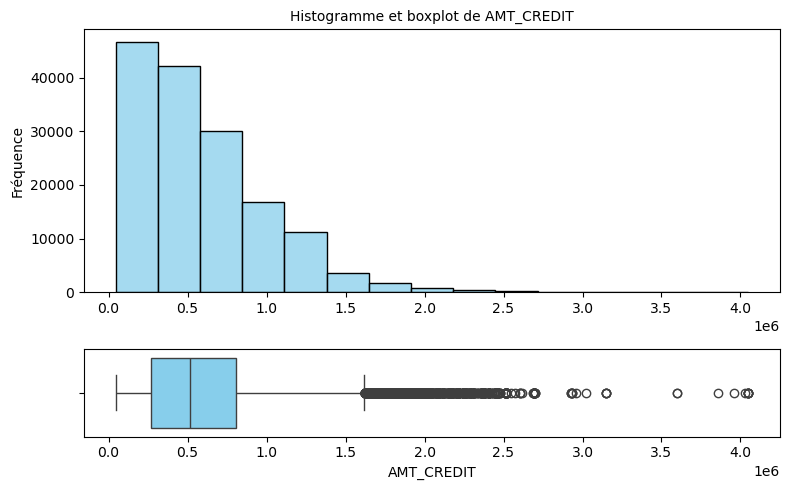

________________________________________

Analyse univariée de AMT_ANNUITY : 


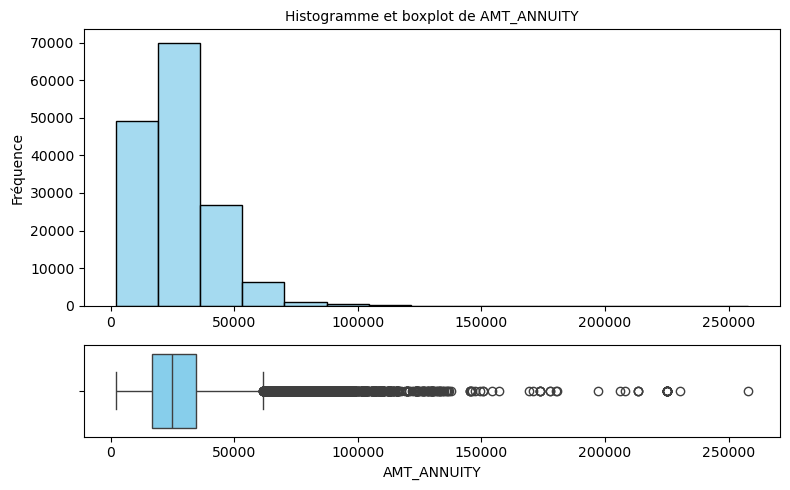

________________________________________

Analyse univariée de AMT_GOODS_PRICE : 


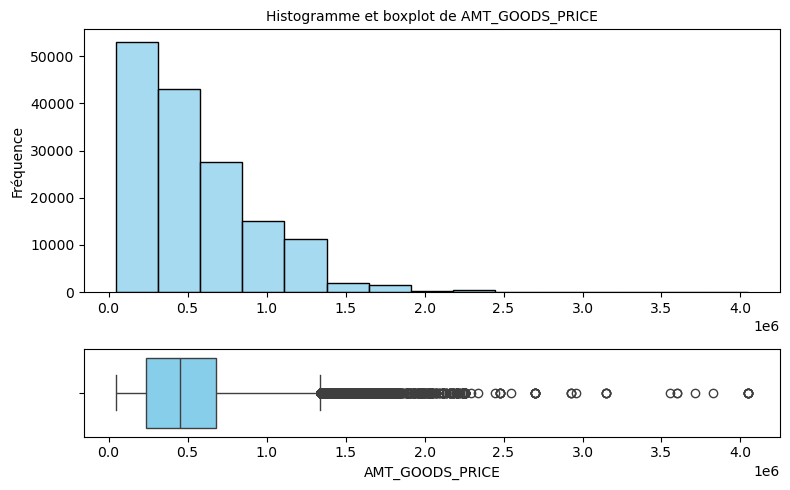

________________________________________

Analyse univariée de REGION_POPULATION_RELATIVE : 


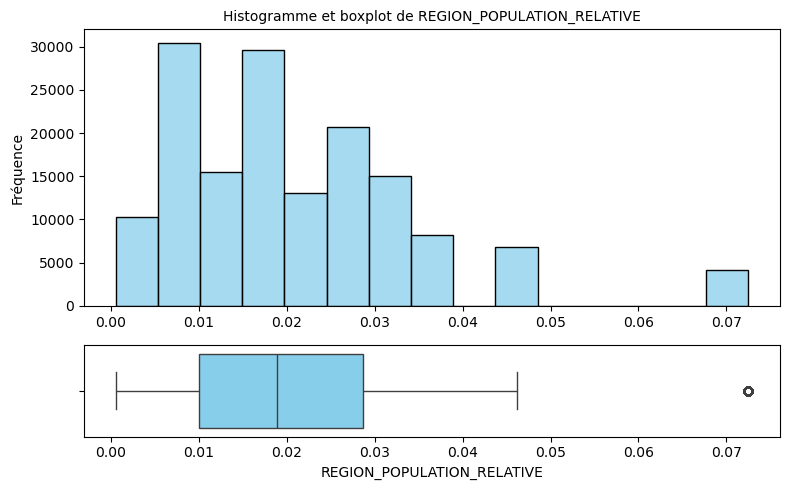

________________________________________

Analyse univariée de DAYS_BIRTH : 


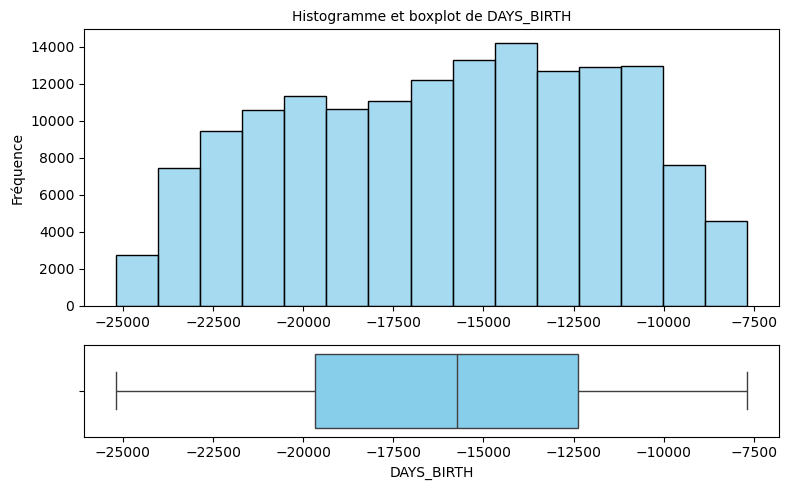

________________________________________

Analyse univariée de DAYS_EMPLOYED : 


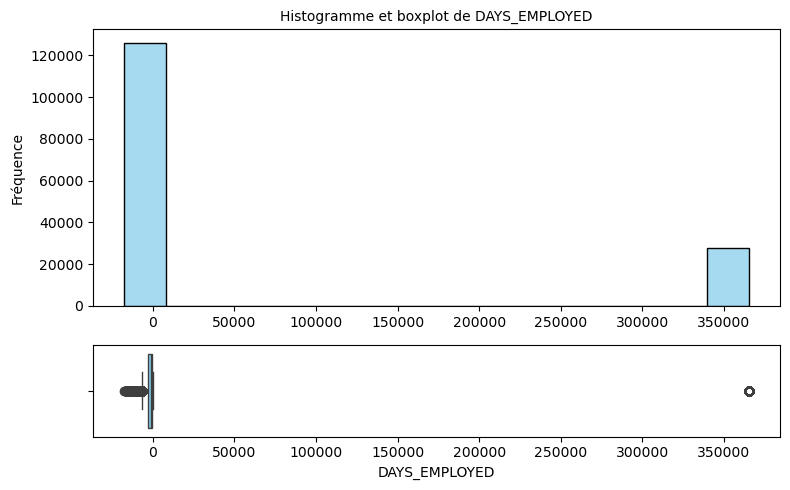

________________________________________

Analyse univariée de DAYS_REGISTRATION : 


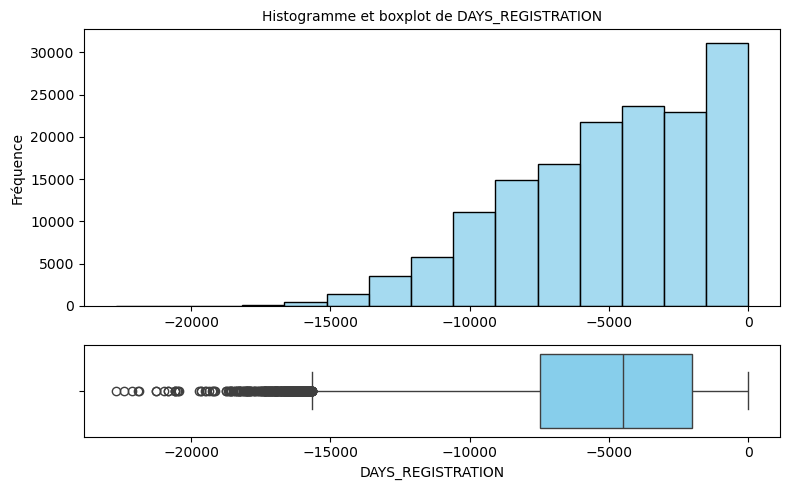

________________________________________

Analyse univariée de DAYS_ID_PUBLISH : 


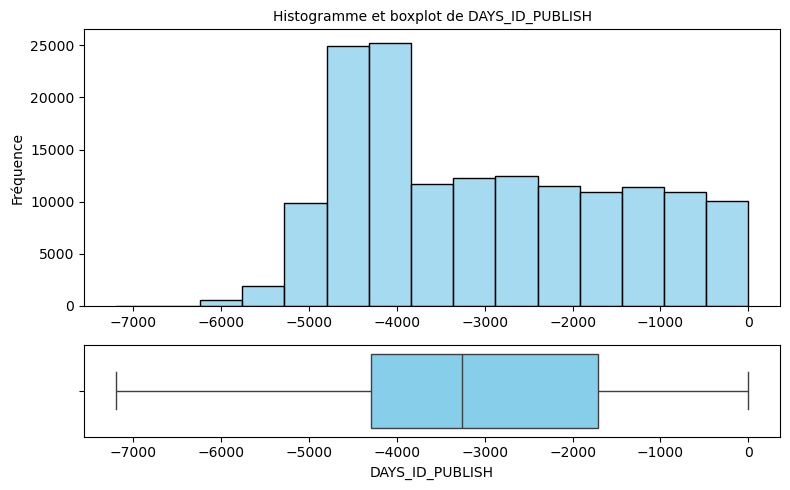

________________________________________

Analyse univariée de FLAG_MOBIL : 


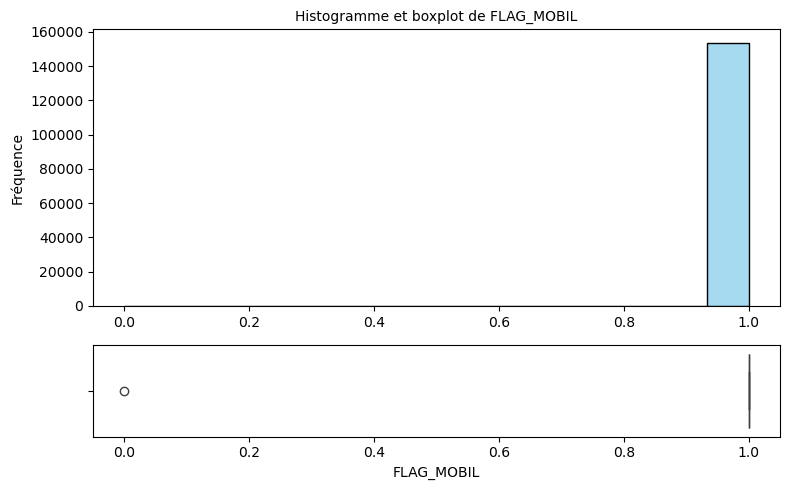

________________________________________

Analyse univariée de FLAG_EMP_PHONE : 


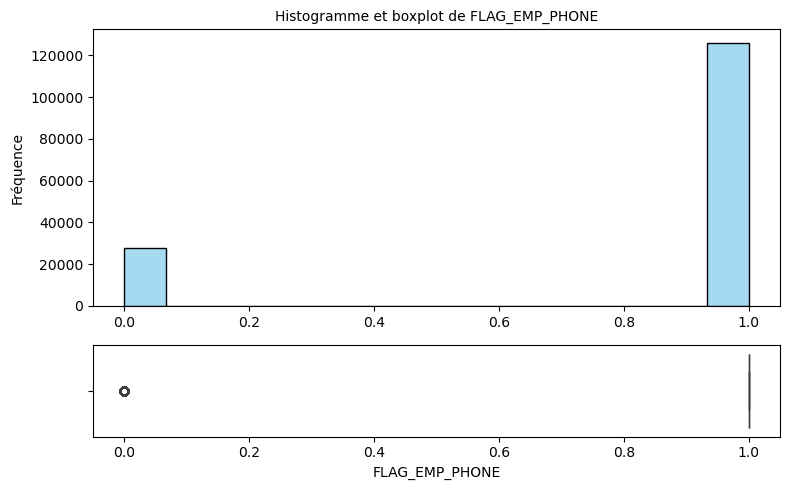

________________________________________

Analyse univariée de FLAG_WORK_PHONE : 


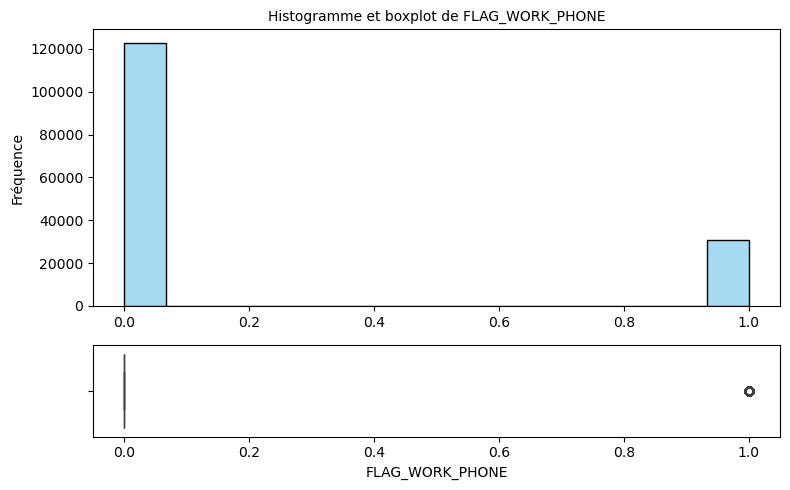

________________________________________

Analyse univariée de FLAG_CONT_MOBILE : 


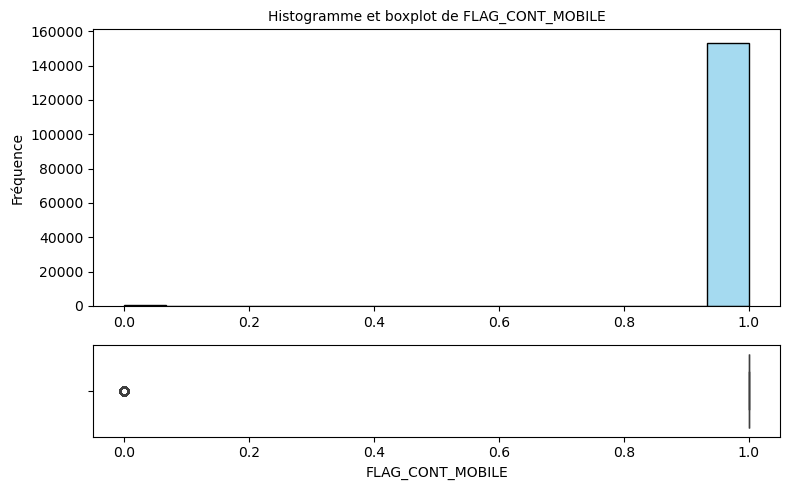

________________________________________

Analyse univariée de FLAG_PHONE : 


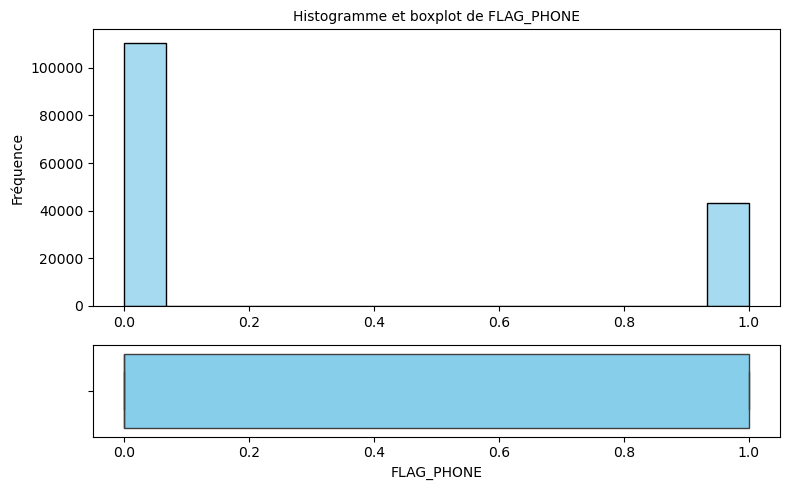

________________________________________

Analyse univariée de FLAG_EMAIL : 


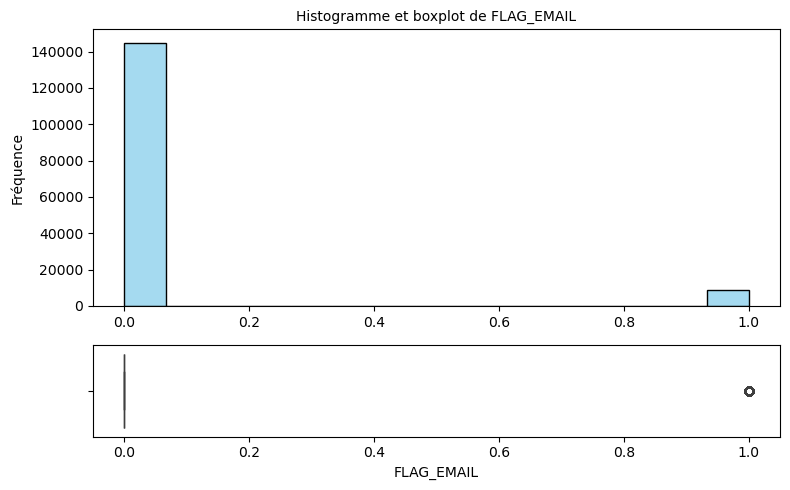

________________________________________

Analyse univariée de CNT_FAM_MEMBERS : 


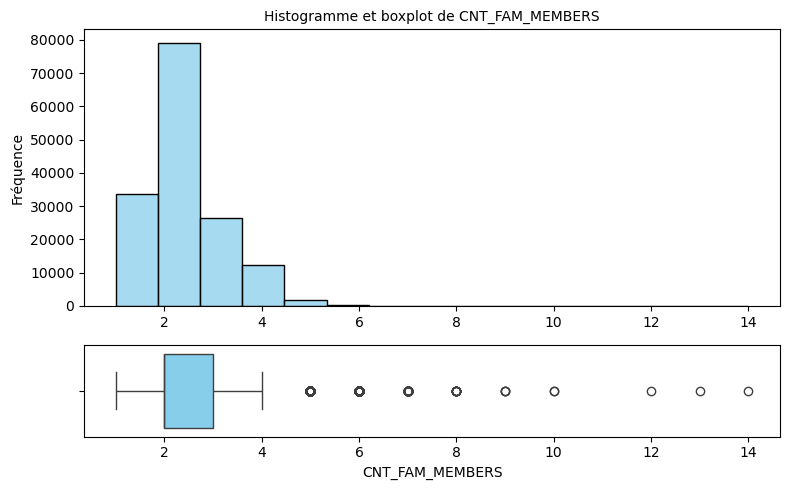

________________________________________

Analyse univariée de REGION_RATING_CLIENT : 


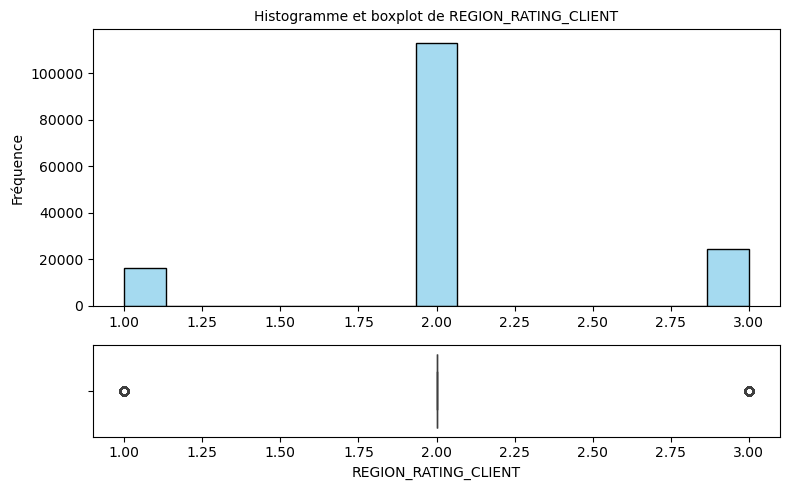

________________________________________

Analyse univariée de REGION_RATING_CLIENT_W_CITY : 


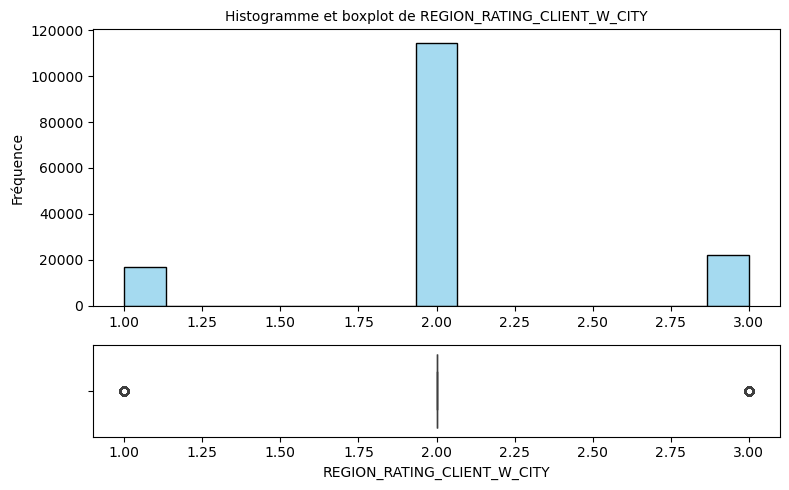

________________________________________

Analyse univariée de HOUR_APPR_PROCESS_START : 


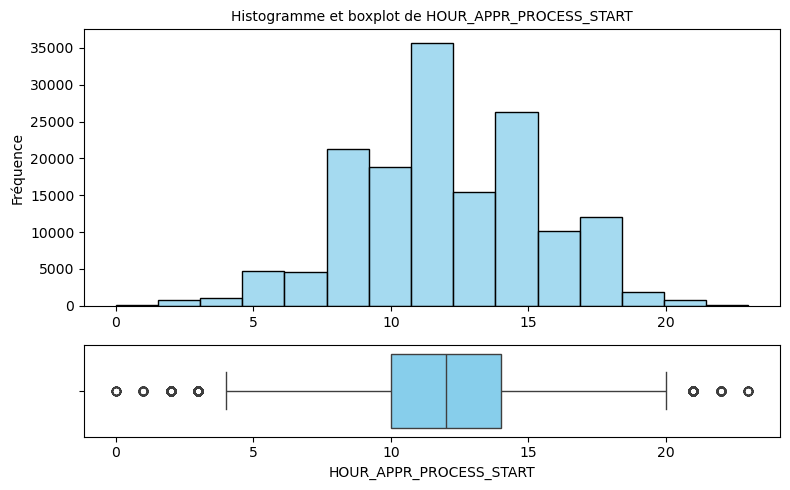

________________________________________

Analyse univariée de REG_REGION_NOT_LIVE_REGION : 


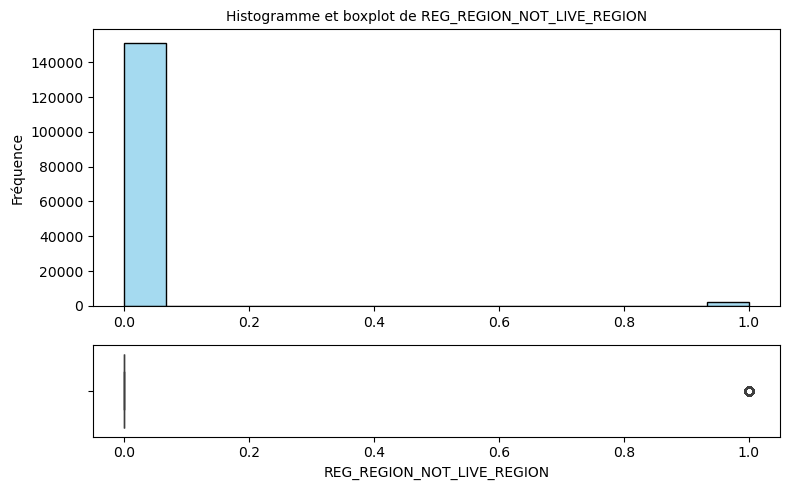

________________________________________

Analyse univariée de REG_REGION_NOT_WORK_REGION : 


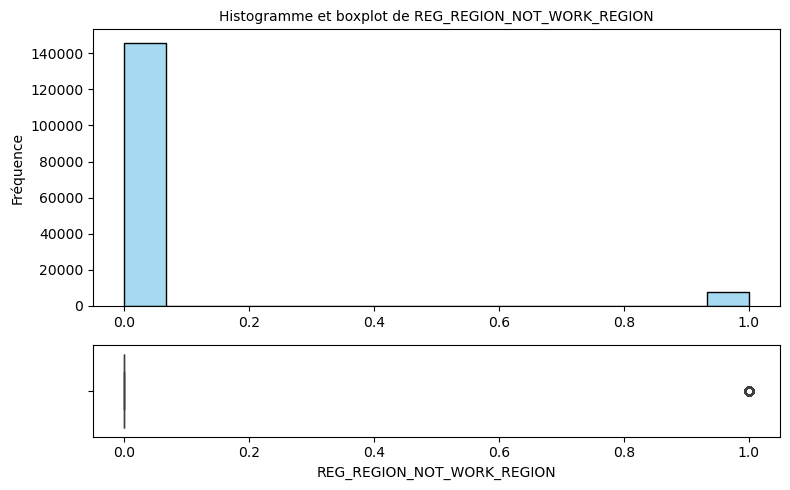

________________________________________

Analyse univariée de LIVE_REGION_NOT_WORK_REGION : 


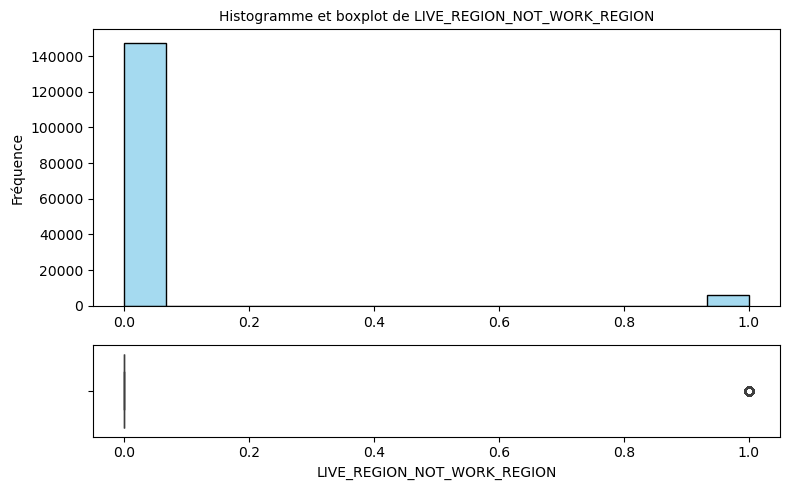

________________________________________

Analyse univariée de REG_CITY_NOT_LIVE_CITY : 


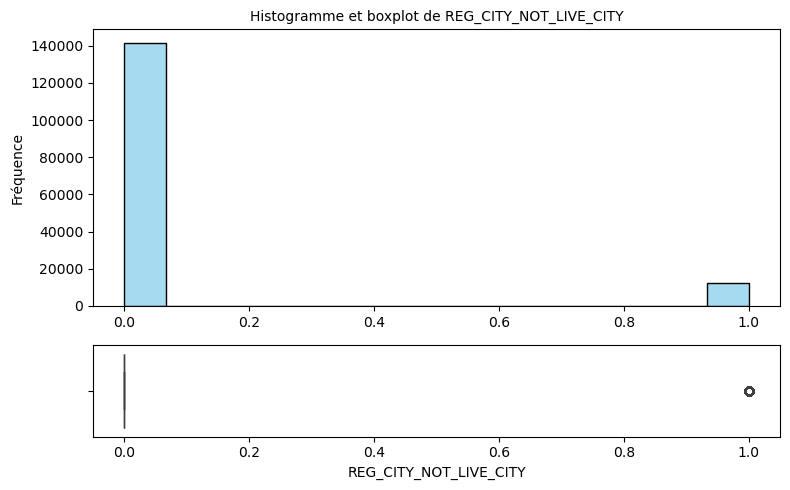

________________________________________

Analyse univariée de REG_CITY_NOT_WORK_CITY : 


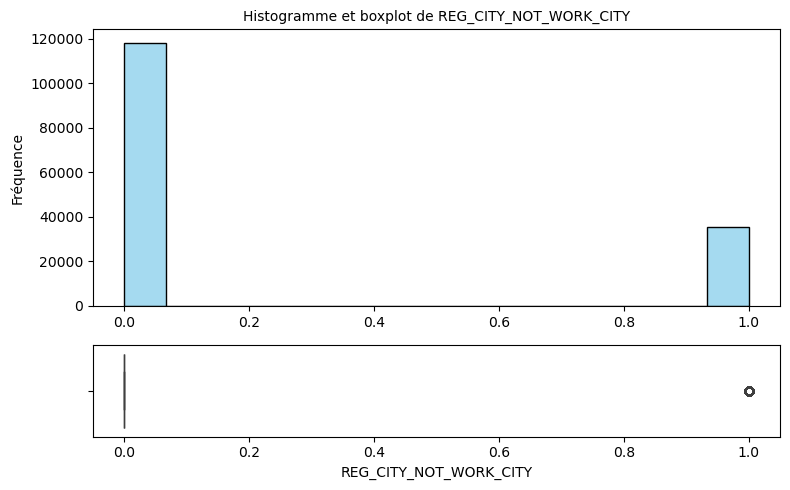

________________________________________

Analyse univariée de LIVE_CITY_NOT_WORK_CITY : 


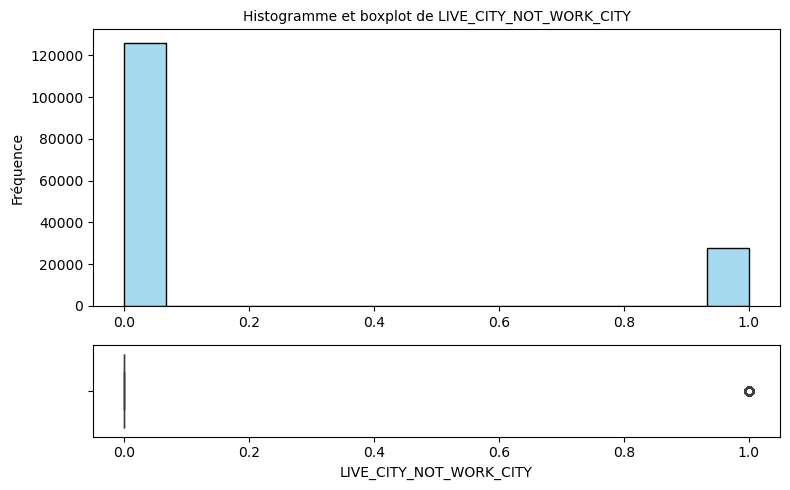

________________________________________

Analyse univariée de EXT_SOURCE_2 : 


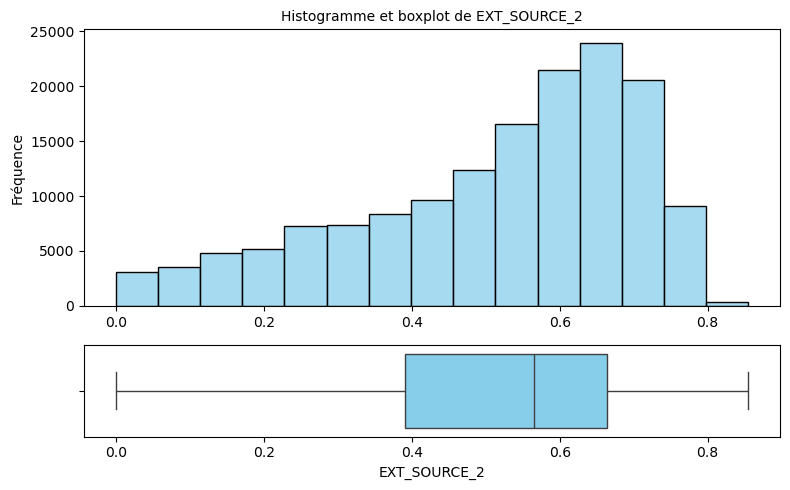

________________________________________

Analyse univariée de EXT_SOURCE_3 : 


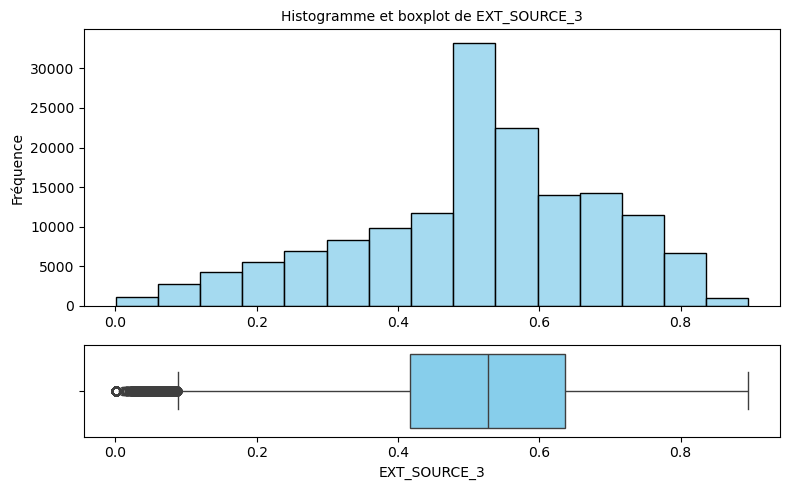

________________________________________

Analyse univariée de OBS_30_CNT_SOCIAL_CIRCLE : 


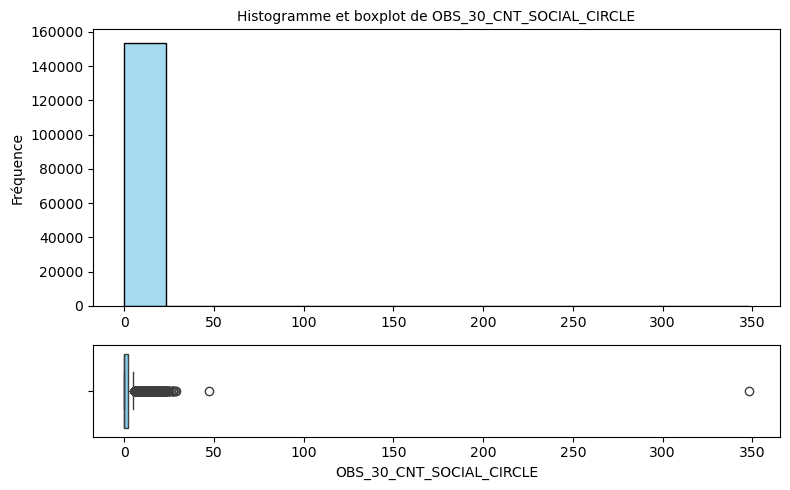

________________________________________

Analyse univariée de DEF_30_CNT_SOCIAL_CIRCLE : 


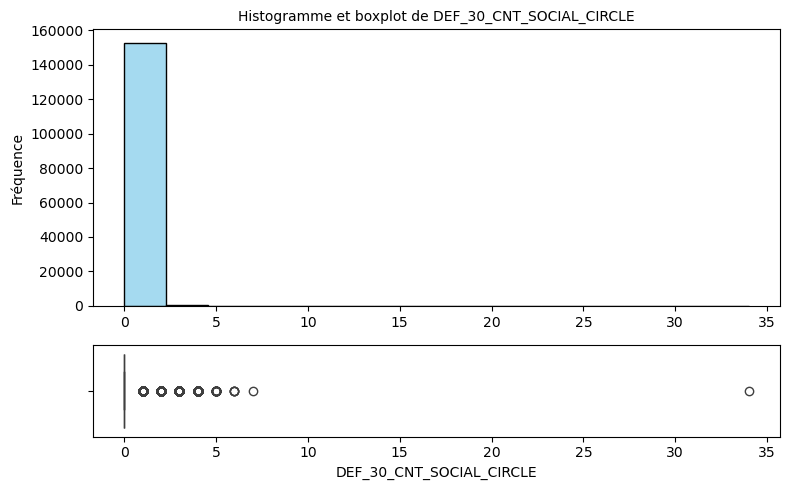

________________________________________

Analyse univariée de OBS_60_CNT_SOCIAL_CIRCLE : 


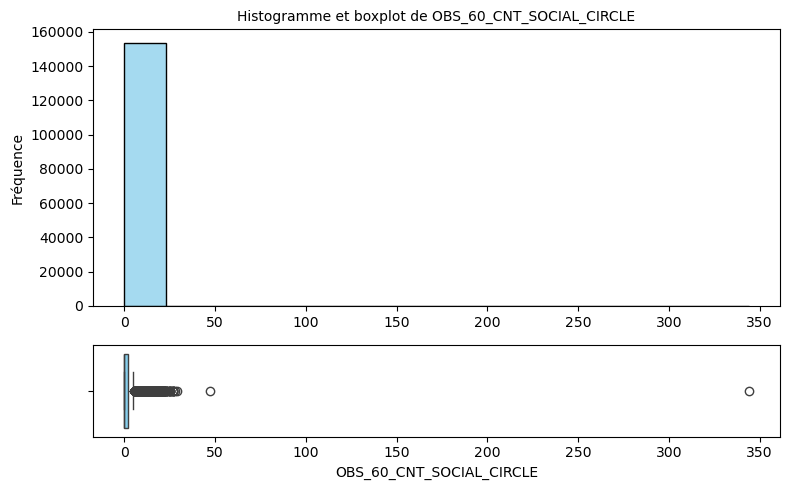

________________________________________

Analyse univariée de DEF_60_CNT_SOCIAL_CIRCLE : 


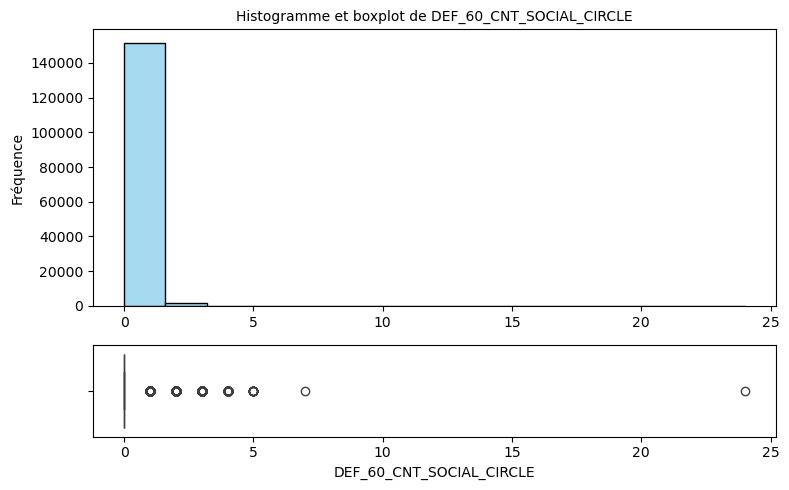

________________________________________

Analyse univariée de DAYS_LAST_PHONE_CHANGE : 


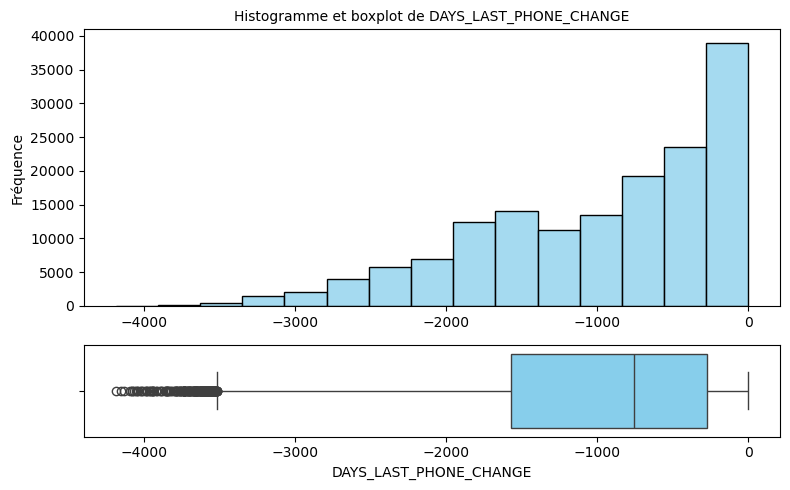

________________________________________

Analyse univariée de FLAG_DOCUMENT_2 : 


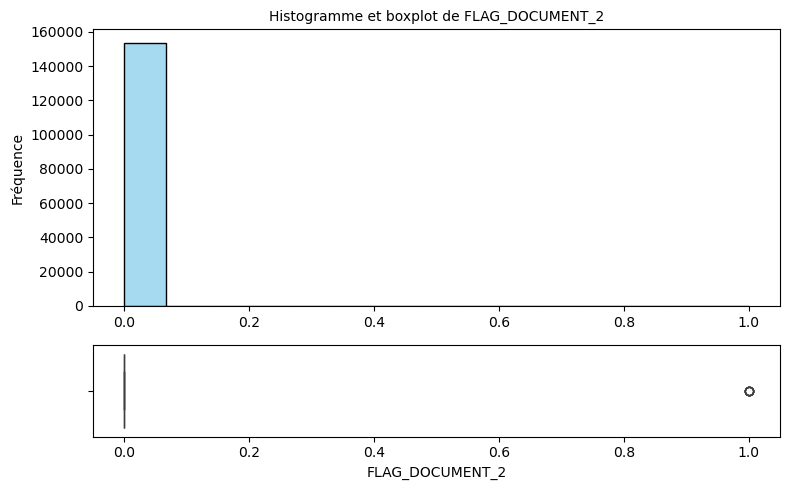

________________________________________

Analyse univariée de FLAG_DOCUMENT_3 : 


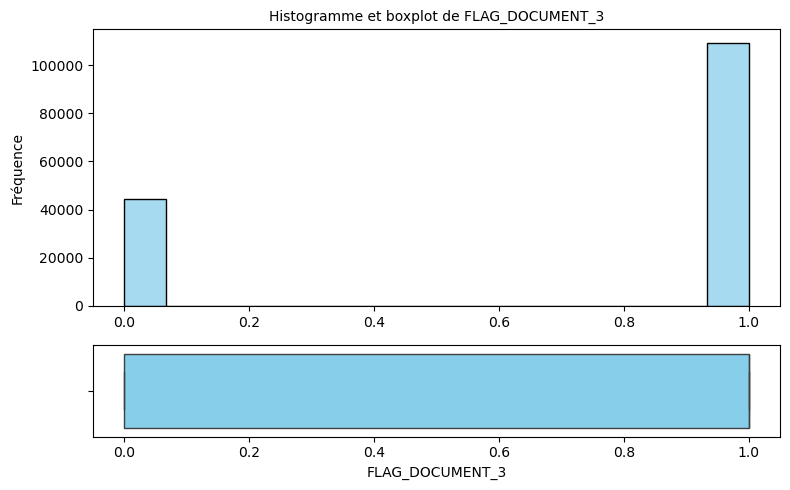

________________________________________

Analyse univariée de FLAG_DOCUMENT_4 : 


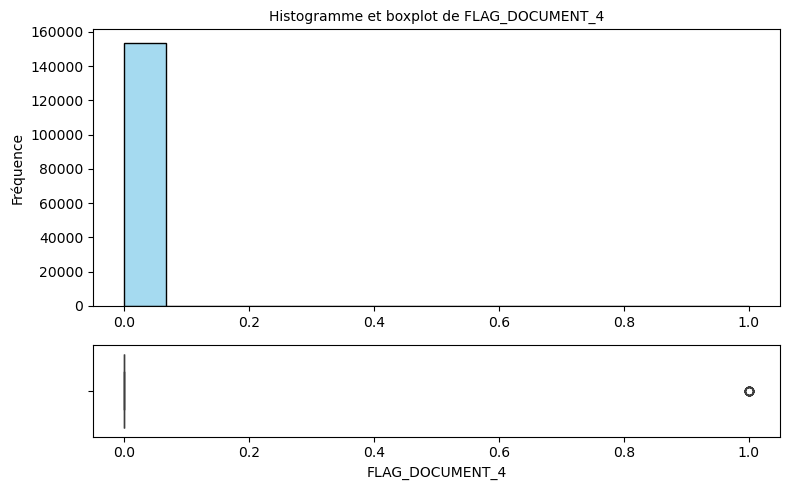

________________________________________

Analyse univariée de FLAG_DOCUMENT_5 : 


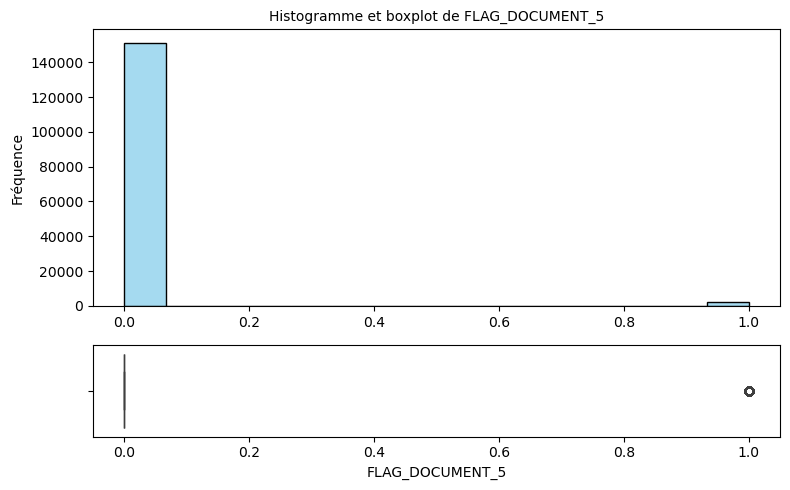

________________________________________

Analyse univariée de FLAG_DOCUMENT_6 : 


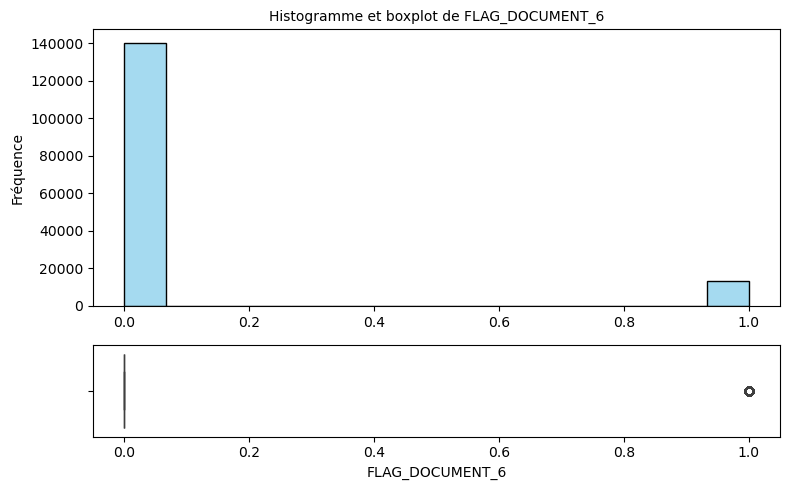

________________________________________

Analyse univariée de FLAG_DOCUMENT_7 : 


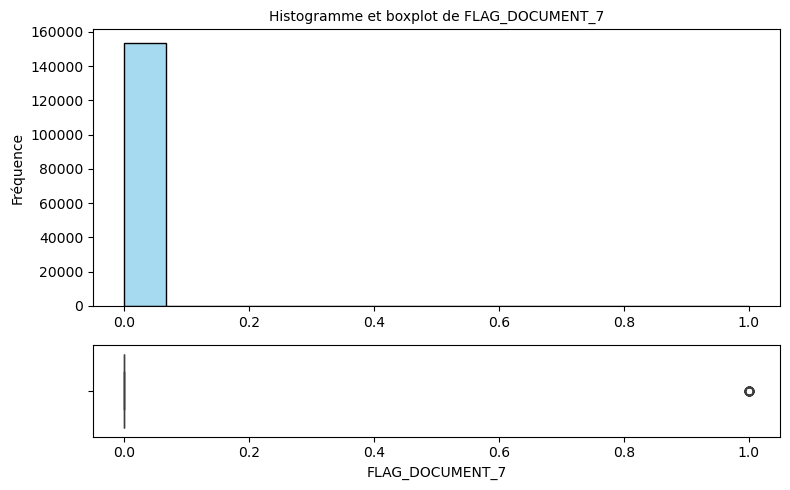

________________________________________

Analyse univariée de FLAG_DOCUMENT_8 : 


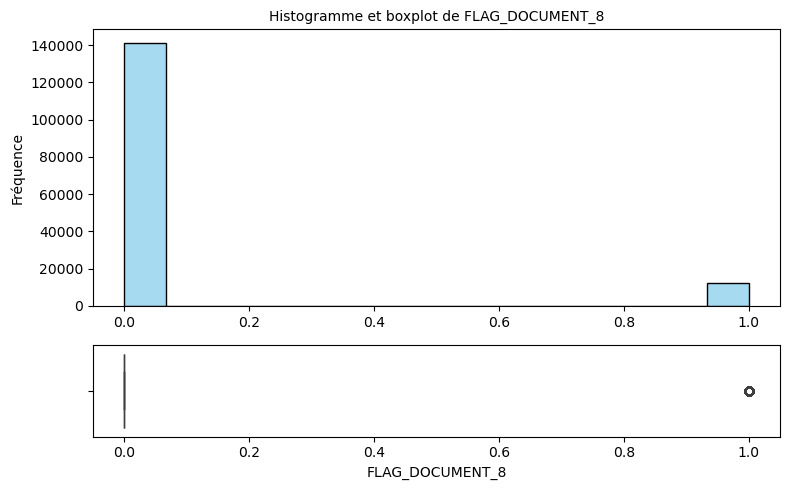

________________________________________

Analyse univariée de FLAG_DOCUMENT_9 : 


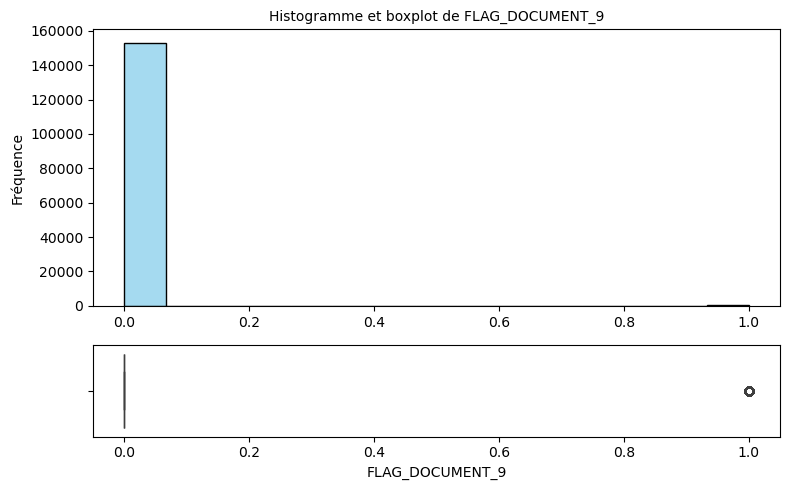

________________________________________

Analyse univariée de FLAG_DOCUMENT_10 : 


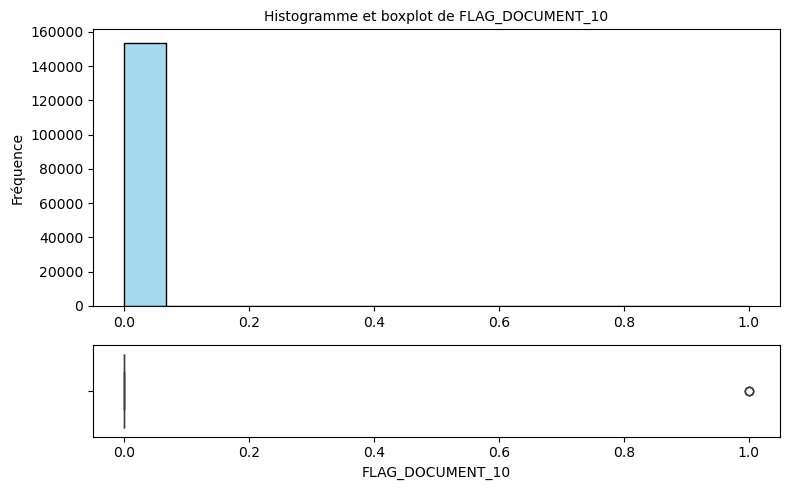

________________________________________

Analyse univariée de FLAG_DOCUMENT_11 : 


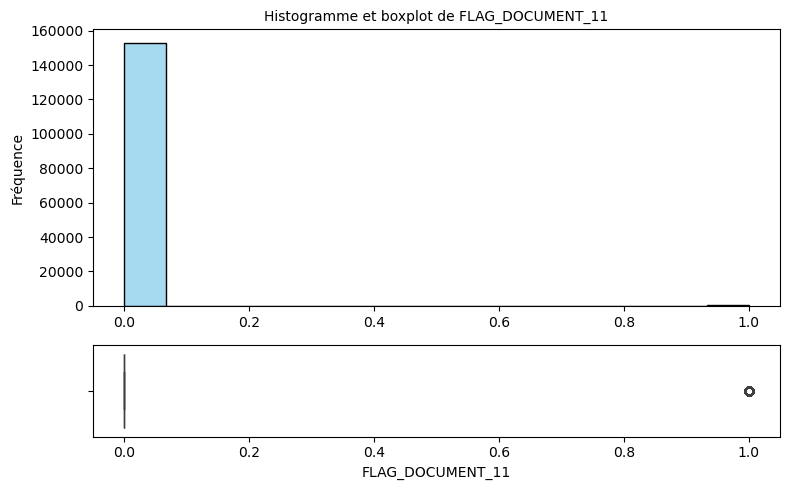

________________________________________

Analyse univariée de FLAG_DOCUMENT_12 : 


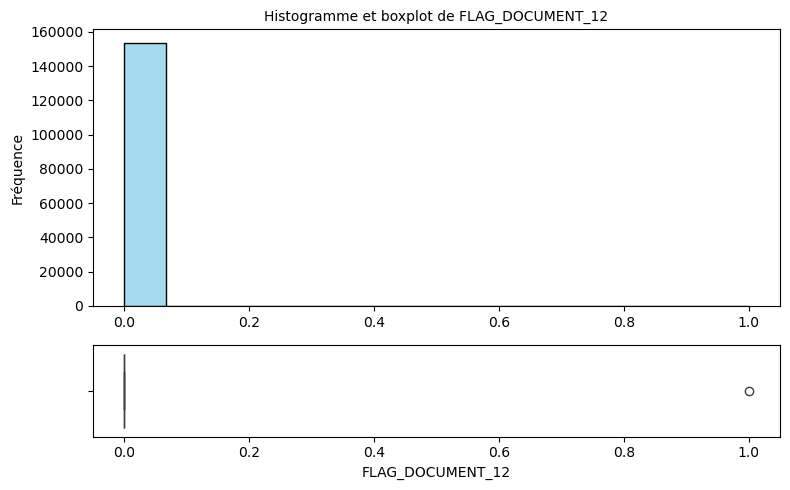

________________________________________

Analyse univariée de FLAG_DOCUMENT_13 : 


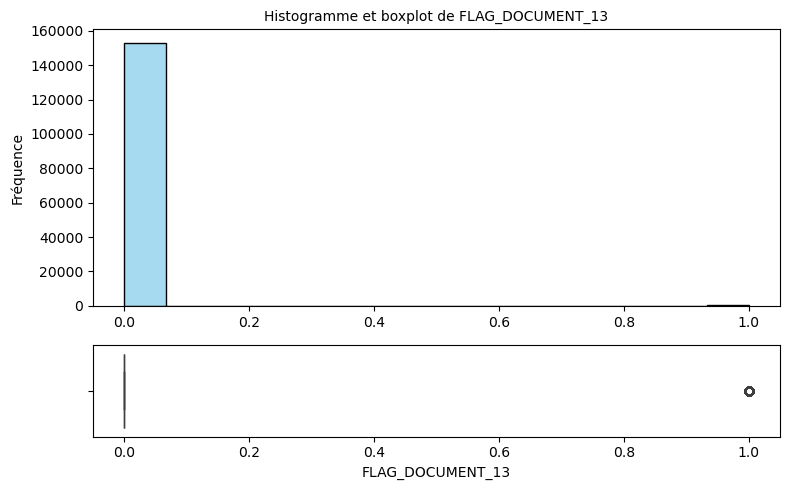

________________________________________

Analyse univariée de FLAG_DOCUMENT_14 : 


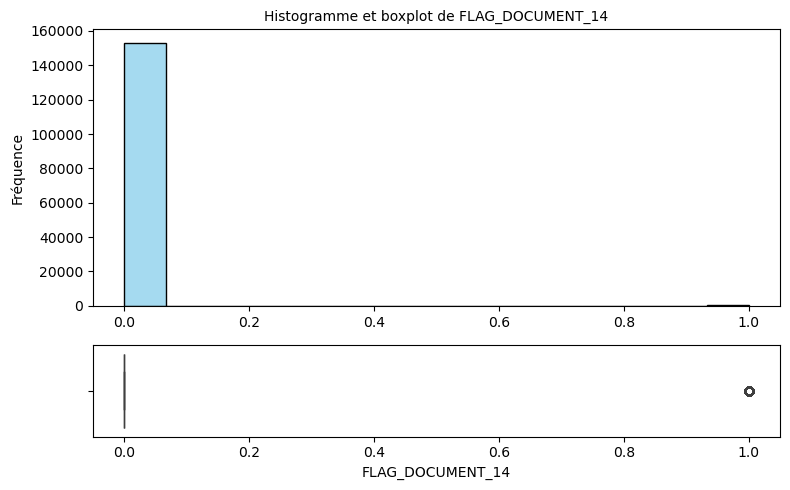

________________________________________

Analyse univariée de FLAG_DOCUMENT_15 : 


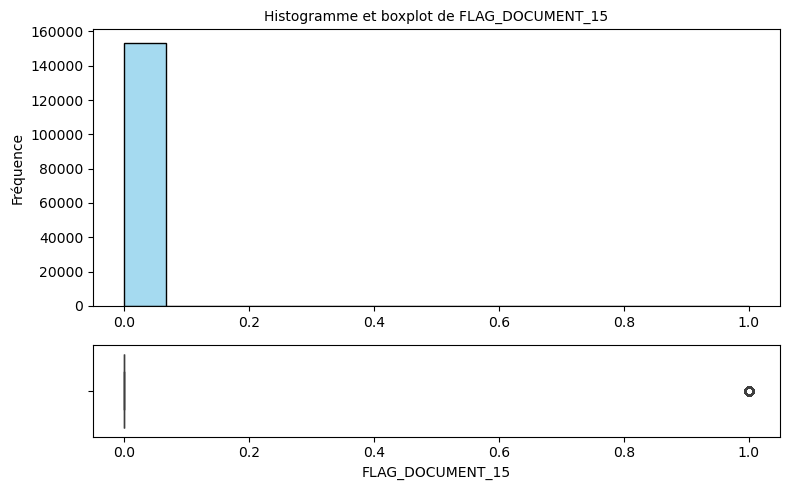

________________________________________

Analyse univariée de FLAG_DOCUMENT_16 : 


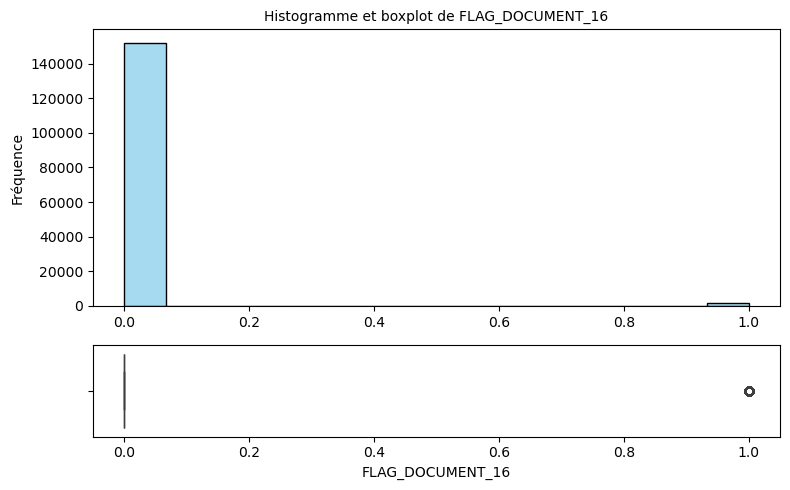

________________________________________

Analyse univariée de FLAG_DOCUMENT_17 : 


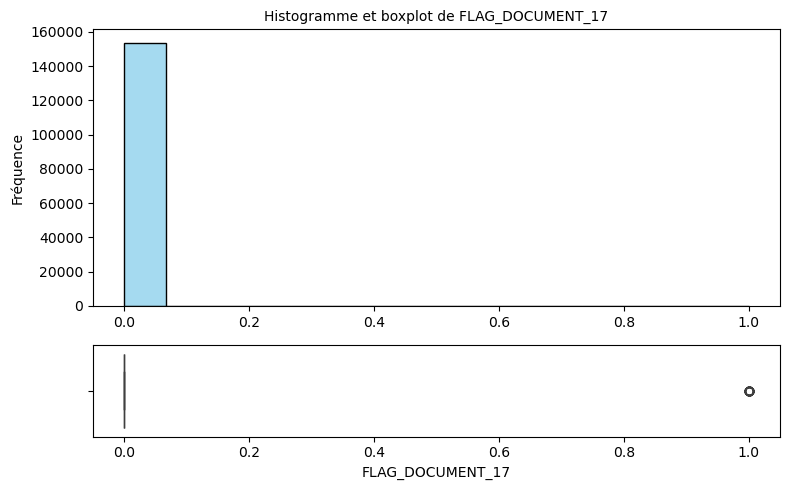

________________________________________

Analyse univariée de FLAG_DOCUMENT_18 : 


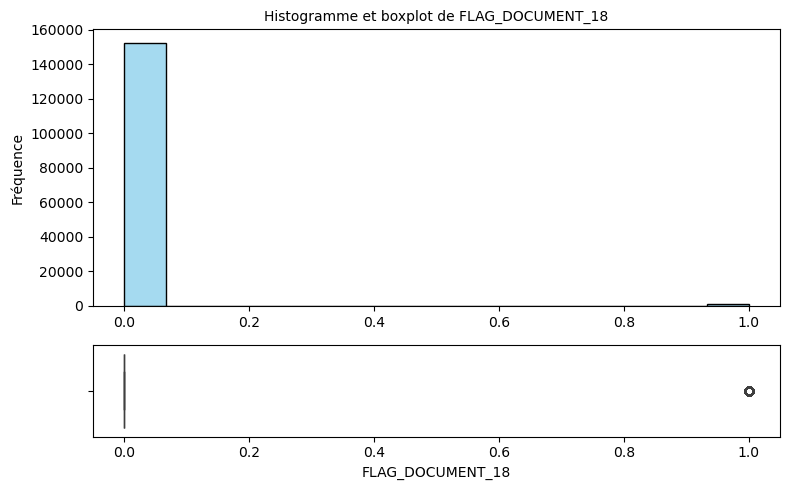

________________________________________

Analyse univariée de FLAG_DOCUMENT_19 : 


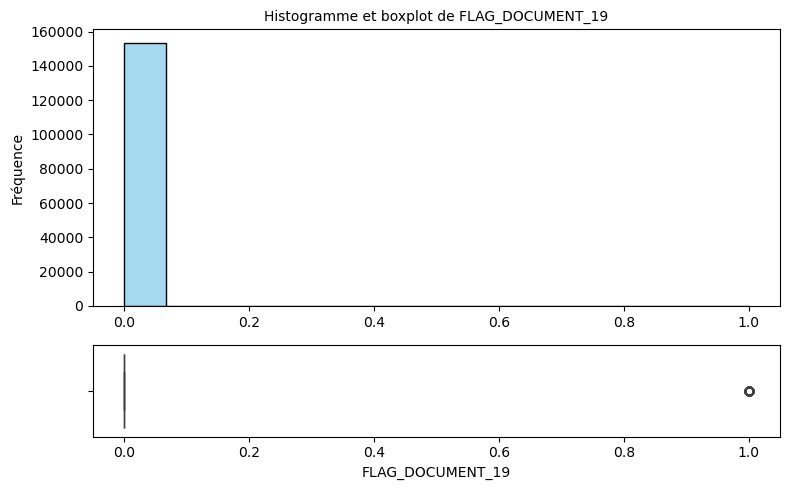

________________________________________

Analyse univariée de FLAG_DOCUMENT_20 : 


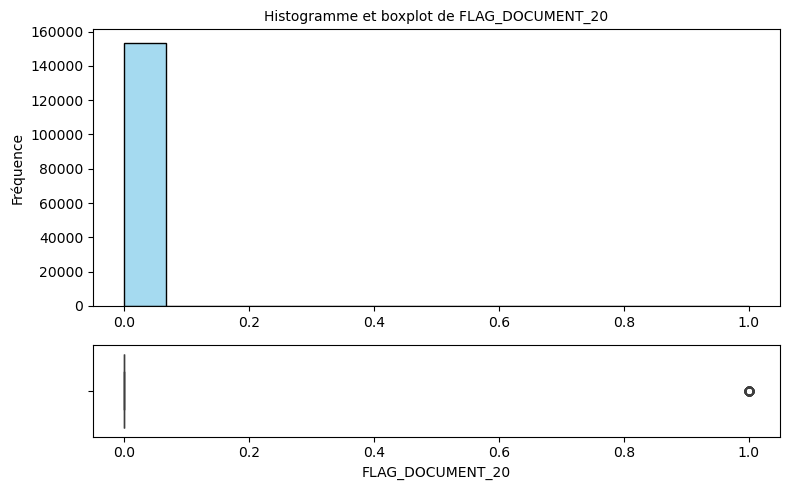

________________________________________

Analyse univariée de FLAG_DOCUMENT_21 : 


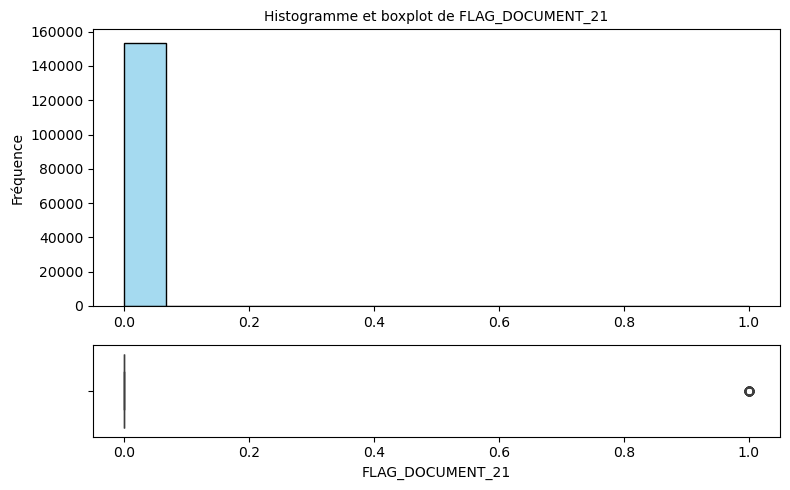

________________________________________

Analyse univariée de AMT_REQ_CREDIT_BUREAU_HOUR : 


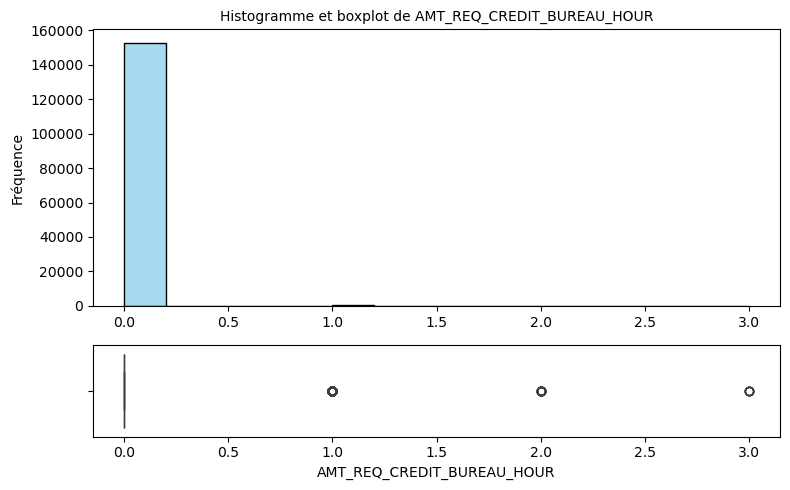

________________________________________

Analyse univariée de AMT_REQ_CREDIT_BUREAU_DAY : 


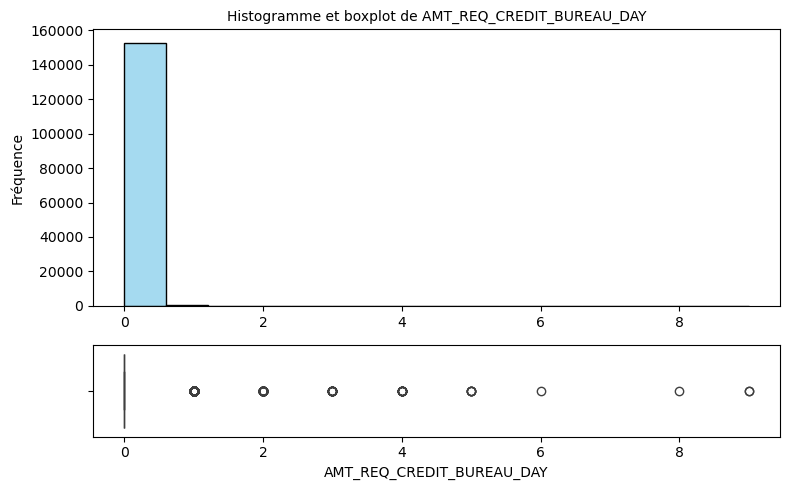

________________________________________

Analyse univariée de AMT_REQ_CREDIT_BUREAU_WEEK : 


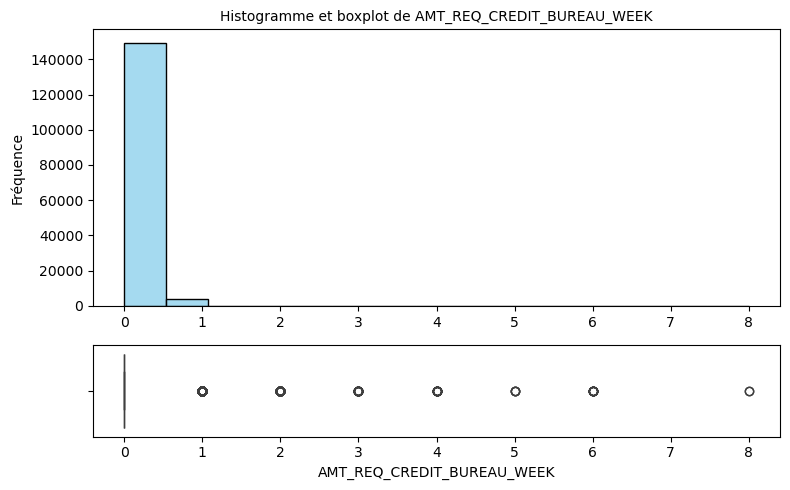

________________________________________

Analyse univariée de AMT_REQ_CREDIT_BUREAU_MON : 


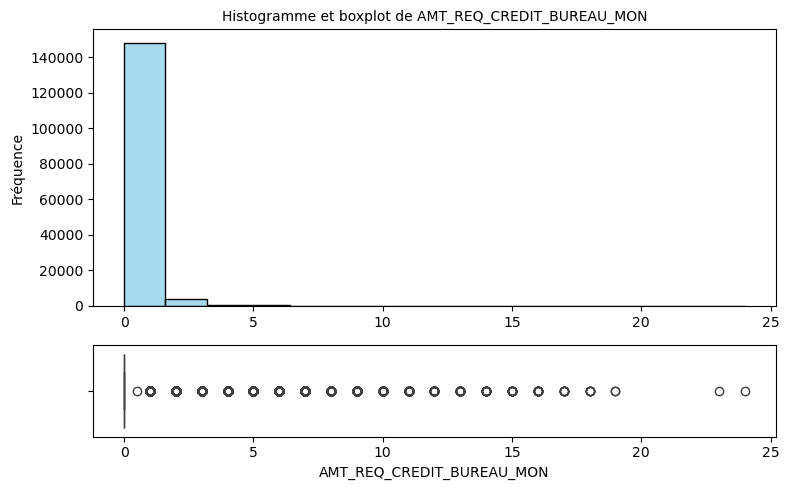

________________________________________

Analyse univariée de AMT_REQ_CREDIT_BUREAU_QRT : 


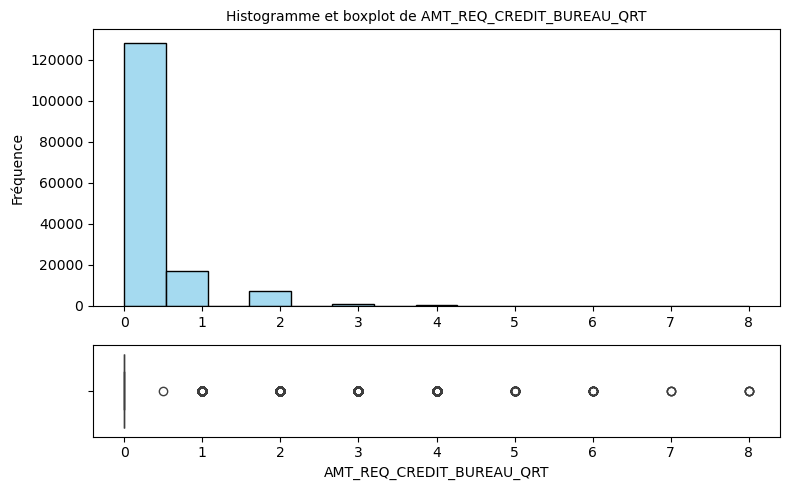

________________________________________

Analyse univariée de AMT_REQ_CREDIT_BUREAU_YEAR : 


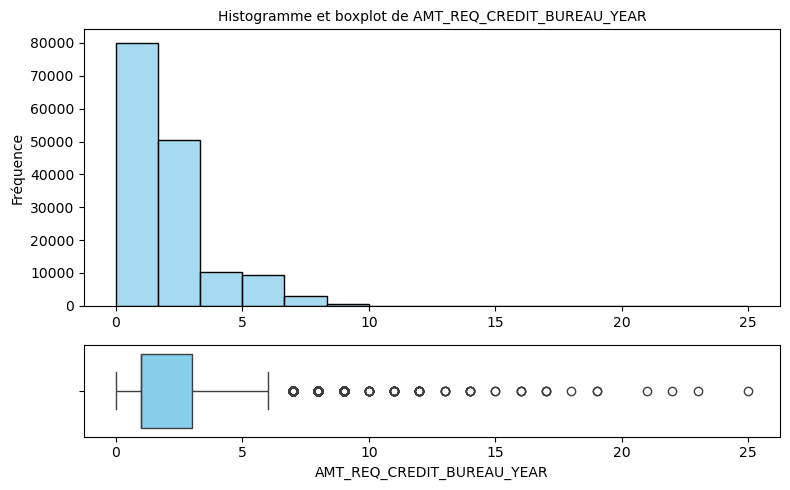

________________________________________


In [20]:
def analyze_numeric_features(df):
    """
    Affiche pour chaque variable numérique d'un DataFrame un histogramme et un boxplot.
    
    Paramètres :
    df (pandas.DataFrame) : Le DataFrame contenant les données numériques à analyser.
    
    Retour :
    None
    """
    numerical_features = df.select_dtypes(include=['number']).columns
    
    for num_features in numerical_features:
        print("\n\033[1mAnalyse univariée de\033[0m" , "\033[1m" + num_features + "\033[0m : ")
        
        # Création d'une figure
        fig = plt.figure(figsize=(8, 5))
        gs = GridSpec(2, 1, height_ratios=[3, 1])

        # Histogramme
        ax1 = fig.add_subplot(gs[0])
        sns.histplot(df[num_features], bins=15, kde=False, ax=ax1, color='skyblue')
        ax1.set_title(f'Histogramme et boxplot de {num_features}', fontsize=10)
        plt.ylabel('Fréquence')
        plt.xlabel('')

        # Boxplot
        ax2 = fig.add_subplot(gs[1], sharex=ax1)
        sns.boxplot(x=df[num_features], ax=ax2, boxprops={'facecolor': 'skyblue'})

        # Affichage du graphique
        plt.tight_layout()
        plt.show()
        print('_' * 40)
        
analyze_numeric_features(df_imputed)


Analyse univariée de NAME_CONTRACT_TYPE : 


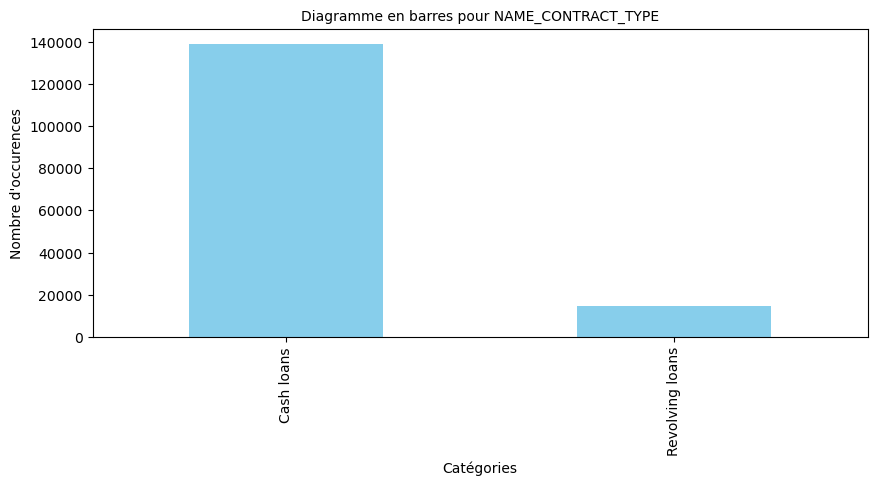

________________________________________

Analyse univariée de CODE_GENDER : 


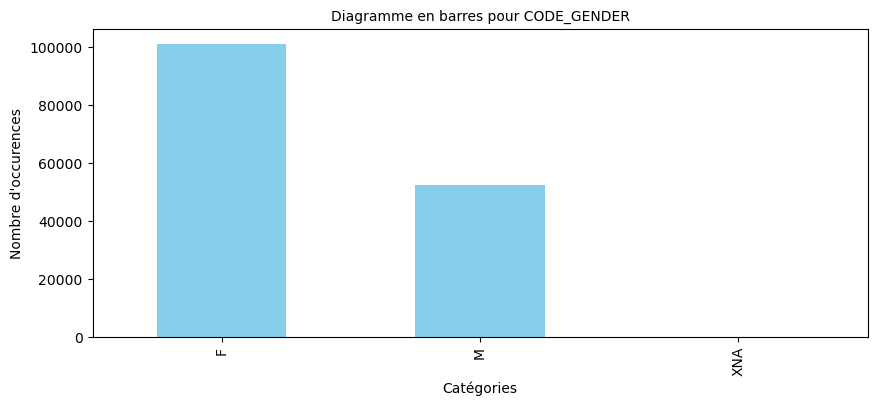

________________________________________

Analyse univariée de FLAG_OWN_CAR : 


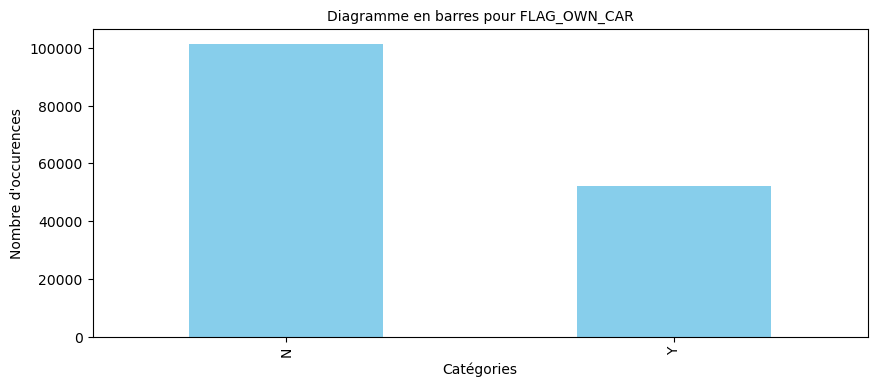

________________________________________

Analyse univariée de FLAG_OWN_REALTY : 


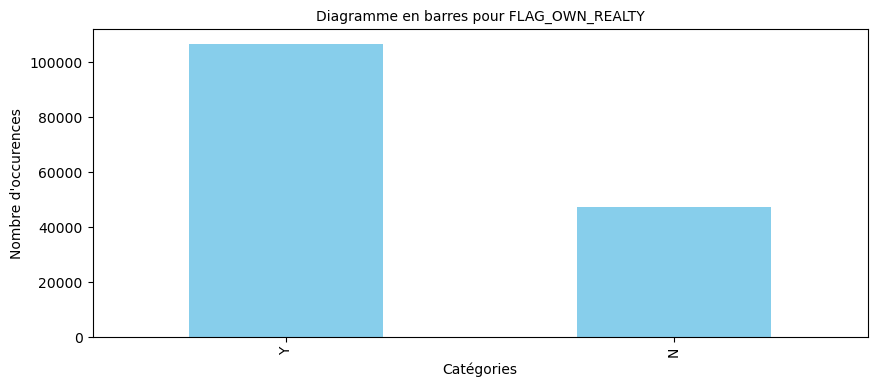

________________________________________

Analyse univariée de NAME_TYPE_SUITE : 


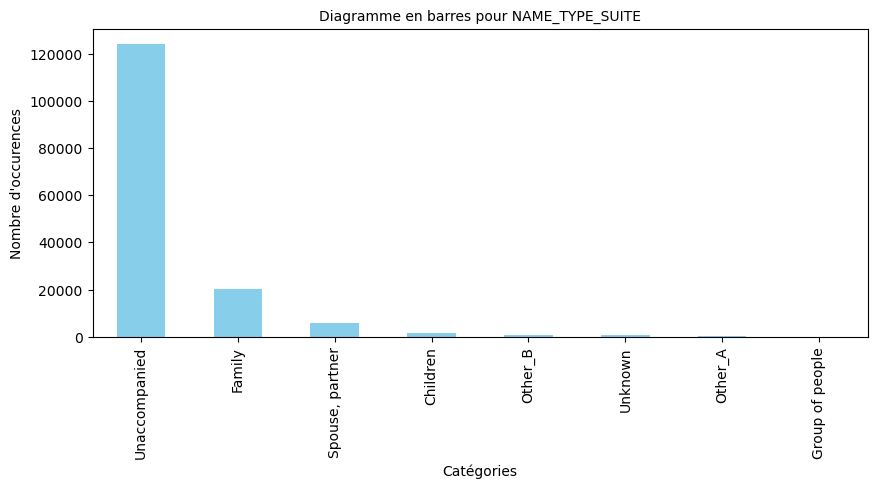

________________________________________

Analyse univariée de NAME_INCOME_TYPE : 


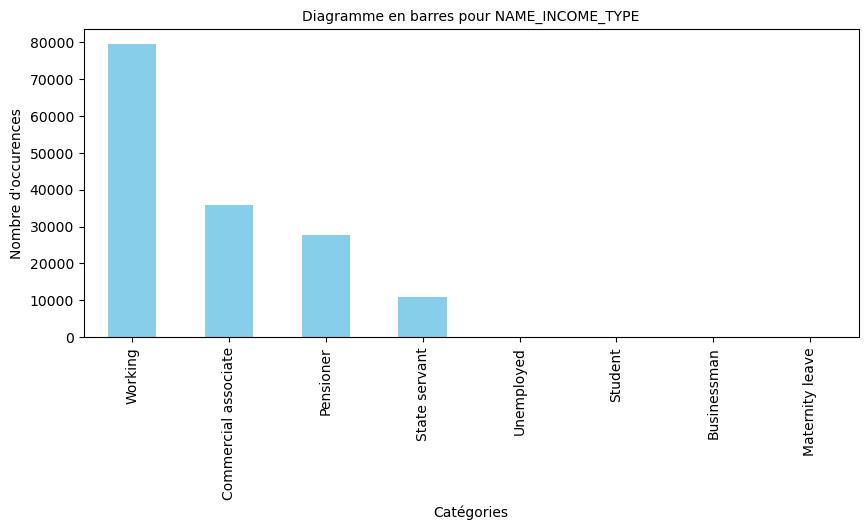

________________________________________

Analyse univariée de NAME_EDUCATION_TYPE : 


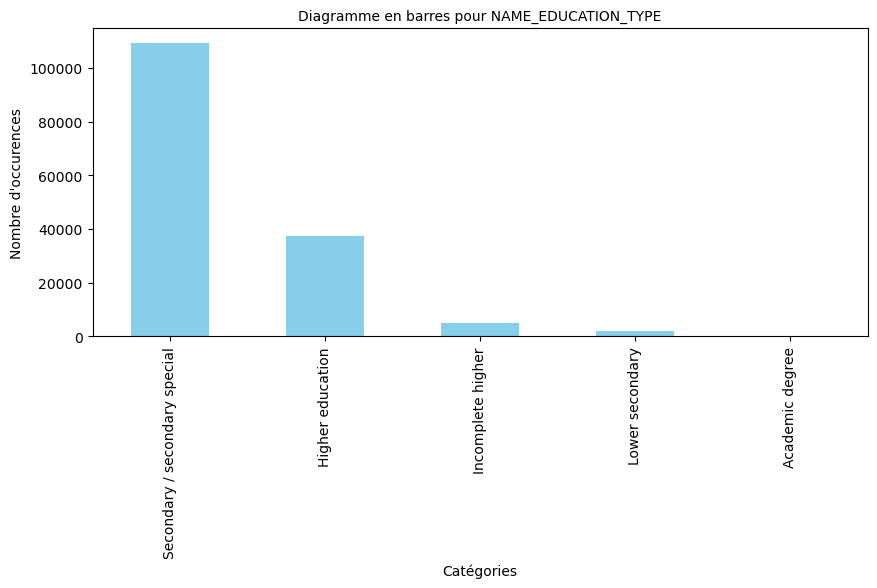

________________________________________

Analyse univariée de NAME_FAMILY_STATUS : 


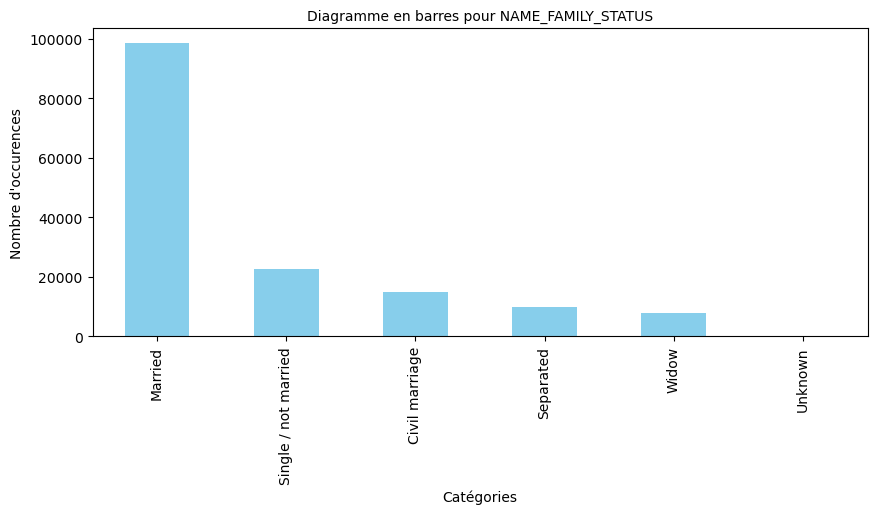

________________________________________

Analyse univariée de NAME_HOUSING_TYPE : 


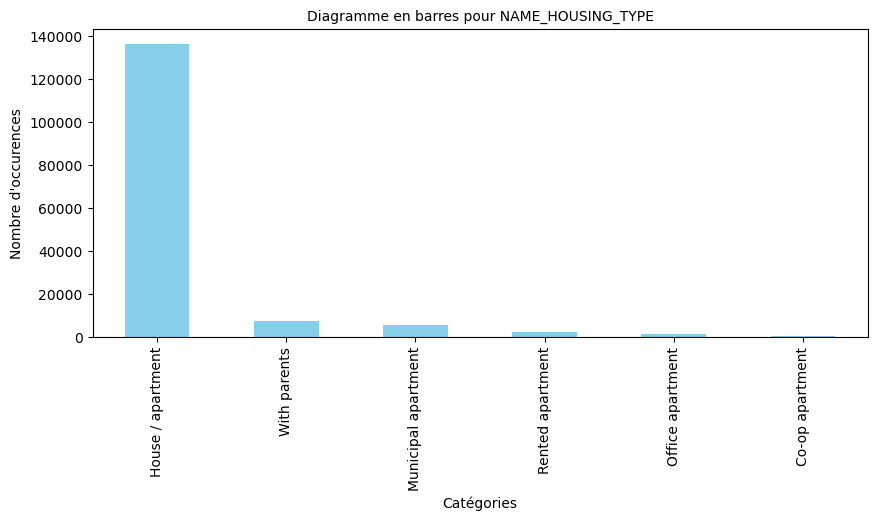

________________________________________

Analyse univariée de OCCUPATION_TYPE : 


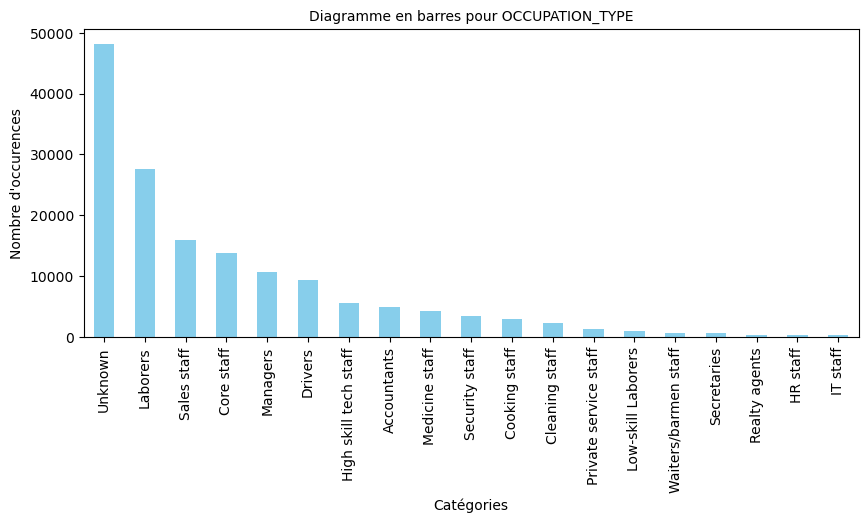

________________________________________

Analyse univariée de WEEKDAY_APPR_PROCESS_START : 


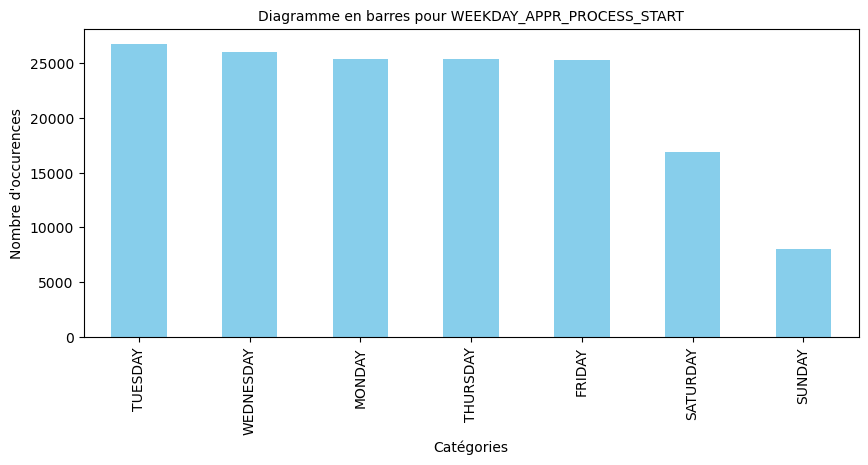

________________________________________

Analyse univariée de ORGANIZATION_TYPE : 


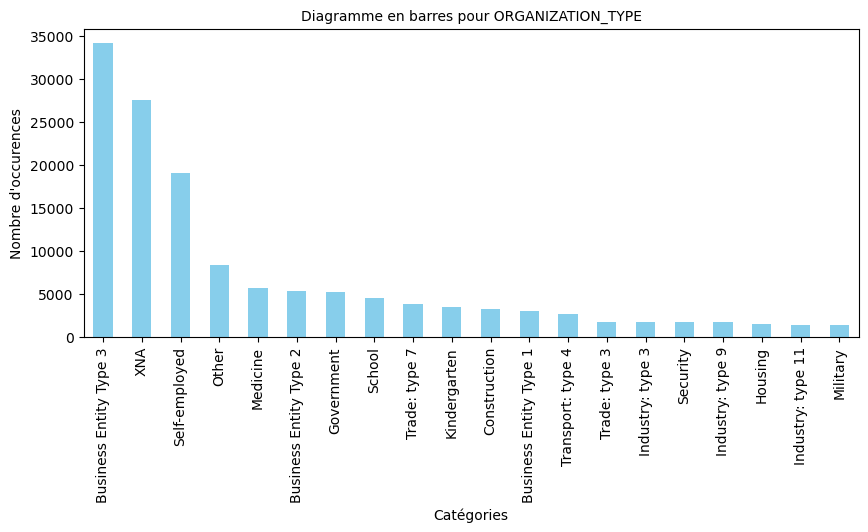

________________________________________


In [21]:
def analyze_categorical_features(df):
    """
    Affiche pour chaque variable catégorielle d'un DataFrame un diagramme en barres des 20 catégories les plus fréquentes.
    
    Paramètres :
    df (pandas.DataFrame): Le DataFrame contenant les données numériques à analyser.
    
    Retour :
    None
    """
    categorical_features = df.select_dtypes(include=['object']).columns
    
    for cat_features in categorical_features:
        print("\n\033[1mAnalyse univariée de\033[0m" , "\033[1m" + cat_features + "\033[0m : ")
        
        # Calcul des fréquences
        frequences = df[cat_features].value_counts()
            
        # Sélection des 20 premières catégories
        df_filtred = frequences.head(20)
            
        # Création d'une figure de type diagramme en barres
        plt.figure(figsize=(10, 4))
        df_filtred.plot(kind='bar', color='skyblue')
        plt.title(f'Diagramme en barres pour {cat_features}', fontsize=10)
        plt.xlabel('Catégories')
        plt.ylabel("Nombre d'occurences")
        
        # Affichage du graphique
        plt.show()
        print('_' * 40)

analyze_categorical_features(df_imputed)

##### Gestion des valeurs aberrantes

Les analyses univariées semblent révéler plusieurs anomalies parmis les variables numériques :

###### AMT_INCOME_TOTAL (revenu du client)

Un client possède un revenu de près de 120 000 000,00 € par an. Il est surprenant qu'une personne ayant un tel revenu sollicite un crédit.

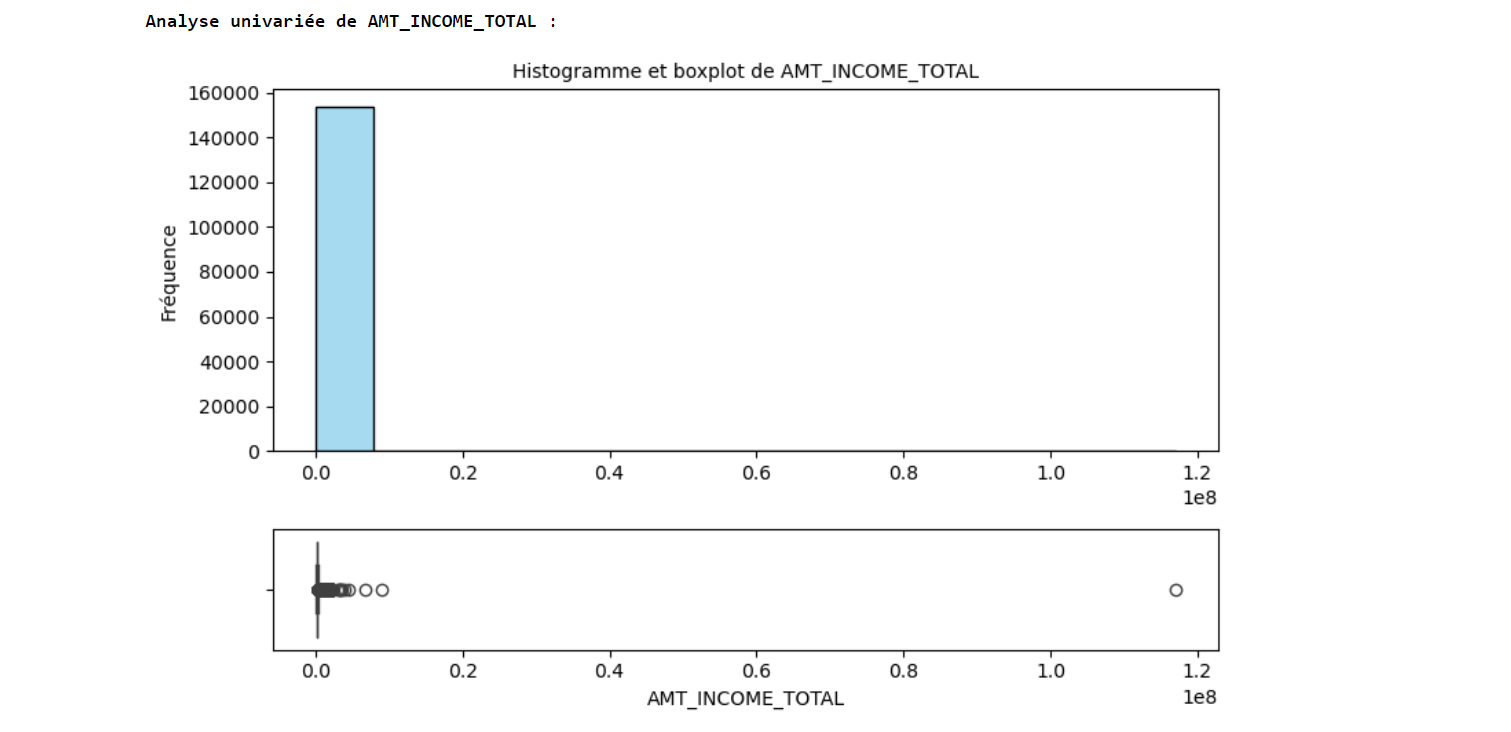

In [22]:
df_imputed[df_imputed['AMT_INCOME_TOTAL'] > 1e7]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840    114967.0     1.0         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840               Y           1.0       117000000.0    562491.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
12840      26194.5         454500.0   Unaccompanied          Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840  Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840                    0.010643    -12615.0         -922.0   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
12840            -6762.0          -3643.0         1.0             1.0   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
12840              0.0               1.0         0.0         0.0   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
12840        Laborers              3.0                   2.0   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
12840                          2.0                    TUESDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
12840                     14.0                         0.0   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
12840                         0.0                          0.0   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
12840                     0.0                     0.0   

       LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
12840                      0.0  Business Entity Type 3      0.113161   

       EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
12840      0.145543                       0.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
12840                       0.0                       0.0   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
12840                     0.0              0.0              1.0   

       FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
12840              0.0              0.0              0.0              0.0   

       FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
12840              0.0              0.0               0.0               0.0   

       FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
12840               0.0               0.0               0.0               0.0   

       FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
12840               0.0               0.0               0.0               0.0   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
12840               0.0               0.0                         0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
12840                        0.0                         0.0   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
12840                        0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_YEAR  
12840                         1.0

On observe une incohérence notable dans cette observation : malgré des revenus annuels de plusieurs dizaines de millions, le client n'a pas remboursé son crédit à temps (d'un montant de 562 491€), comme l'indique la valeur "1" de la variable `TARGET`. De plus, la personne est employée en tant que "Laborers", un poste peu compatible avec un tel niveau de revenus.

Ces contradictions suggèrent une erreur potentielle dans les données. C'est pourquoi, nous allons supprimer cette observation :

In [23]:
df_imputed = df_imputed.drop(index=12840)

###### DAYS_EMPLOYED (ancienneté dans l'emploi)

Certaines observations présentent des valeurs extrêmement élevées (supérieures à 350 000 jours), ce qui est impossible.

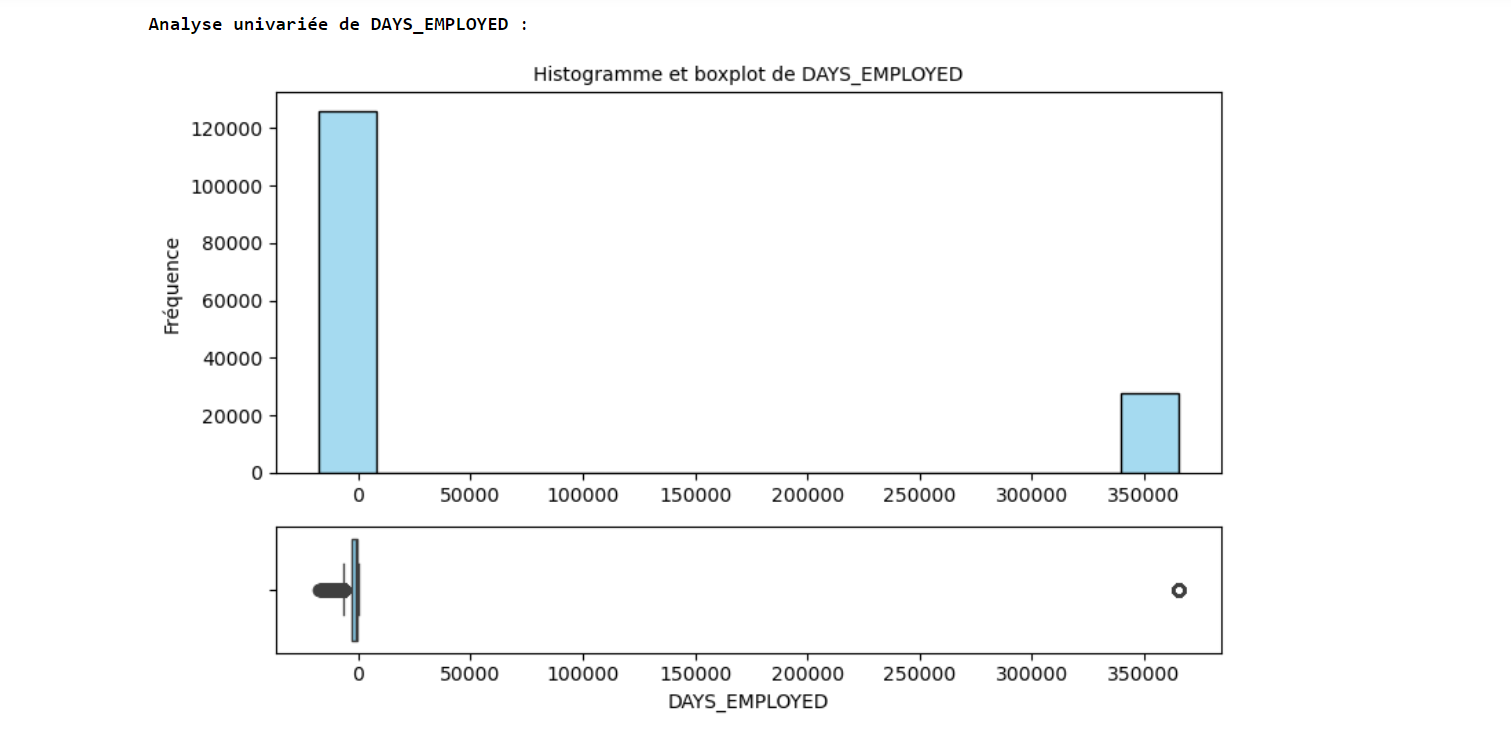

Observons les situations professionnelles de ces clients :

In [24]:
print('Type de revenu du client :', df_imputed.loc[df_imputed['DAYS_EMPLOYED'] > 350000, 'NAME_INCOME_TYPE'].unique())
print("Secteur d'activité :", df_imputed.loc[df_imputed['DAYS_EMPLOYED'] > 350000, 'ORGANIZATION_TYPE'].unique())

Type de revenu du client : ['Pensioner' 'Unemployed']
Secteur d'activité : ['XNA']


Il s'agit de clients sans emploi, nous allons donc remplacer les valeurs supérieures à 350 000 par 0 :

In [25]:
# Remplacer les valeurs supérieures à 350 000 par 0
df_imputed.loc[df_imputed['DAYS_EMPLOYED'] > 350000, 'DAYS_EMPLOYED'] = 0

###### OBS_30_SOC, DEF_30_SOC, OBS_60_SOC, DEF_60_SOC (fréquence des défauts de paiement dans l'entourage social du client)

Une observation présente des valeurs particulièrement élevées pour ces variables.

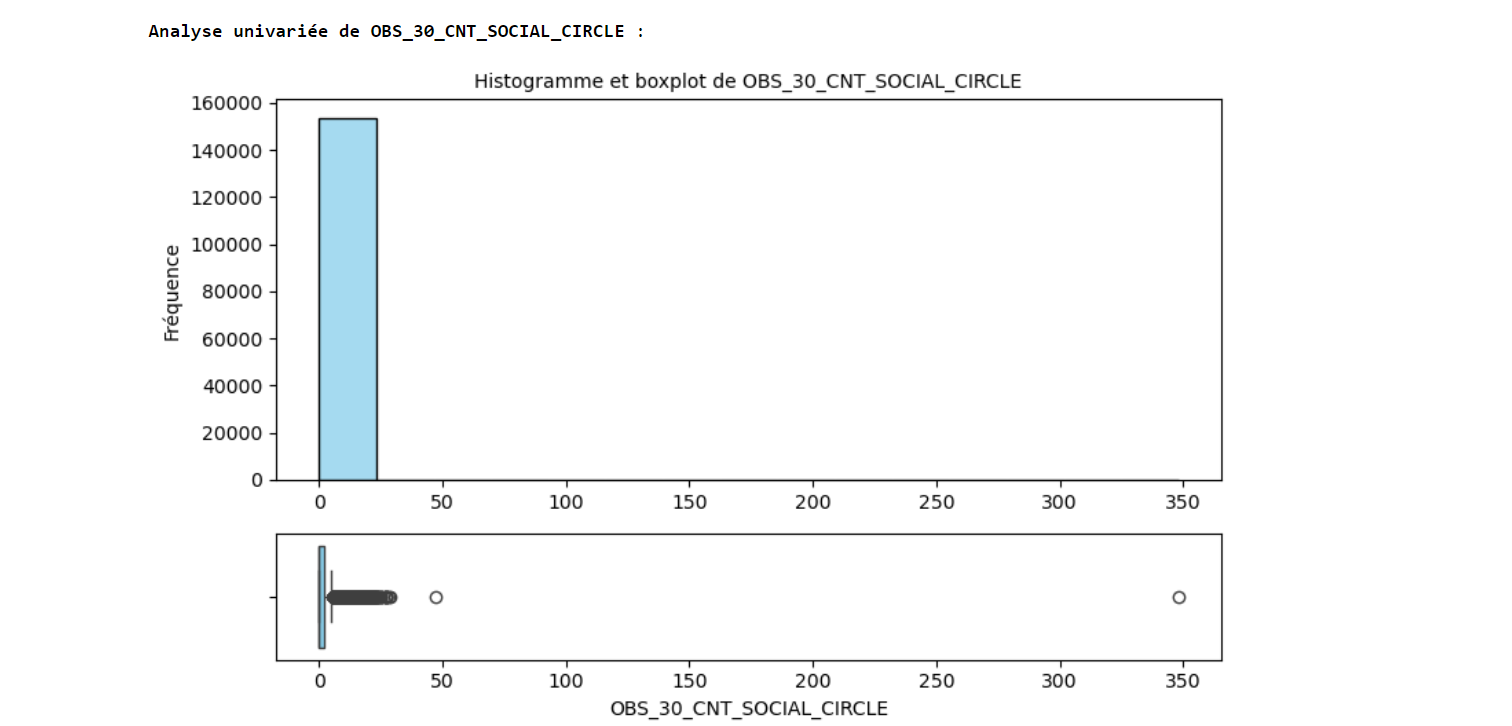

Examinons cela de plus près :

In [26]:
df_imputed[df_imputed['OBS_30_CNT_SOCIAL_CIRCLE'] > 300]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
148403    272071.0     0.0    Revolving loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
148403               Y           0.0          202500.0    180000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
148403       9000.0         180000.0          Family    State servant   

       NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
148403    Higher education  Single / not married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
148403                    0.020246    -10111.0        -1917.0   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
148403            -2306.0          -2306.0         1.0             1.0   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
148403              0.0               1.0         0.0         0.0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
148403      Core staff              1.0                   3.0   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
148403                          3.0                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
148403                      9.0                         0.0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
148403                         0.0                          0.0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
148403                     0.0                     1.0   

        LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
148403                      1.0            Police      0.304506      0.357293   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
148403                     348.0                      34.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
148403                     344.0                      24.0   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
148403                  -667.0              0.0              0.0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
148403              0.0              0.0              0.0              0.0   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
148403              0.0              0.0               0.0               0.0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
148403               0.0               0.0               0.0   

        FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
148403               0.0               0.0               0.0   

        FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
148403               0.0               0.0               0.0   

        FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
148403               0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
148403                        0.0                         1.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
148403                        1.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  
148403                         3.0

Il semble que cette observation contienne des valeurs aberrantes, car il est peu probable que ce client fréquente plus de 300 personnes dans son entourage présentant des retards de paiement. Nous allons donc la supprimer :

In [27]:
df_imputed = df_imputed.drop(index=148403)

Vérification des modifications :


Analyse univariée de AMT_INCOME_TOTAL : 


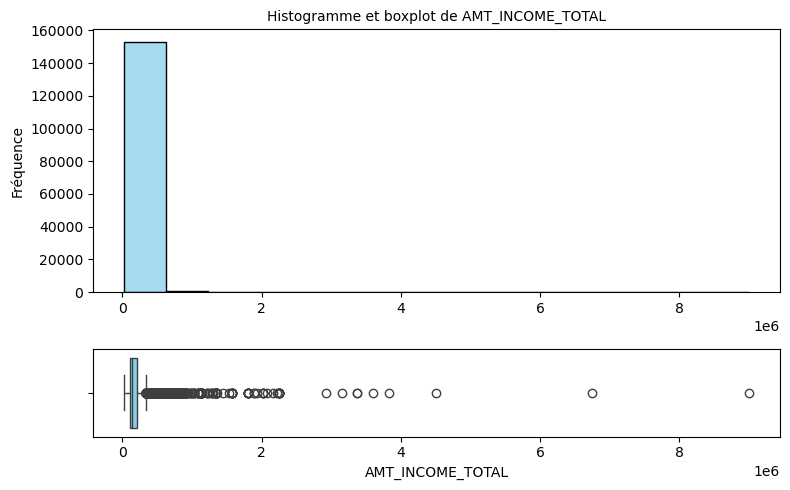

________________________________________

Analyse univariée de DAYS_EMPLOYED : 


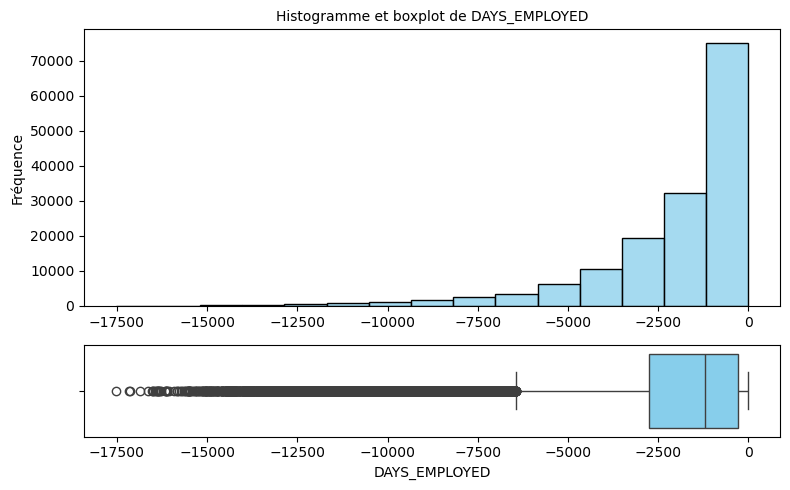

________________________________________

Analyse univariée de OBS_30_CNT_SOCIAL_CIRCLE : 


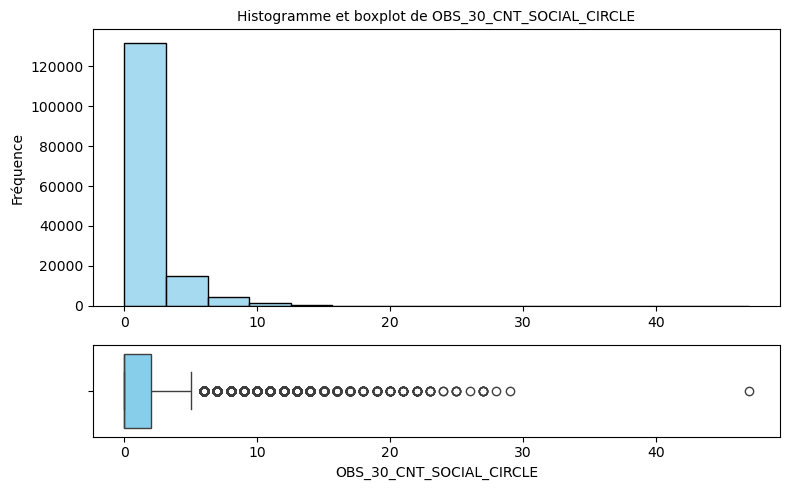

________________________________________


In [28]:
analyze_numeric_features(df_imputed[['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'OBS_30_CNT_SOCIAL_CIRCLE']])

#### Analyse bivariée
##### Relations entre la variable cible et les variables numériques
###### Corrélations

Nous allons d'abord calculer la matrice de corrélation pour examiner les relations entre les variables numériques et la variable cible (`TARGET`). Ensuite, nous filtrerons les variables pour ne conserver que celles ayant une corrélation absolue avec la cible supérieure à 0.05. Cela permet de se concentrer uniquement sur les relations les plus importantes.

In [29]:
# Calcul de la matrice de corrélation
corr_matrix = df_imputed[numerical_features].corr()

# Définir un seuil de corrélation
threshold = 0.05

# Trier les variables selon leur corrélation avec la cible
corr_with_target = corr_matrix['TARGET'].abs().sort_values(ascending=False)

# Afficher les variables qui ont une corrélation supérieure au seuil
most_corr_variables = corr_with_target[corr_with_target > threshold]
print(most_corr_variables)

TARGET                         1.000000
EXT_SOURCE_2                   0.163010
EXT_SOURCE_3                   0.155660
DAYS_BIRTH                     0.079246
REGION_RATING_CLIENT_W_CITY    0.062243
REGION_RATING_CLIENT           0.060933
DAYS_LAST_PHONE_CHANGE         0.055422
DAYS_ID_PUBLISH                0.052659
REG_CITY_NOT_WORK_CITY         0.051558
Name: TARGET, dtype: float64


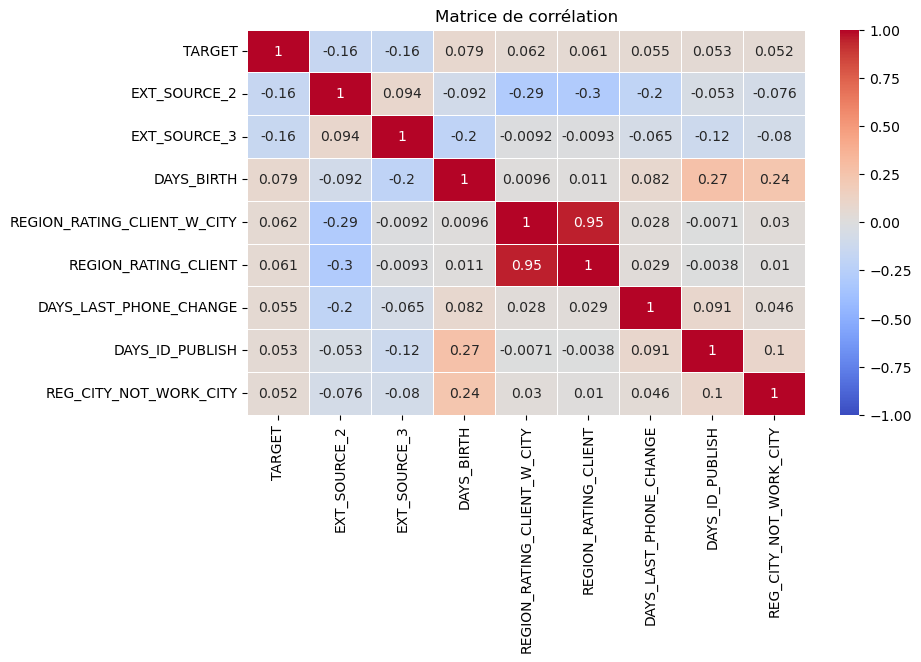

In [30]:
# Sélectionner les colonnes les plus corrélées pour créer une sous-matrice de corrélation
most_corr_columns = most_corr_variables.index
sub_corr_matrix = df_imputed[most_corr_columns].corr()

# Heatmap des variables les plus corrélées avec la cible
plt.figure(figsize=(9, 5))
sns.heatmap(sub_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

On peut observer que les variables les plus corrélées à notre cible sont :

- `EXT_SOURCE_2` et `EXT_SOURCE_3` : Scores normalisés provenant d'une source de données externe.
- `DAYS_BIRTH` : Age du client au moment de la demande de crédit.
- `DAYS_EMPLOYED` : Nombre de jours depuis que le client a commencé son emploi actuel.

###### Histogrammes

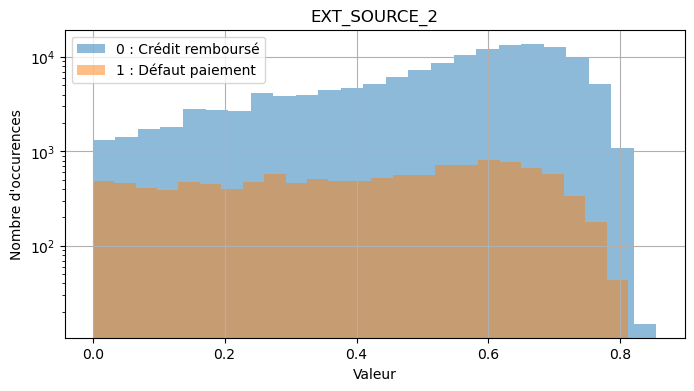

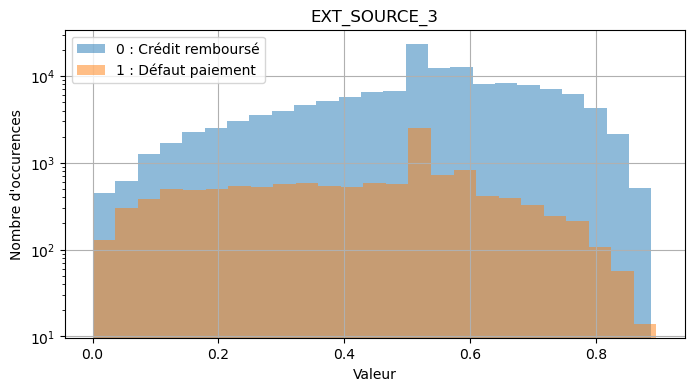

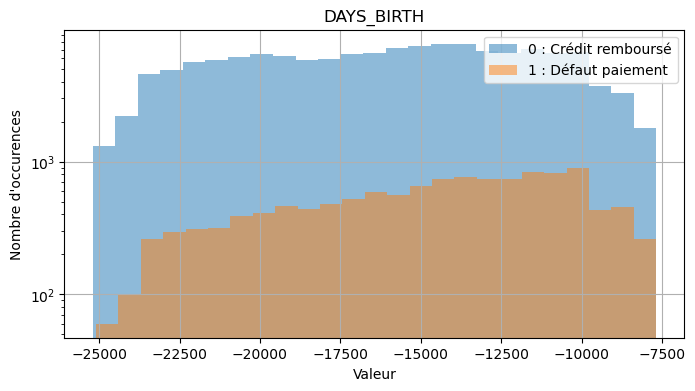

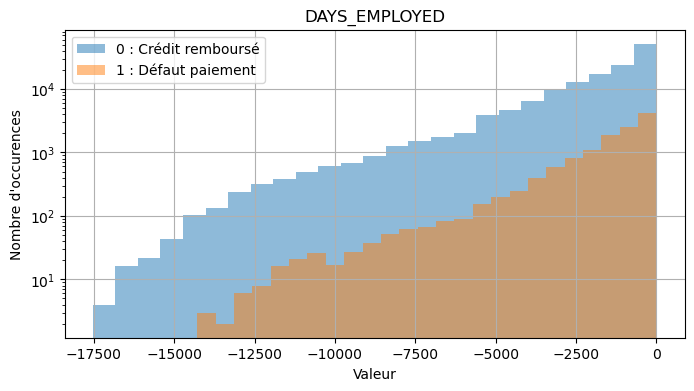

In [31]:
for column in ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED']:
    df_imputed.groupby('TARGET')[column].hist(bins=25, figsize=(8, 4), alpha=0.5, log=True)
    plt.title(column)
    plt.xlabel("Valeur")
    plt.ylabel("Nombre d'occurences")
    plt.legend(['0 : Crédit remboursé', '1 : Défaut paiement'])
    plt.show()

###### Boxplots

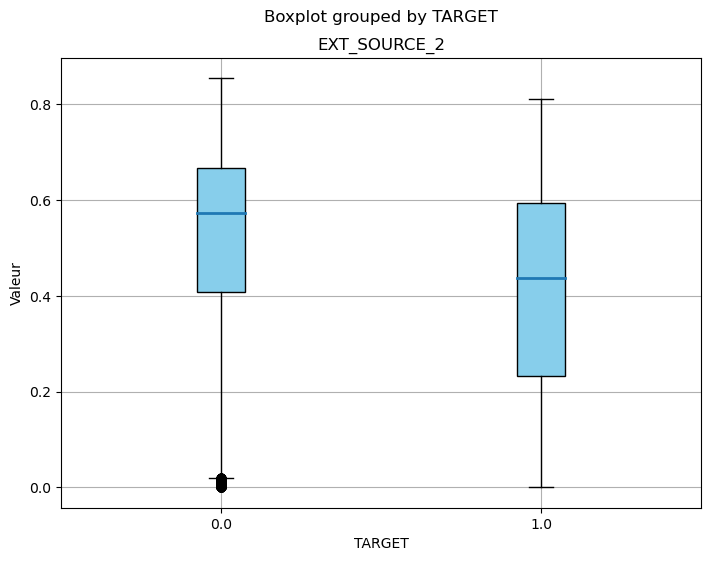

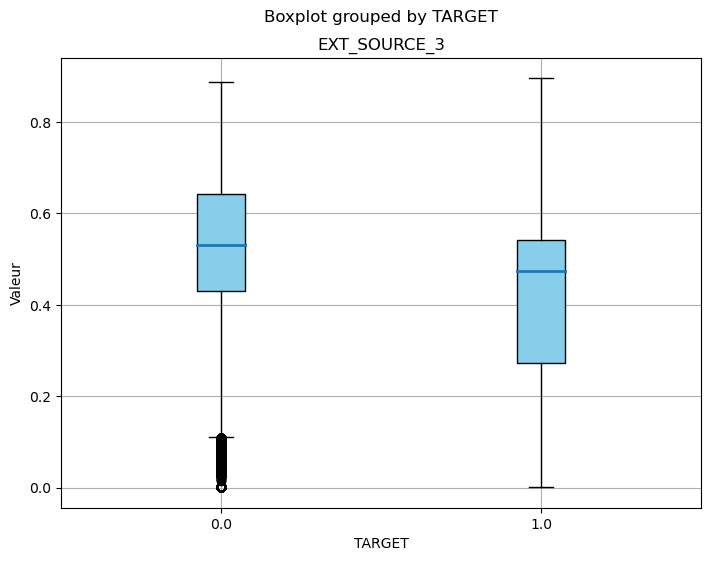

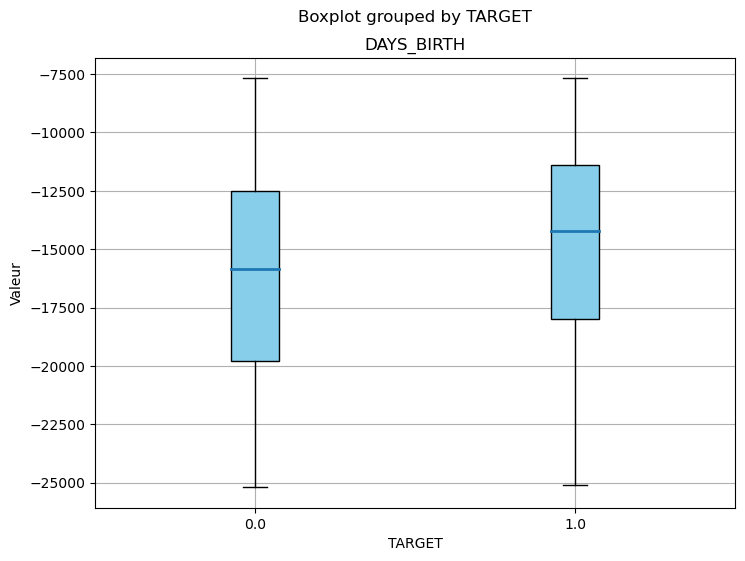

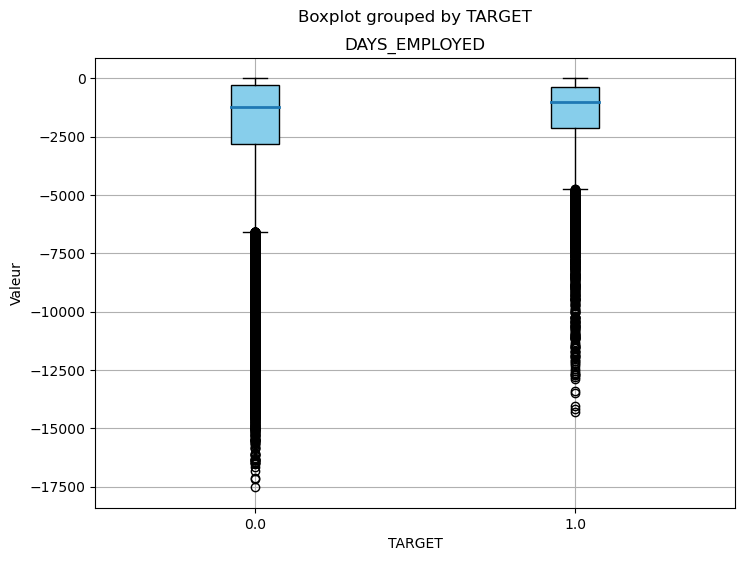

In [32]:
for i, column in enumerate(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED']):
    boxplot = df_imputed.boxplot(
        column=column, by='TARGET', figsize=(8, 6), vert=True,
        patch_artist=True,
        boxprops=dict(facecolor='skyblue', color='black'),
        whiskerprops=dict(color='black'), 
        capprops=dict(color='black'),
        medianprops=dict(color='#1f78b4', linewidth=2)
    )
    plt.title(column)
    plt.xlabel("TARGET")
    plt.ylabel("Valeur")
    plt.show()

Étant donné que le jeu de données contient une proportion beaucoup plus élevée d'observations où les prêts ont été remboursés à temps (`TARGET` = 0) comparé à celles où il y a eu défaut de paiement (`TARGET` = 1), il est logique d’observer sur les histogrammes un nombre plus important de clients ayant remboursé leur crédit à temps quelle que soit la valeur de la variable analysée.

Toutefois, les boxplots révèlent que les défauts de paiement semblent plus fréquents chez les clients jeunes, ceux ayant peu d'ancienneté dans leur emploi, ainsi que ceux avec des valeurs faibles pour les variables `EXT_SOURCE_2` et `EXT_SOURCE_3`.

Vérifions cela à l'aide d'un test ANOVA à un facteur :

###### Statistiques

In [33]:
# Préparation de la liste pour stocker les résultats
table_data = []

# Test ANOVA pour chaque variable
for column in ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED']:
    anova_result = f_oneway(*df_imputed.groupby("TARGET")[column].apply(list))
    statistic = anova_result.statistic
    p_value = anova_result.pvalue
    table_data.append([column, statistic, p_value])

# Création du DataFrame et conversion en listes
df_results = pd.DataFrame(table_data, columns=["Variable", "F-statistic", "p-value"])
table_list = df_results.values.tolist()

# Affichage du tableau avec tabulate
print(tabulate(table_list, headers=df_results.columns, tablefmt='fancy_grid', floatfmt=".4f"))

╒═══════════════╤═══════════════╤═══════════╕
│ Variable      │   F-statistic │   p-value │
╞═══════════════╪═══════════════╪═══════════╡
│ EXT_SOURCE_2  │     4197.0541 │    0.0000 │
├───────────────┼───────────────┼───────────┤
│ EXT_SOURCE_3  │     3817.8946 │    0.0000 │
├───────────────┼───────────────┼───────────┤
│ DAYS_BIRTH    │      971.6546 │    0.0000 │
├───────────────┼───────────────┼───────────┤
│ DAYS_EMPLOYED │      312.4093 │    0.0000 │
╘═══════════════╧═══════════════╧═══════════╛


Une p-value inférieure au seuil alpha (fixé à 0,05) indique que l'effet est statistiquement significatif.

Etant donné que les p-values des variables `EXT_SOURCE_2`, `EXT_SOURCE_3`, `DAYS_BIRTH` et `DAYS_EMPLOYED` sont sous le seuil alpha, cela signifie qu'il y a bien un effet statistique significatif entre notre variable cible et ces dernières.

##### Relations entre la variable cible et les variables catégorielles
###### Diagrammes en barres

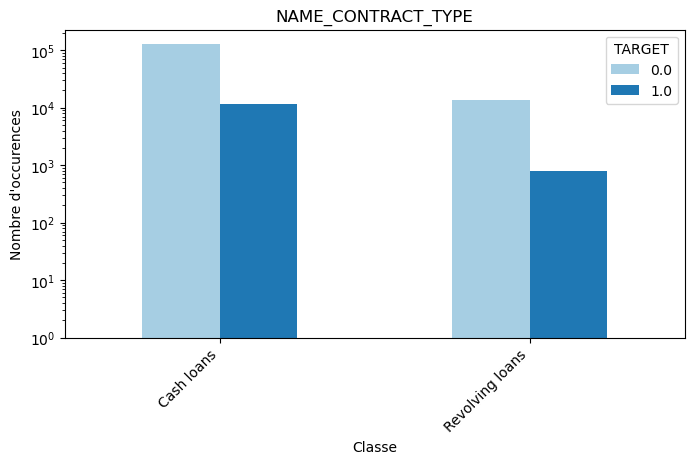

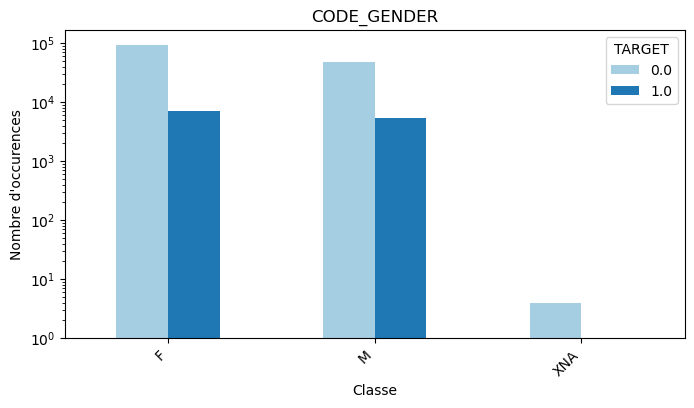

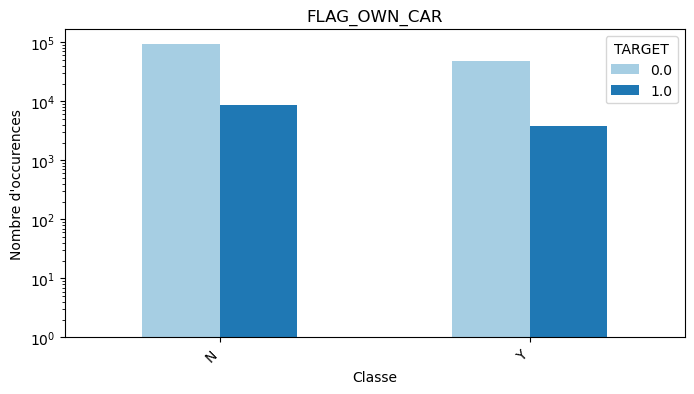

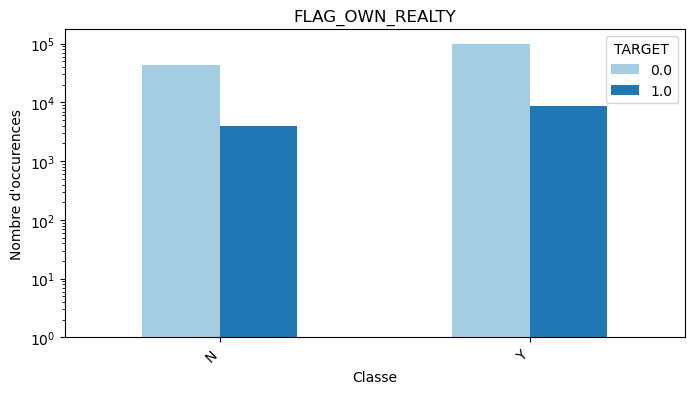

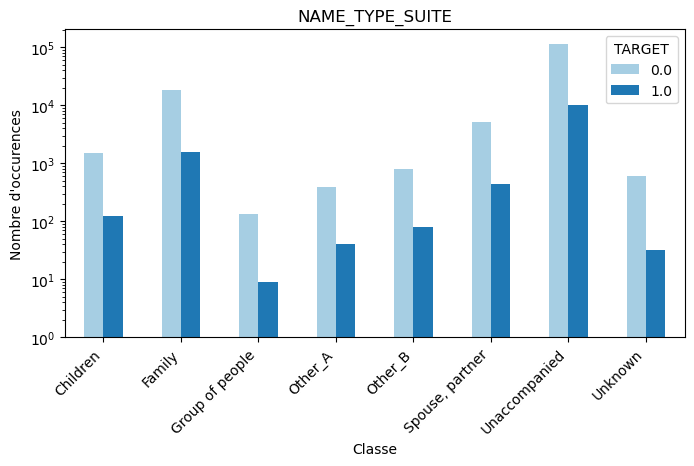

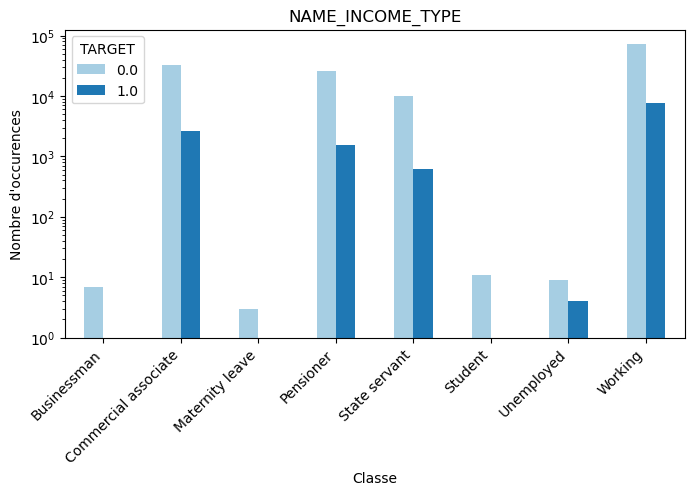

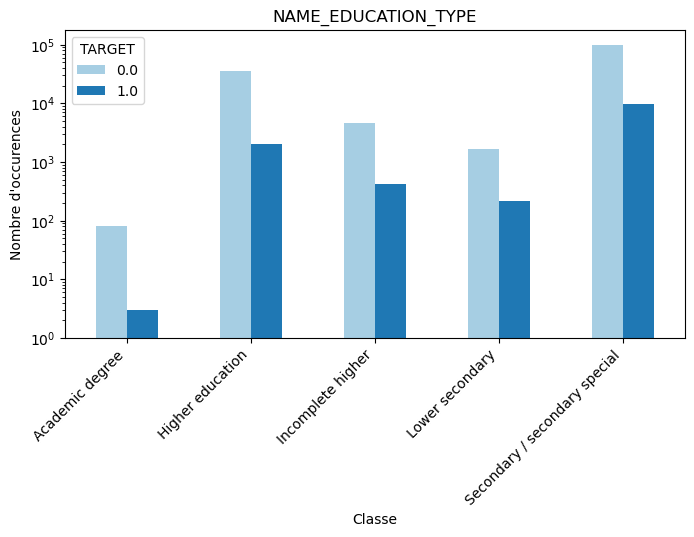

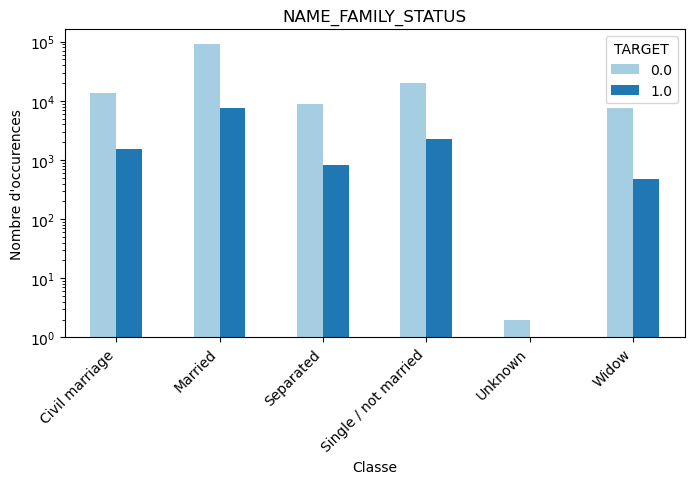

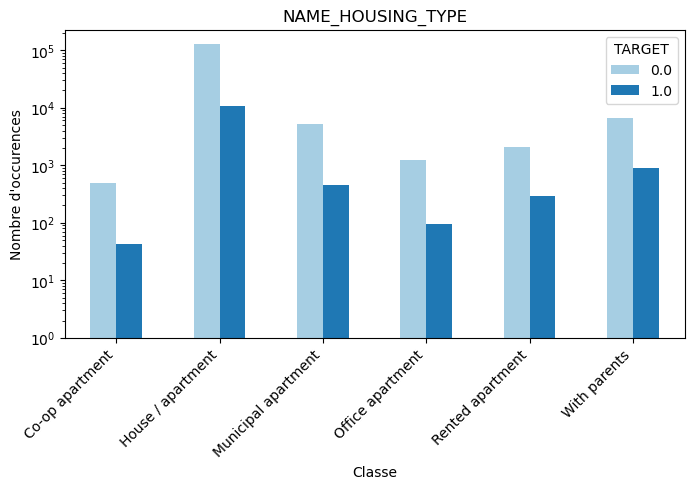

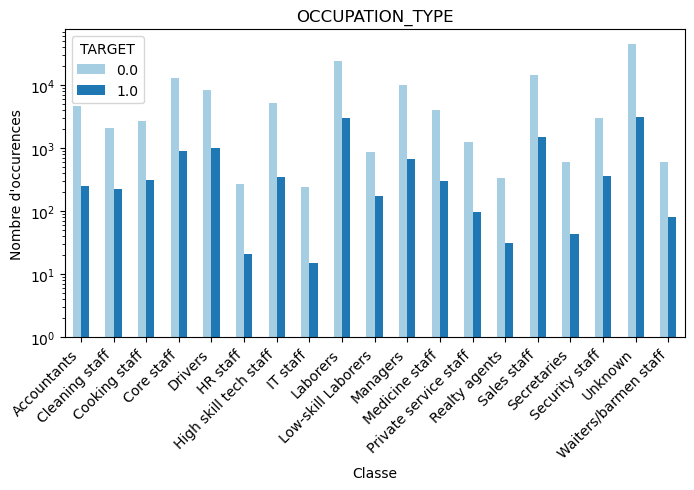

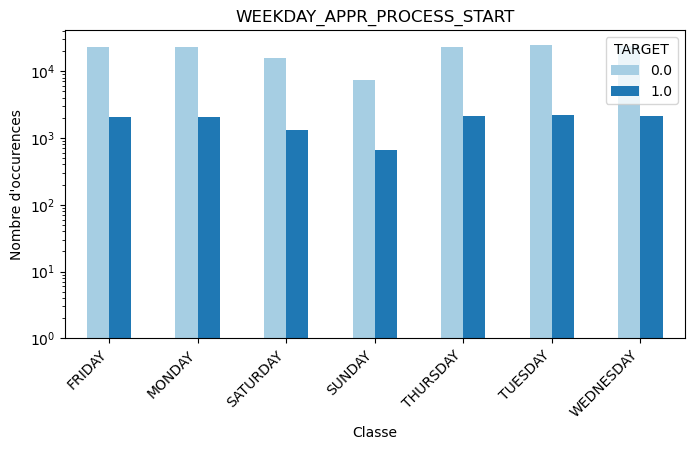

In [34]:
for column in categorical_features[:-1]:
    # Création d'un tableau de contingence
    crosstab = pd.crosstab(index=df_imputed[column], columns=df_imputed['TARGET'])
    # Graphique à barres groupées pour comparer la distribution des variables en fonction de la classe de TARGET
    crosstab.plot.bar(figsize=(8, 4), rot=0, log=True, color=sns.color_palette("Paired", n_colors=2))
    plt.title(column)
    plt.xlabel("Classe")
    plt.ylabel("Nombre d'occurences")
    plt.xticks(rotation=45, ha='right')

###### Statistiques

Nous allons effectuer un test de Chi-carré pour évaluer les relations entre les variables catégorielles et la variable cible.

In [35]:
# Préparation de la liste pour stocker les résultats
table_data = []

# Test du Chi-carré pour chaque variable
for column in categorical_features:
    chi2_result = chi2_contingency(pd.crosstab(index=df_imputed["TARGET"], columns=df_imputed[column]))
    statistic = chi2_result.statistic
    p_value = chi2_result.pvalue
    table_data.append([column, statistic, p_value])

# Création du DataFrame et conversion en listes
df_results = pd.DataFrame(table_data, columns=["Variable", "chi2", "p-value"])
table_list = df_results.values.tolist()

# Affichage du tableau avec tabulate
print(tabulate(table_list, headers=df_results.columns, tablefmt='fancy_grid', floatfmt=".4f"))

╒════════════════════════════╤══════════╤═══════════╕
│ Variable                   │     chi2 │   p-value │
╞════════════════════════════╪══════════╪═══════════╡
│ NAME_CONTRACT_TYPE         │ 155.1079 │    0.0000 │
├────────────────────────────┼──────────┼───────────┤
│ CODE_GENDER                │ 481.7474 │    0.0000 │
├────────────────────────────┼──────────┼───────────┤
│ FLAG_OWN_CAR               │  80.1199 │    0.0000 │
├────────────────────────────┼──────────┼───────────┤
│ FLAG_OWN_REALTY            │   5.5353 │    0.0186 │
├────────────────────────────┼──────────┼───────────┤
│ NAME_TYPE_SUITE            │  19.0530 │    0.0080 │
├────────────────────────────┼──────────┼───────────┤
│ NAME_INCOME_TYPE           │ 624.8855 │    0.0000 │
├────────────────────────────┼──────────┼───────────┤
│ NAME_EDUCATION_TYPE        │ 512.6165 │    0.0000 │
├────────────────────────────┼──────────┼───────────┤
│ NAME_FAMILY_STATUS         │ 294.7871 │    0.0000 │
├───────────────────────────

Une p-value inférieure au seuil alpha (fixé à 0,05) indique que l'effet est statistiquement significatif. On peut donc conclure qu'il existe des relations significatives entre les variables catégorielles et la variable cible.

Seule la variable `WEEKDAY_APPR_PROCESS_START` a une p-value supérieure au seuil alpha, indiquant qu'il ne semble pas avoir de lien avec la variable `TARGET`.

### Feature Engineering

#### Création de nouvelles variables

In [36]:
# Nombre de jours travaillé dans son emploi actuel / âge
df_imputed['DAYS_EMPLOYED_PERC'] = df_imputed['DAYS_EMPLOYED'] / df_imputed['DAYS_BIRTH']

# Revenu total / Montant du crédit
df_imputed['INCOME_CREDIT_PERC'] = df_imputed['AMT_INCOME_TOTAL'] / df_imputed['AMT_CREDIT']

# Revenu total / Taille de la famille du client
df_imputed['INCOME_PER_PERSON'] = df_imputed['AMT_INCOME_TOTAL'] / df_imputed['CNT_FAM_MEMBERS']

# Remboursement annuel / Revenu total
df_imputed['ANNUITY_INCOME_PERC'] = df_imputed['AMT_ANNUITY'] / df_imputed['AMT_INCOME_TOTAL']

# Remboursement annuel / Montant du crédit
df_imputed['PAYMENT_RATE'] = df_imputed['AMT_ANNUITY'] / df_imputed['AMT_CREDIT']

#### Transformation des variables
##### Transformation logarithmique

Idendification des variables présentant une forte asymétrie afin d'homogénéiser leur distribution :

In [37]:
def identify_skewed_features(data, threshold=10):
    """
    Identifie les variables présentant une forte asymétrie (skewness) dans un DataFrame.

    Cette fonction calcule la skewness de chaque variable dans le DataFrame, puis filtre les variables
    ayant une skewness absolue supérieure au seuil spécifié. Elle exclut également les variables qui ont 
    moins de 3 valeurs uniques.

    Paramètres :
    data (pandas.DataFrame) : Le DataFrame contenant les variables à analyser.
    threshold (int) : Le seuil pour considérer une skewness comme "forte". Les variables avec une skewness
                     absolue supérieure à ce seuil seront identifiées comme étant skewed. Par défaut, 
                     la valeur est fixée à 10.

    Retour :
    list : Une liste contenant les noms des variables présentant une forte asymétrie.
    """
    # Calculer la skewness de chaque variable
    skewness = data.apply(lambda x: x.skew()).sort_values(ascending=False)
    
    # Filtrer les variables avec une skewness absolue supérieure au seuil
    skewed_features = skewness[abs(skewness) > threshold].index
    
    # Filtrer les variables avec plus de 2 valeurs uniques
    skewed_features = [feature for feature in skewed_features if data[feature].nunique() > 3]
    
    return skewed_features

In [38]:
# Identifier les features numériques avec une forte asymétrie
skewed_features = identify_skewed_features(df_imputed[numerical_features], threshold=2)

print('Features numériques ayant une forte asymétrie :', skewed_features)

Features numériques ayant une forte asymétrie : ['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DAYS_EMPLOYED']



Analyse univariée de AMT_REQ_CREDIT_BUREAU_DAY : 


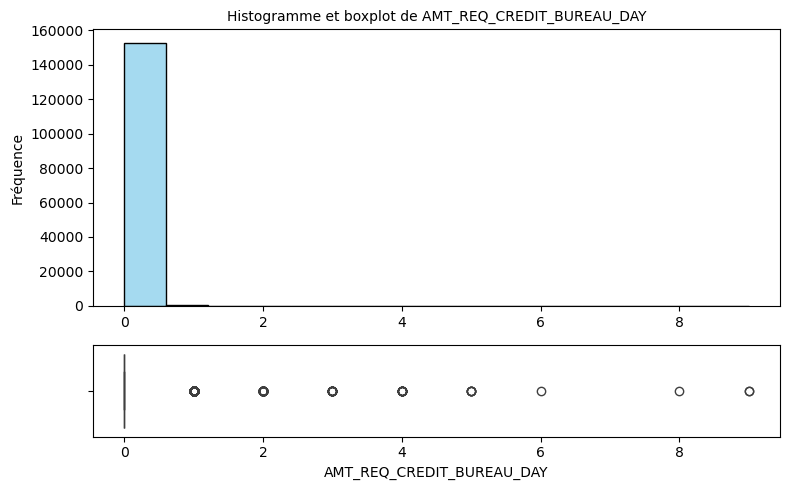

________________________________________

Analyse univariée de AMT_REQ_CREDIT_BUREAU_HOUR : 


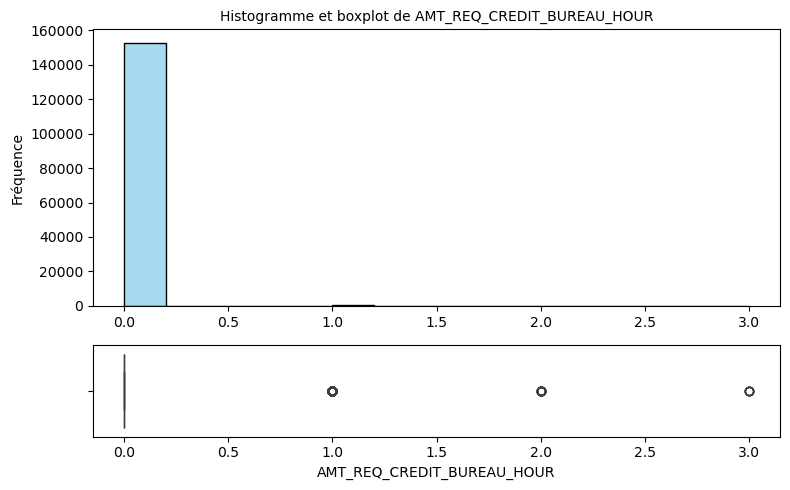

________________________________________

Analyse univariée de AMT_INCOME_TOTAL : 


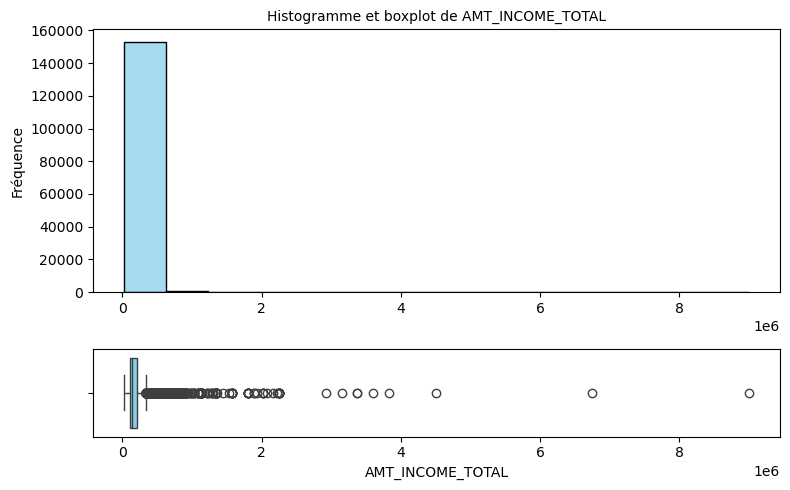

________________________________________

Analyse univariée de AMT_REQ_CREDIT_BUREAU_WEEK : 


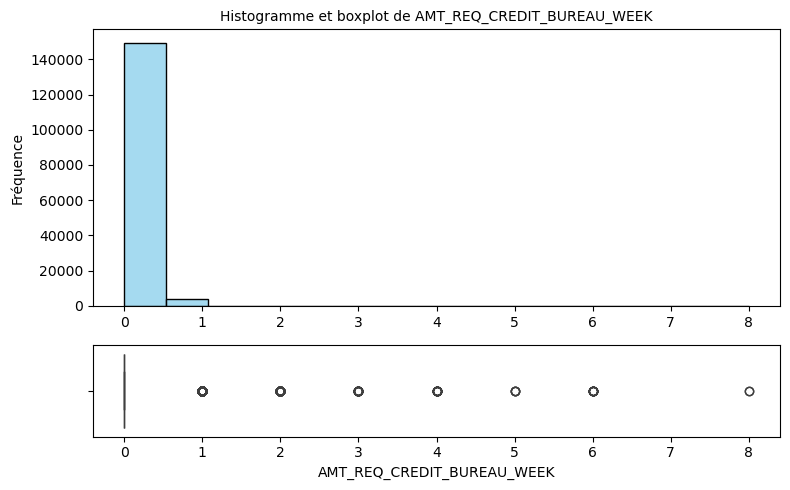

________________________________________

Analyse univariée de AMT_REQ_CREDIT_BUREAU_MON : 


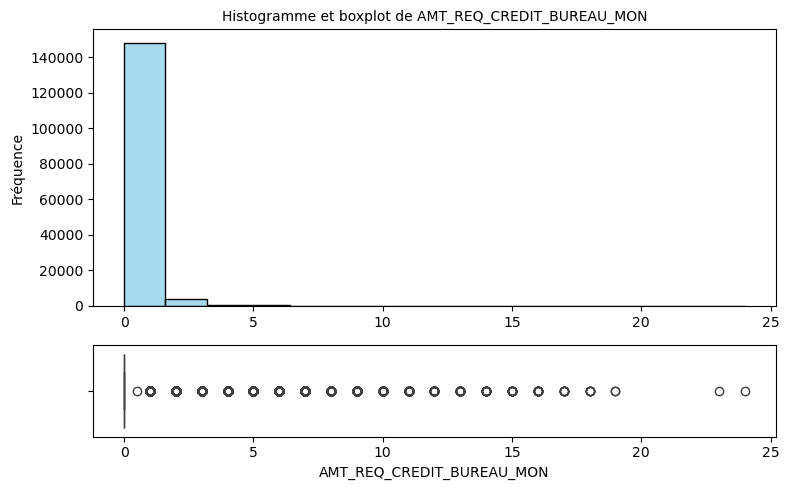

________________________________________

Analyse univariée de DEF_60_CNT_SOCIAL_CIRCLE : 


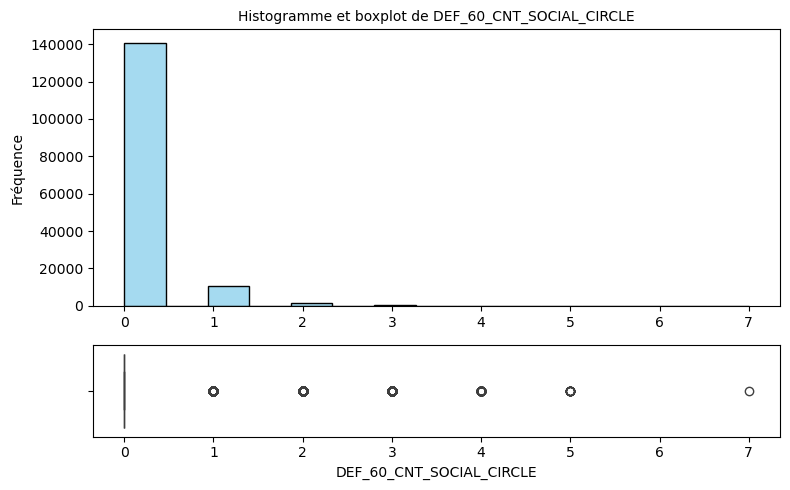

________________________________________

Analyse univariée de DEF_30_CNT_SOCIAL_CIRCLE : 


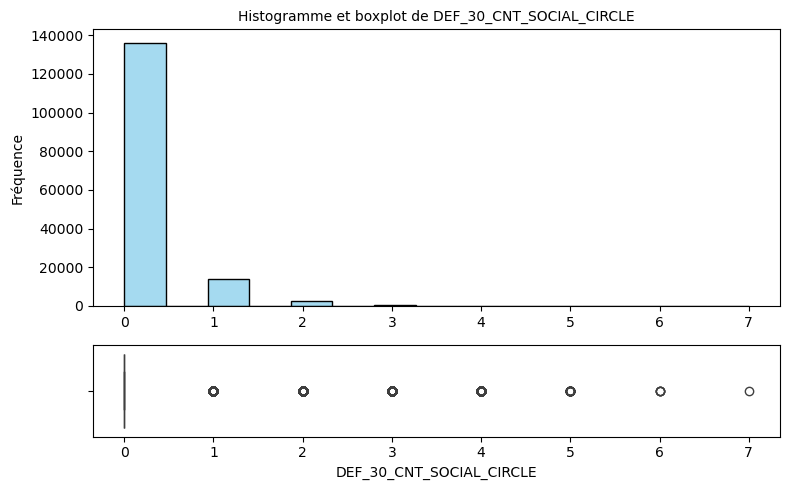

________________________________________

Analyse univariée de AMT_REQ_CREDIT_BUREAU_QRT : 


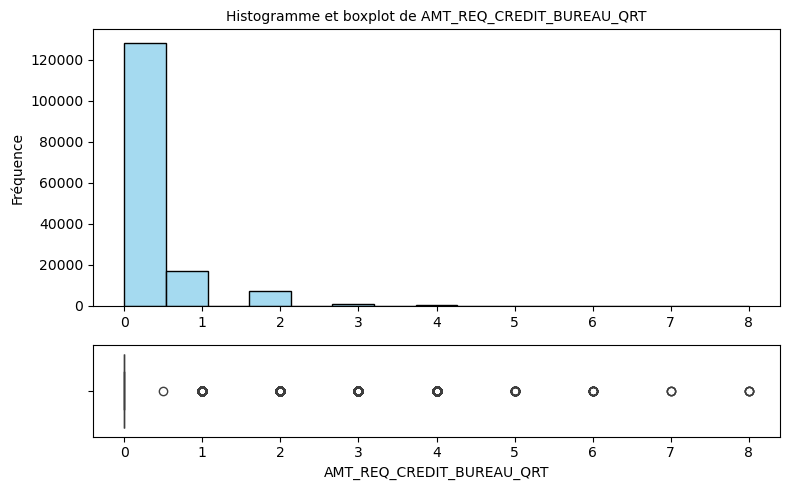

________________________________________

Analyse univariée de OBS_60_CNT_SOCIAL_CIRCLE : 


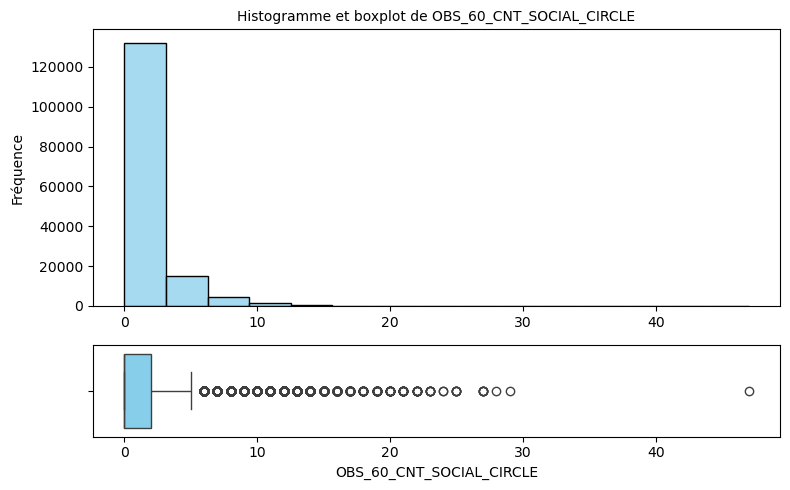

________________________________________

Analyse univariée de OBS_30_CNT_SOCIAL_CIRCLE : 


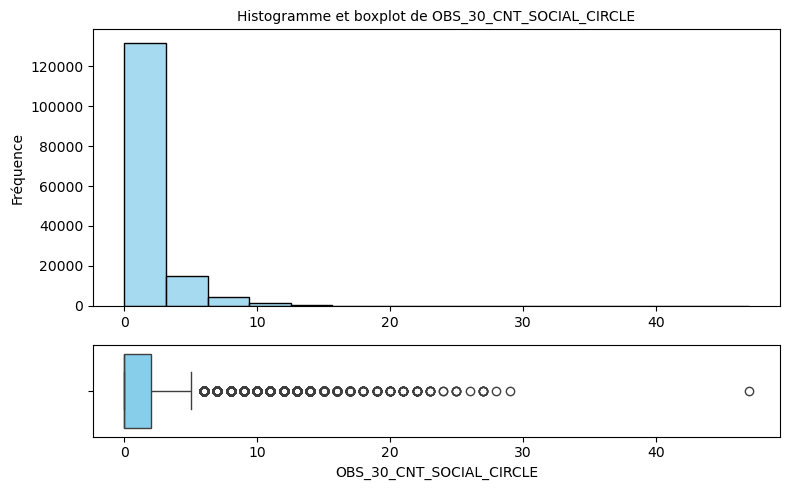

________________________________________

Analyse univariée de DAYS_EMPLOYED : 


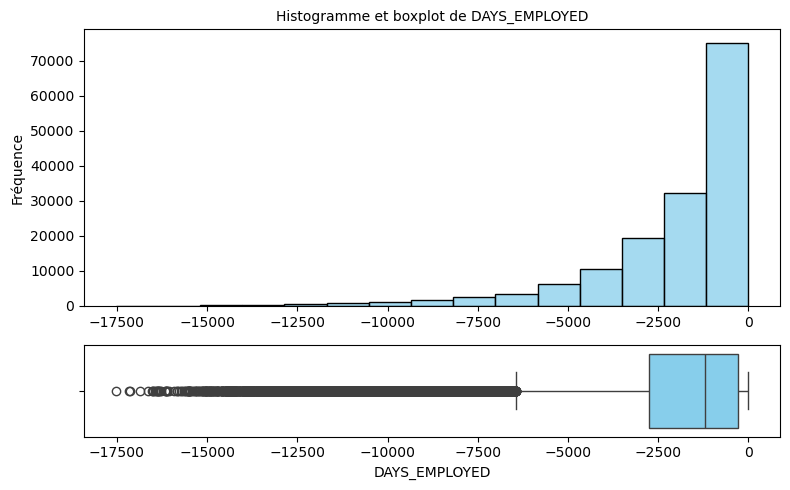

________________________________________


In [39]:
# Affichage de ces features
analyze_numeric_features(df_imputed[skewed_features])

Application d'une transformation logarithmique afin d'homogénéiser leur distribution :

In [40]:
# Transformation logarithmique en utilisant np.log1p pour éviter les valeurs nulles
df_imputed[skewed_features] = np.log1p(abs(df_imputed[skewed_features]))


Analyse univariée de AMT_REQ_CREDIT_BUREAU_DAY : 


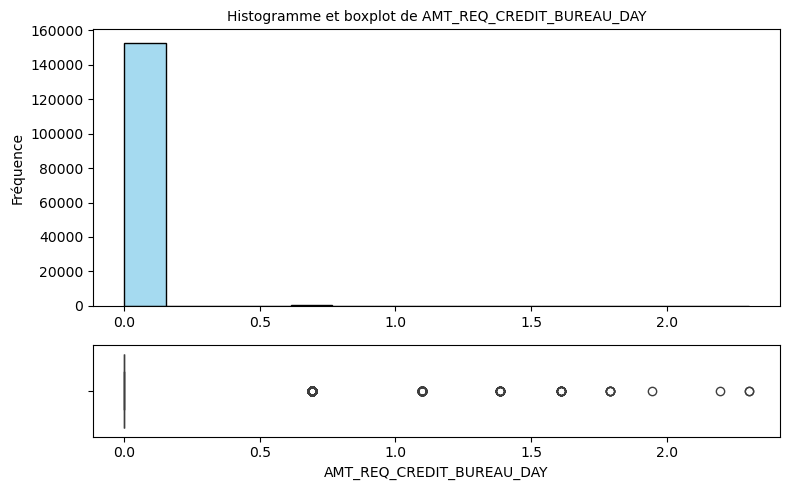

________________________________________

Analyse univariée de AMT_REQ_CREDIT_BUREAU_HOUR : 


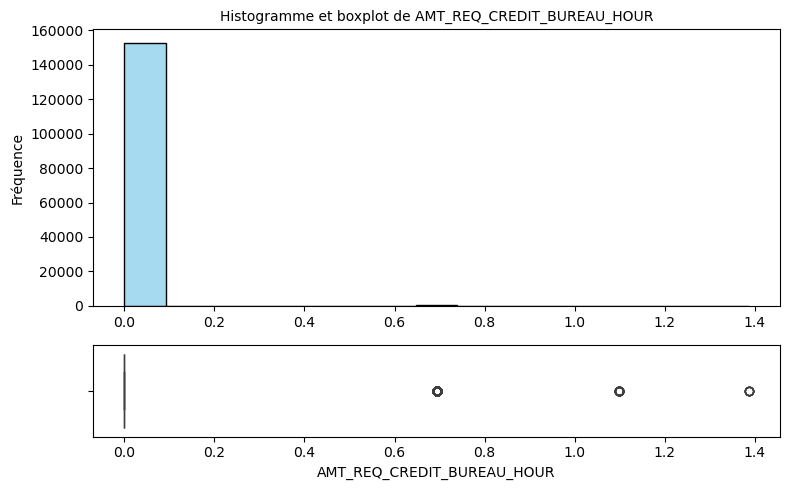

________________________________________

Analyse univariée de AMT_INCOME_TOTAL : 


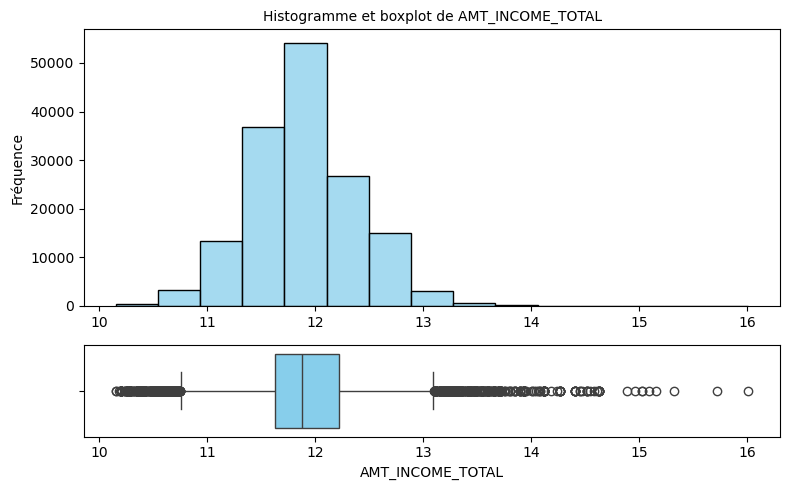

________________________________________

Analyse univariée de AMT_REQ_CREDIT_BUREAU_WEEK : 


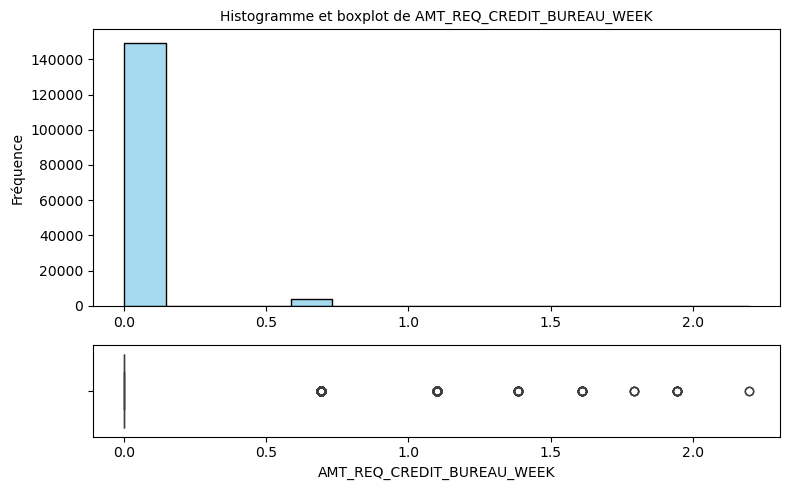

________________________________________

Analyse univariée de AMT_REQ_CREDIT_BUREAU_MON : 


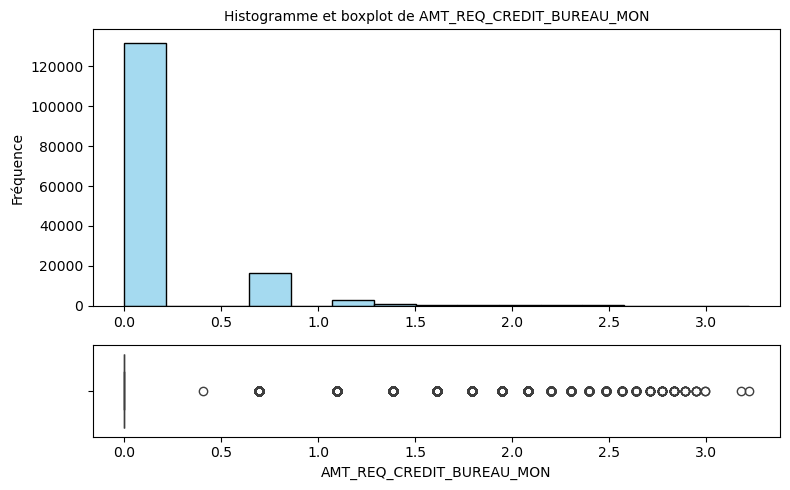

________________________________________

Analyse univariée de DEF_60_CNT_SOCIAL_CIRCLE : 


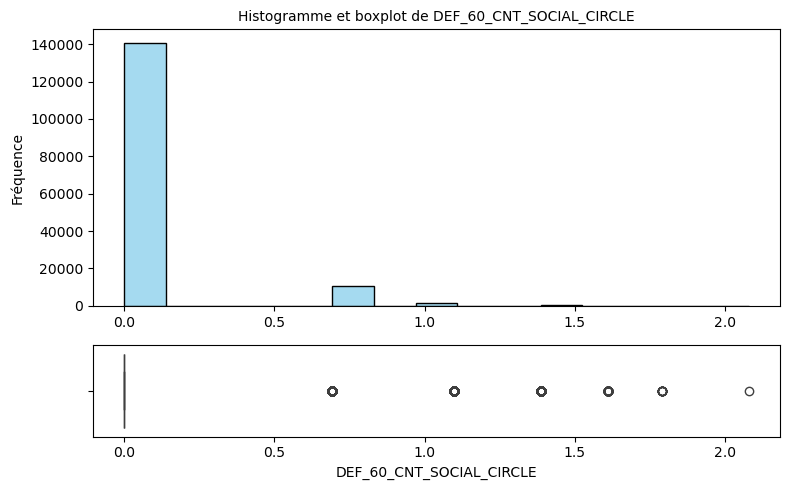

________________________________________

Analyse univariée de DEF_30_CNT_SOCIAL_CIRCLE : 


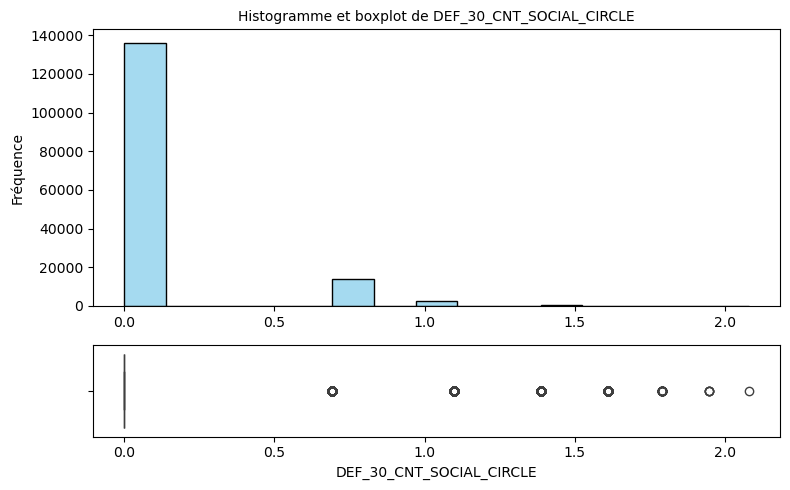

________________________________________

Analyse univariée de AMT_REQ_CREDIT_BUREAU_QRT : 


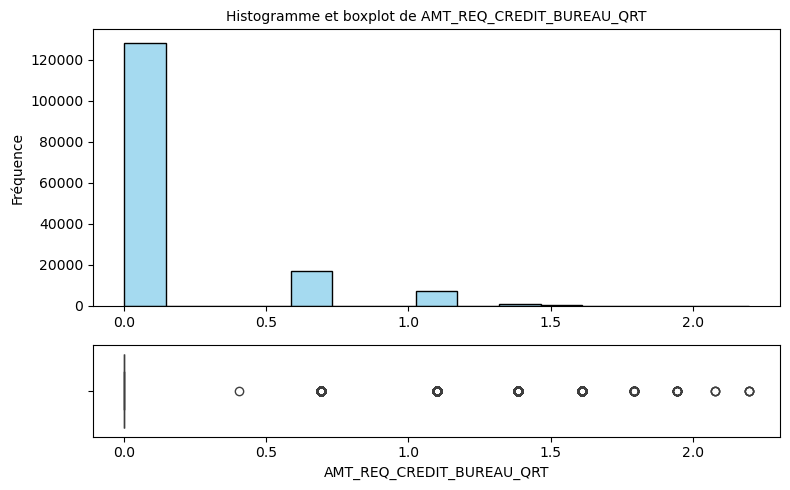

________________________________________

Analyse univariée de OBS_60_CNT_SOCIAL_CIRCLE : 


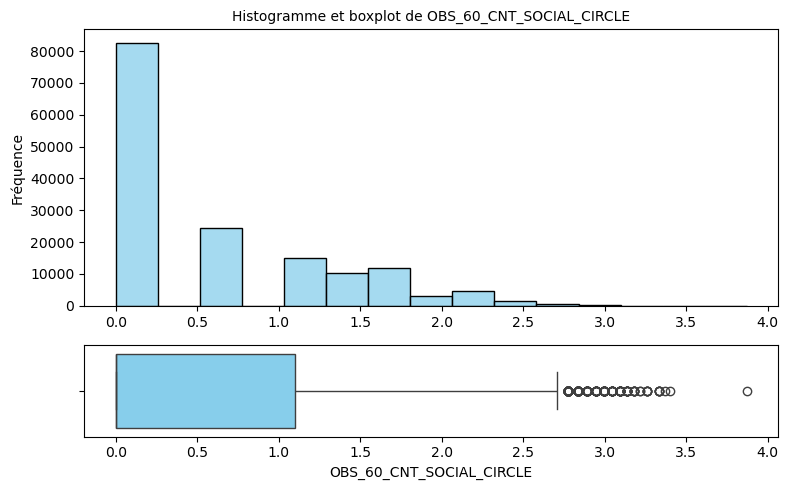

________________________________________

Analyse univariée de OBS_30_CNT_SOCIAL_CIRCLE : 


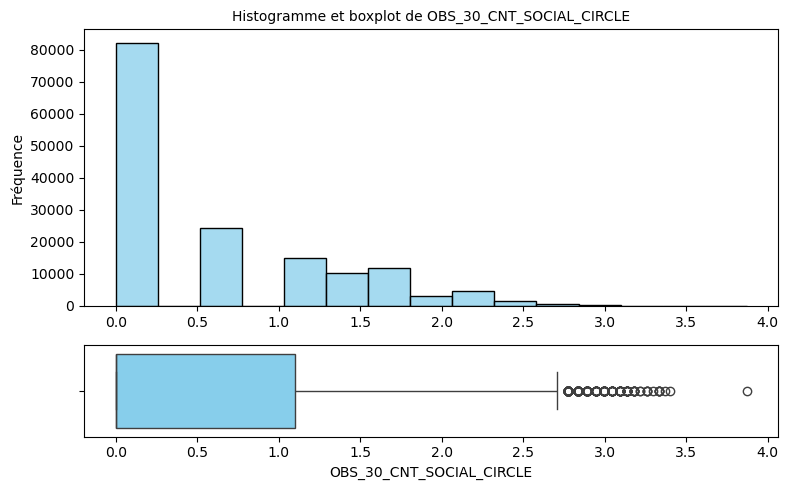

________________________________________

Analyse univariée de DAYS_EMPLOYED : 


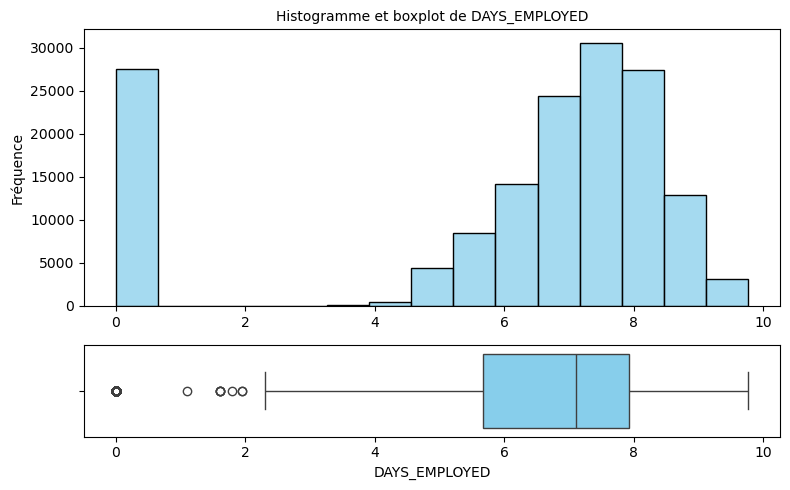

________________________________________


In [41]:
# Vérification
analyze_numeric_features(df_imputed[skewed_features])

La distribution de ces variables est maintenant plus homogène.

##### Séparation de la variable cible des variables prédictives

In [42]:
y = df_imputed['TARGET']
X = df_imputed.drop(columns=['SK_ID_CURR', 'TARGET'])

##### Standardisation des variables numériques

In [43]:
scaler = StandardScaler()
X_num = X[numerical_features[2:]]
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns)

In [44]:
# Vérification
X_num_scaled.describe().loc[['mean','std','min','max']].round(1)

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
mean           0.0              -0.0        -0.0         -0.0   
std            1.0               1.0         1.0          1.0   
min           -0.6              -3.6        -1.4         -1.7   
max           16.1               8.4         8.6         15.8   

      AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
mean             -0.0                        -0.0        -0.0           -0.0   
std               1.0                         1.0         1.0            1.0   
min              -1.3                        -1.5        -2.1           -2.0   
max               9.5                         3.7         1.9            1.3   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
mean               -0.0             -0.0        -0.0            -0.0   
std                 1.0              1.0         1.0             1.0   
min                -5.0             -2.8      -392.1            -2.1   
max                 1.4              2.0         0.0             0.5   

      FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
mean             -0.0               0.0         0.0        -0.0   
std               1.0               1.0         1.0         1.0   
min              -0.5             -22.3        -0.6        -0.2   
max               2.0               0.0         1.6         4.1   

      CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
mean              0.0                   0.0                          0.0   
std               1.0                   1.0                          1.0   
min              -1.3                  -2.1                         -2.1   
max              13.0                   1.9                          1.9   

      HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
mean                     -0.0                        -0.0   
std                       1.0                         1.0   
min                      -3.7                        -0.1   
max                       3.4                         8.1   

      REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
mean                         0.0                          0.0   
std                          1.0                          1.0   
min                         -0.2                         -0.2   
max                          4.3                          4.9   

      REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
mean                     0.0                    -0.0                      0.0   
std                      1.0                     1.0                      1.0   
min                     -0.3                    -0.5                     -0.5   
max                      3.4                     1.8                      2.1   

      EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
mean          -0.0          -0.0                       0.0   
std            1.0           1.0                       1.0   
min           -2.7          -2.9                      -0.8   
max            1.8           2.2                       4.6   

      DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
mean                      -0.0                       0.0   
std                        1.0                       1.0   
min                       -0.3                      -0.8   
max                        7.7                       4.6   

      DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
mean                       0.0                    -0.0              0.0   
std                        1.0                     1.0              1.0   
min                       -0.3                    -3.9             -0.0   
max                        9.3                     1.2            160.1   

      FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
mean             -0.0             -0.0             -0.0              0.0   
std               1.0  

##### Encodage des variables catégorielles

In [45]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
X_cat = X[categorical_features]
X_cat_encoded = one_hot_encoder.fit_transform(X_cat)
X_cat_encoded = pd.DataFrame(X_cat_encoded, columns=one_hot_encoder.get_feature_names_out())

In [46]:
# Vérification
X_cat_encoded

NAME_CONTRACT_TYPE_Cash loans  NAME_CONTRACT_TYPE_Revolving loans  \
0                                 1.0                                 0.0   
1                                 1.0                                 0.0   
2                                 0.0                                 1.0   
3                                 1.0                                 0.0   
4                                 1.0                                 0.0   
...                               ...                                 ...   
153748                            1.0                                 0.0   
153749                            1.0                                 0.0   
153750                            1.0                                 0.0   
153751                            0.0                                 1.0   
153752                            1.0                                 0.0   

        CODE_GENDER_F  CODE_GENDER_M  CODE_GENDER_XNA  FLAG_OWN_CAR_N  \
0                 0.0            1.0              0.0             1.0   
1                 1.0            0.0              0.0             1.0   
2                 0.0            1.0              0.0             0.0   
3                 1.0            0.0              0.0             1.0   
4                 0.0            1.0              0.0             1.0   
...               ...            ...              ...             ...   
153748            1.0            0.0              0.0             1.0   
153749            1.0            0.0              0.0             1.0   
153750            1.0            0.0              0.0             1.0   
153751            0.0            1.0              0.0             1.0   
153752            1.0            0.0              0.0             1.0   

        FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_N  FLAG_OWN_REALTY_Y  \
0                  0.0                0.0                1.0   
1                  0.0                1.0                0.0   
2                  1.0                0.0                1.0   
3                  0.0                0.0                1.0   
4                  0.0                0.0                1.0   
...                ...                ...                ...   
153748             0.0                0.0                1.0   
153749             0.0                0.0                1.0   
153750             0.0                1.0                0.0   
153751             0.0                1.0                0.0   
153752             0.0                0.0                1.0   

        NAME_TYPE_SUITE_Children  NAME_TYPE_SUITE_Family  \
0                            0.0                     0.0   
1                            0.0                     1.0   
2                            0.0                     0.0   
3                            0.0                     0.0   
4                            0.0                     0.0   
...                          ...                     ...   
153748                       0.0                     0.0   
153749                       0.0                     0.0   
153750                       0.0                     0.0   
153751                       0.0                     0.0   
153752                       0.0                     0.0   

        NAME_TYPE_SUITE_Group of people  NAME_TYPE_SUITE_Other_A  \
0                                   0.0                      0.0   
1                                   0.0                      0.0   
2                                   0.0                      0.0   
3                                   0.0                      0.0   
4                                   0.0                      0.0   
...                                 ...                      ...   
153748                              0.0                      0.0   
153749                              0.0                      0.0   
153750                              0.0                      0.0   
153751                              

In [47]:
# Concaténation avec le DataFrame numérique
X = X_num_scaled.join(X_cat_encoded)
X

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0          -0.579726          0.634992   -0.477530    -0.165155   
1          -0.579726          1.222131    1.724262     0.588830   
2          -0.579726         -1.607188   -1.151786    -1.395780   
3          -0.579726         -0.192533   -0.710679     0.176668   
4          -0.579726         -0.407565   -0.213380    -0.359513   
...              ...               ...         ...          ...   
153748     -0.579726         -0.734812   -0.593211    -0.662464   
153749     -0.579726         -1.235086   -0.012293    -0.124433   
153750     -0.579726         -0.564637   -0.817758    -0.915130   
153751      0.806634         -0.564637   -0.816641    -0.933023   
153752     -0.579726          1.222131   -0.404457     0.060670   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0             -0.506312                   -0.150008    1.502342   
1              1.599111                   -1.253765   -0.169891   
2             -1.090476                   -0.784271   -0.692121   
3             -0.652353                   -0.929871   -0.682734   
4             -0.068189                    0.563311   -0.894969   
...                 ...                         ...         ...   
153748        -0.481972                   -0.408950   -0.977390   
153749         0.150872                   -0.408950   -0.481718   
153750        -0.847074                    0.714625    1.304532   
153751        -0.725373                   -0.146464    0.803136   
153752        -0.481972                    1.833210    1.133966   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0            0.158048           0.377728         0.578343     0.00255   
1            0.368337           1.075990         1.788739     0.00255   
2           -0.192521           0.204155         0.306352     0.00255   
3            0.685443          -1.376437         0.368559     0.00255   
4            0.685332           0.189690        -0.307118     0.00255   
...               ...                ...              ...         ...   
153748       0.487512           0.624190        -0.342854     0.00255   
153749       1.028088          -0.681294         0.866879     0.00255   
153750       0.574815           0.754370         0.915189     0.00255   
153751       0.834630          -0.448162        -1.322950     0.00255   
153752       0.600200          -0.026709         1.762929     0.00255   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0             0.467617        -0.499801          0.044802    1.602917   
1             0.467617        -0.499801          0.044802    1.602917   
2             0.467617         2.000797          0.044802    1.602917   
3             0.467617        -0.499801          0.044802   -0.623863   
4             0.467617        -0.499801          0.044802   -0.623863   
...                ...              ...               ...         ...   
153748        0.467617        -0.499801          0.044802   -0.623863   
153749        0.467617         2.000797          0.044802    1.602917   
153750        0.467617         2.000797          0.044802   -0.623863   
153751        0.467617        -0.499801          0.044802   -0.623863   
153752        0.467617        -0.499801          0.044802   -0.623863   

        FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        -0.244949        -1.269233             -0.105044   
1        -0.244949        -0.170740             -2.065329   
2        -0.244949        -1.269233             -0.105044   
3        -0.244949        -0.170740             -0.105044   
4        -0.244949        -1.269233             -0.105044   
...            ...              ...                   ...   
153748   -0.244949        -0.170740             -0.105044   
153749   -0.244949        -0.170740             -0.105044   
153750    4.082483        -0.170740             -0.105044   
153751   -0.244949         0.92775

### Séparation des données en deux ensembles : entraînement et test

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

### Equilibrage des classes

Nous avons vu plus tôt que les classes de la variable `TARGET` sont représentées de manière inégale dans le jeu de données :

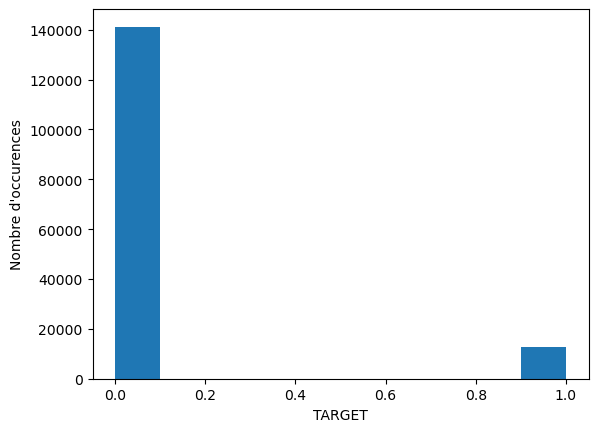

Nous allons donc équilibrer ces classes pour l'ensemble de données d'entraînement afin d'éviter les problèmes liés à ce déséquilibre. Pour cela, nous allons effectuer un sous-échantillonnage de la classe majoritaire, c'est-à-dire une réduction du nombre d'observations de la classe majoritaire.

Une autre technique serait d'effectuer un sur-échantillonnage de la classe minoritaire avec SMOTE, c'est-à-dire augmentation du nombre d'observations de la classe minoritaire de manière synthétique. Cependant, dans le cadre de ce projet, le suréchantillonnage avec SMOTE ne semble pas pertinent, car la classe minoritaire est déjà assez grande, avec un total de 12540 observations. Ce nombre semble suffisant pour entraîner et tester efficacement des modèles de machine learning. Nous n'allons donc pas utiliser cette seconde technique car elle risquerait de créer un problème d'overfitting.

In [49]:
# Sous-échantillonnage de la classe majoritaire
under_sampler = RandomUnderSampler(sampling_strategy=1, random_state=42)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)

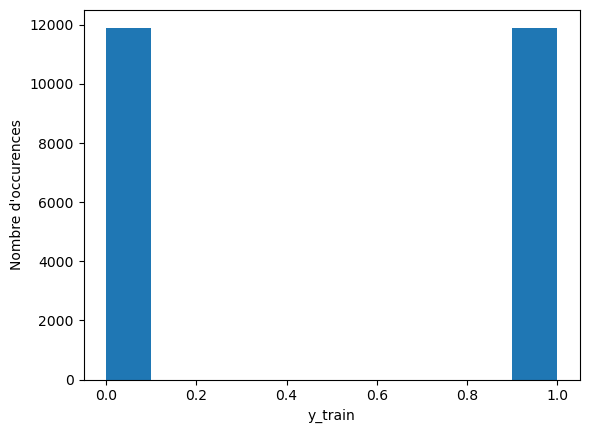

In [50]:
# Afficher l'histogramme de y_train
y_train.astype(int).plot.hist()
plt.xlabel('y_train')
plt.ylabel("Nombre d'occurences")
plt.show()

In [51]:
# Vérifier les dimensions
print(f"Dimensions de X_train : {X_train.shape}")
print(f"Dimensions de X_test : {X_test.shape}")

Dimensions de X_train : (23810, 185)
Dimensions de X_test : (7688, 185)


## Modélisation

L’objectif principal de ce projet est de développer un modèle de scoring de crédit capable de prédire la probabilité de défaut de paiement d’un client. Ce problème relève de la classification binaire, où l'on cherche à attribuer à chaque client un score indiquant la probabilité qu'il ne rembourse pas son emprunt.

Pour atteindre cet objectif, le modèle mis en place doit être capable de :

1. Faire des prédictions correctes, mesurées par une métrique de performance choisie en amont.
2. Généraliser à de nouveaux échantillons, c’est-à-dire fournir des prédictions correctes sur des nouvelles données.

Dans cette section, plusieurs algorithmes de machine learning sont testés et optimisés à l'aide de la recherche en grille combinée à la validation croisée. En effet, pour chaque combinaison d'hyperparamètres proposée, le jeu de données est divisé en plusieurs sous-ensembles (ou "folds"), et le modèle est évalué de manière répétée sur différents sous-ensembles. Cette méthode permet d'assurer que l’évaluation des performances est fiable et ne dépend pas d'un unique découpage des données. Ainsi, en explorant différentes combinaisons d'hyperparamètres, nous identifierons celles qui maximisent les performances des modèles tout en garantissant une bonne généralisation.


### Définition du score métier

Nous souhaitons créer un modèle de machine learning qui permet de prédire la capacité des clients à rembourser un prêt. Dans ce contexte, il faut savoir qu'il existe deux types d'erreurs de prédiction :

- **Les faux négatifs** : Ce sont des situations où le modèle a prédit qu'un client était capable de rembourser son prêt, mais en réalité, ce client ne l’a pas fait et a fait faillite. Pour la banque, ces erreurs sont coûteuses car elles représentent des pertes d'argent.

- **Les faux positifs** : Ce sont des situations où le modèle a prédit qu'un client ne serait pas capable de rembourser son prêt, alors qu’en réalité, ce client a pu rembourser entièrement son crédit. Bien que ces erreurs signifient que des clients potentiellement solvables se voient refuser un prêt, elles ont un coût moindre par rapport aux faux négatifs.

Pour une institution financière, il est généralement plus coûteux de subir des pertes dues aux faux négatifs (clients qui font faillite malgré une prédiction de solvabilité) que de perdre des opportunités avec des faux positifs (clients potentiellement bons qui sont refusés à tort). Donc, la priorité est de réduire le nombre de faux négatifs, même si cela implique d’accepter un nombre plus élevé de faux positifs.

Pour atteindre cet objectif, nous allons concevoir un score métier qui attribue un poids plus important aux faux négatifs. Ce score sera utilisé lors de l'entraînement du modèle afin de limiter le nombre de faux négatifs et, par conséquent, de réduire le coût lié aux erreurs de prédiction du modèle.

In [52]:
# Définition des coûts des faux positifs et des faux négatifs
cost_fp = 1  # Coût d'un faux positif
cost_fn = 10  # Coût d'un faux négatif

# Fonction pour calculer le score métier
def business_score(y_true, y_pred):
    """
    Calcule le score métier en utilisant une matrice de confusion.

    Ce score est basé sur les coûts associés aux faux positifs (FP) et aux faux négatifs (FN).
    La fonction renvoie un score négatif car BayesSearchCV cherche à maximiser la fonction de score.

    Paramètres :
        y_true (array-like) : Valeurs réelles des classes.
        y_pred (array-like) : Valeurs prédites des classes.

    Retour :
        float : Score négatif basé sur les coûts des FP et FN.
    """
    # Calcul de la matrice de confusion et extraction des valeurs TN, FP, FN, TP
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Calcul du score en tenant compte des coûts des faux positifs et des faux négatifs
    score = -((cost_fp * fp + cost_fn * fn) / len(y_true))
    
    # Retourne le score métier
    return score

# Utilisation de make_scorer pour envelopper la fonction de score personnalisée
custom_scorer = make_scorer(business_score)

### Entraînement des modèles
#### Fonction : Optimisation des hyperparamètres

Afin d'identifier les hyperparamètres permettant de maximiser les performances des modèles, nous allons utiliser **BayesSearchCV** qui est une méthode basée sur l'optimisation bayésienne. Contrairement à la recherche en grille, qui teste systématiquement toutes les combinaisons possibles, BayesSearchCV explore l'espace des hyperparamètres de manière plus intelligente. Cette méthode utilise les résultats des essais précédents pour ajuster les combinaisons à tester, ce qui permet de converger plus rapidement vers les hyperparamètres optimaux.

In [54]:
def optimize_model(model, param_grid, X_train, y_train, search_method='bayes'):
    """
    Recherche les meilleurs hyperparamètres d'un modèle en utilisant une méthode de recherche spécifiée 
    (BayesSearchCV ou RandomizedSearchCV), puis entraîne le modèle avec les meilleurs hyperparamètres trouvés.

    Paramètres :
    model : estimator
        Le modèle que l'on souhaite entraîner (par exemple, LogisticRegression, RandomForestClassifier, etc.).
    
    param_grid : dict
        La grille d'hyperparamètres à optimiser. Utilisée avec la méthode de recherche spécifiée.
    
    X_train : array-like
        Les variables (features) des données d'entraînement.
    
    y_train : array-like
        Les étiquettes (labels) des données d'entraînement.
    
    search_method : str, optional, default='bayes'
        La méthode de recherche pour optimiser les hyperparamètres. Peut être 'bayes' pour BayesSearchCV ou 'randomized' 
        pour RandomizedSearchCV.

    Retour :
    model : estimator
        Le modèle entraîné et optimisé avec les meilleurs hyperparamètres.
    """
    if search_method == 'bayes':
        search = BayesSearchCV(
            model, 
            param_grid, 
            n_iter=10, 
            cv=5, 
            scoring={'accuracy': 'accuracy', 'custom_scorer': custom_scorer},
            refit='accuracy',
            random_state=42
        )
    elif search_method == 'randomized':
        search = RandomizedSearchCV(
            model, 
            param_grid, 
            n_iter=10, 
            cv=5, 
            scoring={'accuracy': 'accuracy', 'custom_scorer': custom_scorer},
            refit='accuracy',
            random_state=42
        )
    else:
        print(f"Erreur : '{search_method}' n'est pas une méthode de recherche valide. Veuillez choisir 'bayes' ou 'randomized'.")
        return None
    
    # Entraînement du modèle en utilisant la méthode de recherche spécifiée
    search_result = search.fit(X_train, y_train)
    
    # Affichage des résultats de l'optimisation
    print(f"\033[1mRésultats de {search_method.capitalize()}SearchCV :\033[0m")
    print(f"Meilleurs hyperparamètres : {search_result.best_params_}")
    print(f"Meilleur accuracy : {search_result.best_score_.round(3)}")
    
    # Réentraînement du modèle avec les meilleurs hyperparamètres trouvés
    model = search_result.best_estimator_.fit(X_train, y_train)
    
    # Retourne le modèle optimisé et les métriques associées
    return model

#### Dummy Classifier
Ce modèle très simple sert de point de départ en fournissant un score de référence (baseline). Il ne cherche pas à capturer des patterns dans les données, mais génère des prédictions triviales. L'objectif est de comparer ses performances minimales avec celles des modèles plus complexes afin de mesurer l'amélioration apportée par ces derniers.

In [55]:
warnings.filterwarnings("ignore", category=UserWarning)

In [56]:
# Grille de paramètres à tester
param_grid = {
    'strategy': ['most_frequent', 'prior', 'stratified', 'uniform'] # Stratégie utilisée pour générer des prédictions
}

# Recherche des meilleurs hyparamètres et entraînement du modèle
dum_model = optimize_model(
    DummyClassifier(random_state=42),
    param_grid,
    X_train,
    y_train
)

Résultats de BayesSearchCV :
Meilleurs hyperparamètres : OrderedDict([('strategy', 'stratified')])
Meilleur accuracy : 0.528


#### Modèles linéaires
##### Régression logistique

La régression logistique est un modèle de classification utilisé pour prédire la probabilité qu'une observation appartienne à l'une des deux classes possibles. Contrairement à la régression linéaire, elle modélise une variable cible binaire en transformant la sortie de la combinaison linéaire des caractéristiques à l'aide d'une fonction sigmoïde, aussi appelée fonction logistique.

La fonction sigmoïde prend une valeur quelconque en entrée et la convertit en une probabilité, comprise entre 0 et 1. Si la probabilité est supérieure à un seuil (souvent 0,5), le modèle attribue l'observation à la classe positive, sinon à la classe négative.

Ce modèle est rapide à entraîner, facilement interprétable, et performant dans des cas où les classes sont linéairement séparables.

In [57]:
# Grille de paramètres à tester
param_grid = {
    'penalty': ['l2', None], # Méthode de régularisation
    'C': [0.01, 0.1, 1.0, 10.0, 100], # Paramètre de régularisation
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag'], # Algorithme d'optimisation des paramètres du modèle
    'max_iter': [50, 100, 300, 500, 1000] # Nombre d'itérations maximum
}

# Recherche des meilleurs hyparamètres et entraînement du modèle
lr_model = optimize_model(
    LogisticRegression(random_state=42),                       
    param_grid,                   
    X_train,                     
    y_train
)

Résultats de BayesSearchCV :
Meilleurs hyperparamètres : OrderedDict([('C', 100), ('max_iter', 50), ('penalty', None), ('solver', 'sag')])
Meilleur accuracy : 0.669


##### SVM linéaire

Le SVM (Support Vector Machine) linéaire est un modèle de classification qui cherche à trouver l'hyperplan optimal séparant les différentes classes dans un espace de caractéristiques. Cet hyperplan est choisi de manière à maximiser la marge, c'est-à-dire la distance entre les points de données les plus proches des deux classes, appelés vecteurs de support. Ce modèle est particulièrement utile lorsque les données sont bien séparables dans un espace linéaire.

In [58]:
# Grille de paramètres à tester
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], # Paramètre de régularisation
    'tol': [1e-4, 1e-3, 1e-2], # Tolérance pour le critère d'arrêt
    'max_iter': [1000, 5000, 10000] # Nombre d'itérations maximum
}

# Recherche des meilleurs hyparamètres et entraînement du modèle
svm_model = optimize_model(
    SVC(kernel="linear", probability=True, random_state=42),                       
    param_grid,                   
    X_train,                     
    y_train
)

Résultats de BayesSearchCV :
Meilleurs hyperparamètres : OrderedDict([('C', 0.01), ('max_iter', 10000), ('tol', 0.01)])
Meilleur accuracy : 0.672


#### Modèles non linéaires
##### K-Nearest Neighbors

Le K-Nearest Neighbors (KNN) est un modèle de classification basé sur le principe de la similarité des observations. Lorsqu'une nouvelle observation doit être classifiée, le modèle examine les K plus proches voisins de cette observation dans l'espace des caractéristiques, en fonction d'une mesure de distance (comme la distance Euclidienne). La classe prédite est déterminée à partir de la classe majoritaire parmi les K voisins les plus proches. 

Ce modèle est simple à mettre en oeuvre car il n'exige pas de phase d'entraînement. Toutefois, il peut devenir lent pour des ensembles de données très grands, car il nécessite de calculer les distances pour chaque observation lors de la classification. 

In [59]:
# Grille de paramètres à tester
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11], # Nombre de voisins (k)
    'weights': ['uniform', 'distance'], # Poids des voisins
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], # Algorithme utilisé pour calculer les plus proches voisins
    'metric': ['euclidean', 'manhattan', 'minkowski'], # Distance utilisée
    'p': [1, 2] # Paramètre p pour la distance Minkowski (1=manhattan, 2=euclidean)
}

# Recherche des meilleurs hyparamètres et entraînement du modèle
knn_model = optimize_model(
    KNeighborsClassifier(),                       
    param_grid,                   
    X_train,                     
    y_train
)

Résultats de BayesSearchCV :
Meilleurs hyperparamètres : OrderedDict([('algorithm', 'ball_tree'), ('metric', 'minkowski'), ('n_neighbors', 11), ('p', 1), ('weights', 'distance')])
Meilleur accuracy : 0.621


##### SVM à noyau

Le SVM à noyau est une extension du modèle SVM linéaire, qui permet de traiter des problèmes de classification non linéaires. Contrairement au SVM linéaire qui cherche à trouver un hyperplan séparant les classes dans l'espace des caractéristiques d'origine, le SVM à noyau utilise une fonction pour projeter les données dans un espace de dimension plus élevée. Cela permet au modèle de capturer des frontières de décision plus complexes.

Ce modèle est particulièrement efficace pour les problèmes où les classes ne sont pas linéairement séparables, en particulier lorsque le jeu de données est complexe et à haute dimension.

In [60]:
# Grille de paramètres à tester
param_grid = {
    'kernel': ['poly', 'rbf'], # Type de noyau utilisé
    'C': [0.01, 0.1, 1, 10, 100], # Paramètre de régularisation
    'tol': [1e-4, 1e-3, 1e-2], # Tolérance pour le critère d'arrêt
    'max_iter': [1000, 5000, 10000] # Nombre d'itérations maximum
}

# Recherche des meilleurs hyparamètres et entraînement du modèle
svmn_model = optimize_model(
    SVC(probability=True, random_state=42),                       
    param_grid,                   
    X_train,                     
    y_train
)

Résultats de BayesSearchCV :
Meilleurs hyperparamètres : OrderedDict([('C', 1), ('kernel', 'rbf'), ('max_iter', 1000), ('tol', 0.001)])
Meilleur accuracy : 0.656


#### Modèles ensemblistes
##### Random Forest

Le Random Forest est un algorithme d'apprentissage ensembliste à base d'arbres de décision. Il effectue un apprentissage sur de multiples arbres de décision entraînés sur des sous-échantillons de données légèrement différents. La prédiction finale est obtenue en combinant les résultats des différents arbres. Pour les problèmes de classification, chaque arbre vote pour une classe et la classe ayant le plus de votes est choisie comme prédiction finale.

C'est un modèle intéressant pour capturer les interactions complexes entre les variables et pour éviter le surapprentissage grâce à l'agrégation des résultats de plusieurs arbres.

In [61]:
# Grille de paramètres à tester
param_grid = {
    'n_estimators': [15, 30, 50, 70, 100], # Nombre d'arbres dans le modèle
    'max_depth': [3, 6, 9], # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10, 20], # Nombre minimum d'observations requis pour diviser un noeud
    'min_samples_leaf': [1, 2, 4, 10], # Nombre minimum d'observations dans une feuille terminale
    'max_features': ['sqrt', 'log2', None], # Nombre maximum de caractéristiques à considérer pour chaque arbre
    'max_samples': [0.5, 0.75, 1.0], # Proportion d'observations à utiliser pour entraîner chaque arbre
}

# Recherche des meilleurs hyparamètres et entraînement du modèle
rf_model = optimize_model(
    RandomForestClassifier(random_state=42),                       
    param_grid,                   
    X_train,                     
    y_train
)

Résultats de BayesSearchCV :
Meilleurs hyperparamètres : OrderedDict([('max_depth', 9), ('max_features', 'sqrt'), ('max_samples', 0.75), ('min_samples_leaf', 10), ('min_samples_split', 10), ('n_estimators', 15)])
Meilleur accuracy : 0.664


##### Gradient Boosting

Le Gradient Boosting est un autre algorithme d'apprentissage ensembliste à base d'arbres de décision. Ce modèle entraîne plusieurs arbres de décision de manière séquentielle, chaque arbre se consentrant sur les erreurs de l’arbre précédent. Cette approche itérative permet d'améliorer progressivement la performance du modèle.

Ce modèle peut être très performant, mais plus sensible au surapprentissage si mal paramétré.

In [62]:
# Grille de paramètres à tester
param_grid = {
    'loss': ['log_loss', 'exponential'], # Fonction de perte à minimiser
    'learning_rate': [0.001, 0.01, 0.1], # Taux d'apprentissage
    'n_estimators': [15, 30, 50, 70, 100], # Nombre d'arbres à construire dans le modèle
    'subsample': [0.5, 0.75, 1.0], # Proportion d'observations à utiliser pour entraîner chaque arbre
    'criterion': ['friedman_mse', 'squared_error'], # Critère pour la division des noeuds
    'max_depth': [3, 6, 9], # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10, 20], # Nombre minimum d'observations requis pour diviser un noeud
    'min_samples_leaf': [1, 2, 4, 10], # Nombre minimum d'observations requis dans une feuille terminale
    'max_features': ['sqrt', 'log2', None] # Nombre maximum de caractéristiques à considérer pour chaque arbre
}

# Recherche des meilleurs hyparamètres et entraînement du modèle
gb_model = optimize_model(
    GradientBoostingClassifier(random_state=42),                       
    param_grid,                   
    X_train,                     
    y_train
)

Résultats de BayesSearchCV :
Meilleurs hyperparamètres : OrderedDict([('criterion', 'friedman_mse'), ('learning_rate', 0.1), ('loss', 'exponential'), ('max_depth', 3), ('max_features', None), ('min_samples_leaf', 2), ('min_samples_split', 5), ('n_estimators', 70), ('subsample', 0.5)])
Meilleur accuracy : 0.666


##### XGBoost
Le XGBoost est une amélioration du Gradient Boosting qui repose sur le même principe d'entraînement séquentiel d'arbres de décision. Ce modèle intègre en plus des techniques de régularisation pour réduire le risque de surapprentissage et optimise l'efficacité en utilisant une exécution parallèle. Cette approche permet de traiter plusieurs arbres simultanément, accélérant ainsi le processus d'entraînement.

In [63]:
# Grille de paramètres à tester
param_grid = {
    'n_estimators': [15, 30, 50, 70, 100], # Nombre d'arbres dans le modèle
    'max_depth': [3, 6, 9], # Profondeur maximale de chaque arbre
    'learning_rate': [0.001, 0.01, 0.1], # Taux d'apprentissage
    'min_child_weight': [1, 5, 10], # Poids minimum total des observations nécessaires pour créer un noeud enfant
    'gamma': [0.5, 1, 1.5, 2, 5], # Pénalité pour la complexité du modèle
    'subsample': [0.5, 0.7, 1.0], # Proportion d'observations à utiliser pour entraîner chaque arbre
    'colsample_bytree': [0.6, 0.8, 1.0], # Proportion de caractéristiques à utiliser pour chaque arbre
}

# Recherche des meilleurs hyparamètres et entraînement du modèle
xgb_model = optimize_model(
    XGBClassifier(random_state=42),                       
    param_grid,                   
    X_train,                     
    y_train
)

Résultats de BayesSearchCV :
Meilleurs hyperparamètres : OrderedDict([('colsample_bytree', 0.6), ('gamma', 5), ('learning_rate', 0.1), ('max_depth', 3), ('min_child_weight', 5), ('n_estimators', 30), ('subsample', 0.5)])
Meilleur accuracy : 0.662


#### Réseaux de neurones
##### Perceptron multicouches

Le Perceptron multicouches (MLP) est un algorithme de classification qui utilise des couches de neurones fully-connected. Chaque neurone dans une couche est connecté à tous les neurones de la couche précédente, permettant au modèle d'apprendre des relations complexes non linéaires à l'aide d'une fonction d'activation. Ce modèle ajuste ses poids en utilisant la rétropropagation pour calculer les gradients de la fonction de perte, et en mettant à jour ces poids via un algorithme d'optimisation (comme Adam) pour minimiser l'erreur de prédiction du modèle. Ce processus itératif permet au modèle d'apprendre les meilleures représentations des données pour la tâche de classification.

In [64]:
# Grille de paramètres à tester
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)], # Nombre et taille des couches cachées
    'activation': ['relu', 'tanh'], # Fonction d'activation utilisée dans les neurones
    'solver': ['adam', 'sgd'], # Algorithme d'optimisation
    'alpha': [0.0001, 0.001, 0.01, 0.1], # Terme de régularisation L2
    'learning_rate_init': [0.001, 0.01, 0.1], # Taux d'apprentissage initial pour la mise à jour des poids
}

# Recherche des meilleurs hyparamètres et entraînement du modèle
mlp_model = optimize_model(
    MLPClassifier(random_state=42),                       
    param_grid,                   
    X_train,                     
    y_train,
    search_method='randomized'
)

Résultats de RandomizedSearchCV :
Meilleurs hyperparamètres : {'solver': 'sgd', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100,), 'alpha': 0.01, 'activation': 'tanh'}
Meilleur accuracy : 0.671


##### Deep Neural Networks

Les Réseaux de Neurones Profonds (DNN) utilisent une architecture similaire à celle des MLP mais plus complexe. C'est un réseau de neurones contenant plusieurs couches cachées (plus de deux), parfois des dizaines voire des centaines, ce qui le rend "profond". Chaque couche permet d'apprendre des représentations de plus en plus complexes des données.

In [65]:
# Fonction pour créer le modèle DNN
def create_model(optimizer='adam', activation='relu', neurons=32):
    """
    Crée un modèle de réseau de neurones profond (DNN) pour une classification binaire.

    Paramètres :
        optimizer (str) : L'optimiseur à utiliser pour la compilation du modèle. Par défaut, 'adam'.
        activation (str) : La fonction d'activation à utiliser dans les couches cachées. Par défaut, 'relu'.
        neurons (int) : Le nombre de neurones dans chaque couche cachée. Par défaut, 32.

    Retour :
        model (Sequential) : Un modèle Keras compilé prêt pour l'entraînement.
    """
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Sortie binaire
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model

In [66]:
# Création du modèle KerasClassifier pour la recherche d'hyperparamètres
model = KerasClassifier(
    model=create_model,
    verbose=0
)

# Définition de la grille des hyperparamètres à tester
param_grid = {
    'model__neurons': [16, 32, 64], # Nombre de neurones dans les couches cachées
    'model__optimizer': ['adam', 'rmsprop'], # Algorithmes d'optimisation
    'model__activation': ['relu', 'tanh'], # Fonctions d'activation des neurones
    'batch_size': [10, 20, 50], # Tailles de lot pour l'entraînement du modèle
    'epochs': [10, 50, 100] # Nombre d'époques pour entraîner le modèle
}

# Recherche des meilleurs hyparamètres et entraînement du modèle
dnn_model = optimize_model(
    model,                       
    param_grid,                   
    X_train,                     
    y_train,
    search_method='randomized'
)

Résultats de RandomizedSearchCV :
Meilleurs hyperparamètres : {'model__optimizer': 'rmsprop', 'model__neurons': 32, 'model__activation': 'tanh', 'epochs': 10, 'batch_size': 20}
Meilleur accuracy : 0.655


### Evaluation des modèles

#### Métriques de performance

In [67]:
def evaluate_model(y_true, y_pred, y_prob):
    """
    Évalue les performances d'un modèle en utilisant plusieurs métriques.

    Paramètres :
        y_true (array-like) : Les valeurs réelles des étiquettes.
        y_pred (array-like) : Les valeurs prédites par le modèle.
        y_prob (array-like) : Les probabilités prédites par le modèle pour les classes positives.

    Retour :
        tuple : Un tuple contenant les scores suivants :
            - business_sc (float): Le score métier calculé avec la fonction `business_score`.
            - accuracy (float): La précision du modèle (accuracy).
            - precision (float): La précision du modèle.
            - recall (float): Le rappel du modèle.
            - f1 (float): Le score F1 du modèle.
            - auc (float): La surface sous la courbe ROC (AUC).
    """
    business_sc = abs(round(business_score(y_test, y_pred), 3))
    accuracy = round(accuracy_score(y_true, y_pred), 3)
    precision = round(precision_score(y_true, y_pred), 3)
    recall = round(recall_score(y_true, y_pred), 3)
    f1 = round(f1_score(y_true, y_pred), 3)
    auc = round(roc_auc_score(y_true, y_prob), 3)
    return business_sc, accuracy, precision, recall, f1, auc

In [68]:
# Définir les modèles dans un dictionnaire
models_dict = {
    'Dummy Classifier': dum_model,
    'Logistic Regression': lr_model,
    'SVM Linéaire': svm_model,
    'K-Nearest Neighbors': knn_model,
    'SVM à noyau': svmn_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model,
    'Perceptron multicouches': mlp_model,
    'Deep Neural Networks': dnn_model
}

# Initialiser le dictionnaire des résultats
results = {}

# Évaluer chaque modèle et stocker les résultats
for name, model in models_dict.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    results[name] = evaluate_model(y_test, y_pred, y_prob)

Affichage des résultats sous forme de tableau :

In [69]:
df_results = pd.DataFrame(results, index=['Score métier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
df_results

Dummy Classifier  Logistic Regression  SVM Linéaire  \
Score métier             0.928                0.583         0.550   
Accuracy                 0.481                0.663         0.684   
Precision                0.062                0.138         0.149   
Recall                   0.407                0.644         0.661   
F1 Score                 0.107                0.227         0.243   
AUC                      0.447                0.719         0.730   

              K-Nearest Neighbors  SVM à noyau  Random Forest  \
Score métier                0.648        0.533          0.525   
Accuracy                    0.551        0.678          0.638   
Precision                   0.114        0.151          0.146   
Recall                      0.712        0.695          0.763   
F1 Score                    0.196        0.248          0.245   
AUC                         0.660        0.734          0.737   

              Gradient Boosting  XGBoost  Perceptron multicouches  \
Score métier              0.570    0.584                    0.567   
Accuracy                  0.653    0.650                    0.667   
Precision                 0.139    0.135                    0.142   
Recall                    0.678    0.661                    0.661   
F1 Score                  0.231    0.225                    0.234   
AUC                       0.719    0.715                    0.724   

              Deep Neural Networks  
Score métier                 0.570  
Accuracy                     0.711  
Precision                    0.150  
Recall                       0.593  
F1 Score                     0.240  
AUC                          0.721

Affichage des résultats sous forme de graphique en barres :

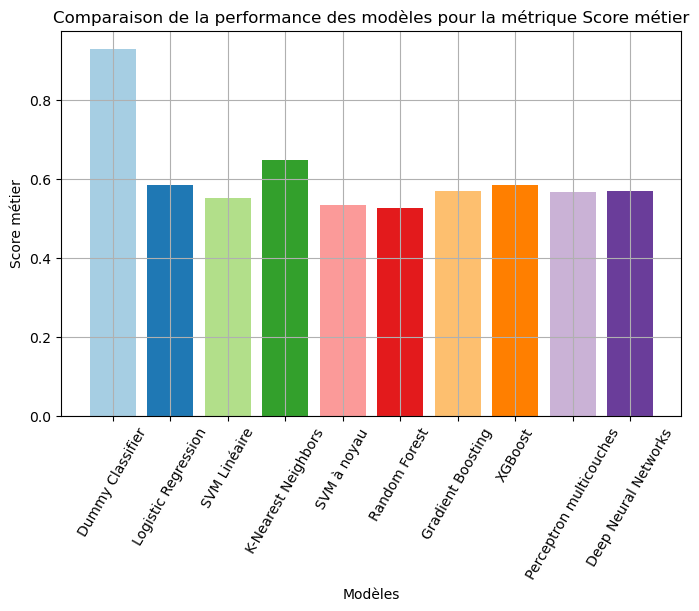

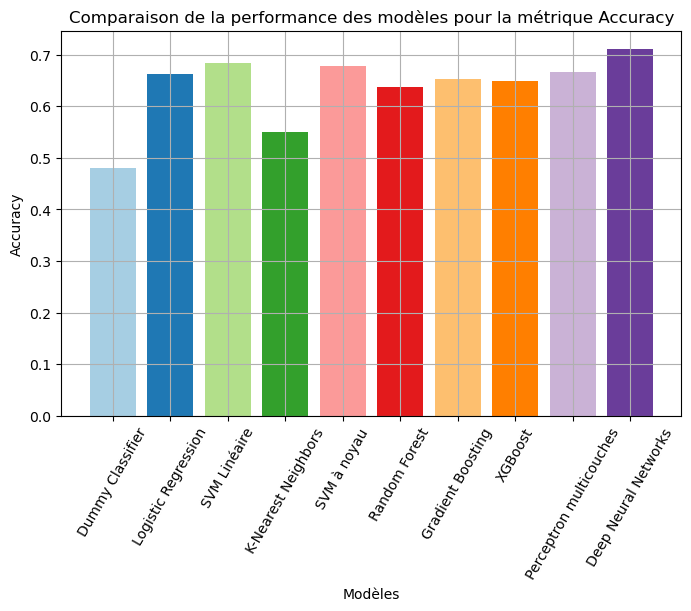

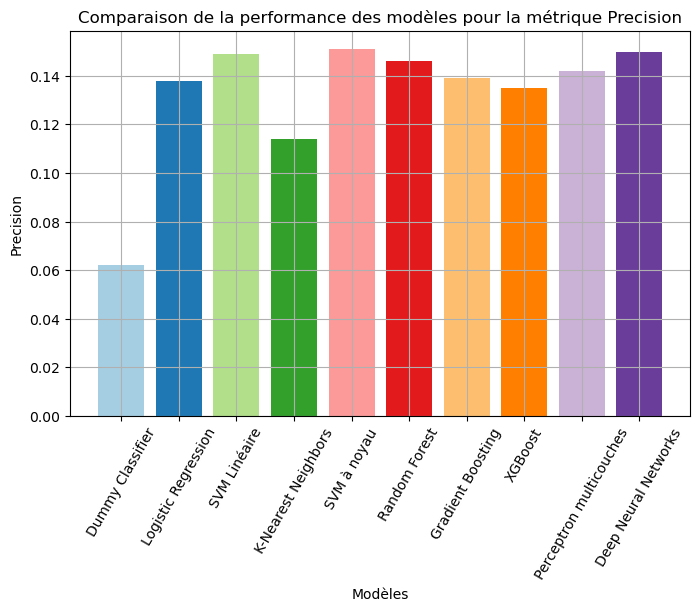

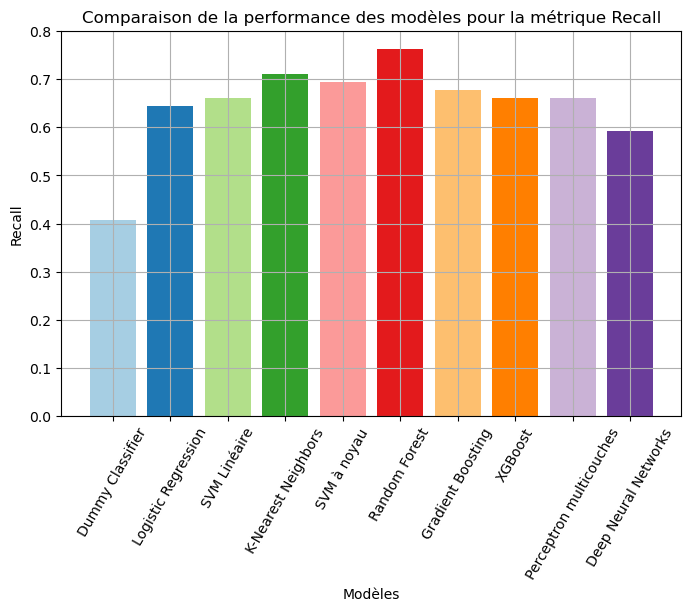

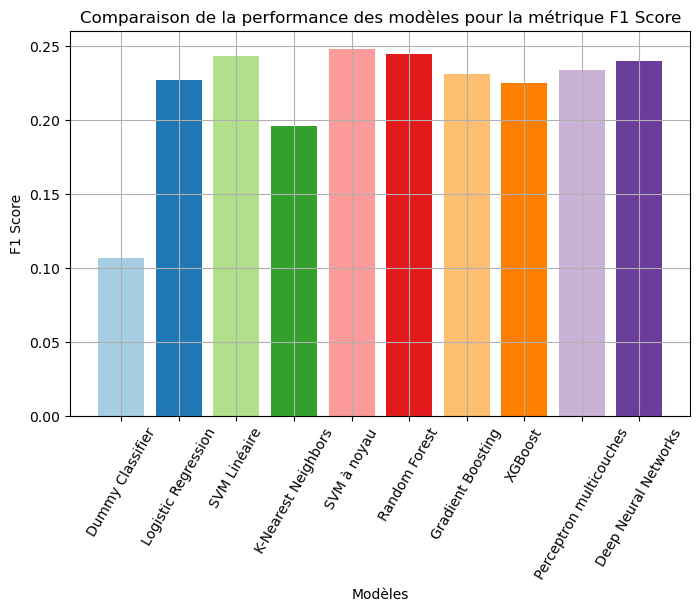

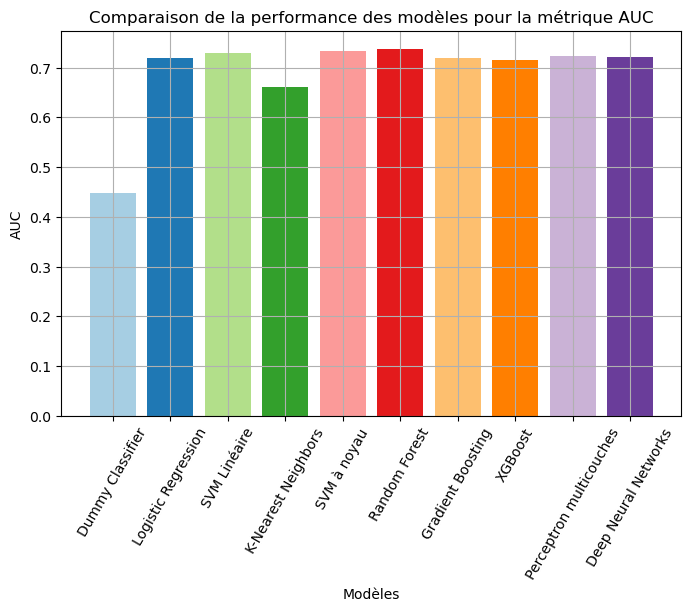

In [70]:
# Créer un graphique distinct pour chaque métrique
metrics = df_results.index
models = df_results.columns

# Plot pour chaque métrique
for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.bar(models, df_results.loc[metric], color=sns.color_palette("Paired", n_colors=10))
    plt.title(f'Comparaison de la performance des modèles pour la métrique {metric}')
    plt.xlabel('Modèles')
    plt.ylabel(metric)
    plt.grid(True)
    plt.xticks(rotation=60)
    plt.show()

#### Courbes ROC

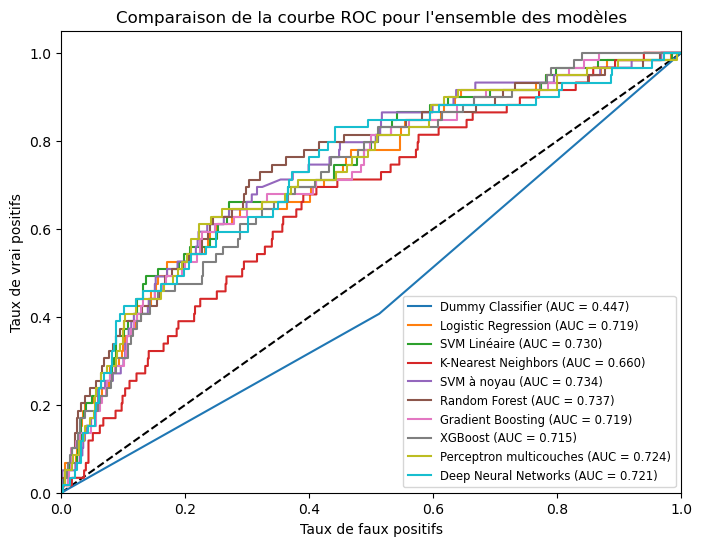

In [71]:
# Tracer la courbe ROC
def plot_roc_curve(y_true, y_prob, model_name):
    """
    Trace la courbe ROC pour un modèle donné et affiche la valeur AUC.

    Paramètres :
        y_true (array-like) : Les étiquettes réelles (cibles) de la classification.
        y_prob (array-like) : Les probabilités prédites par le modèle pour la classe positive.
        model_name (str) : Le nom du modèle utilisé pour l'affichage de la légende.

    Retour :
        None
    """
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc_score = roc_auc_score(y_true, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.3f})")

# Visualisation des courbes ROC
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')

for name, model in models_dict.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    plot_roc_curve(y_test, y_prob, name)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positifs')
plt.title("Comparaison de la courbe ROC pour l'ensemble des modèles")
plt.legend(loc='lower right', fontsize='small')
plt.show()

#### Matrices de confusion

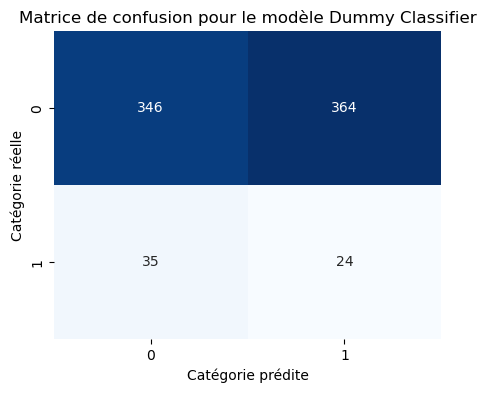

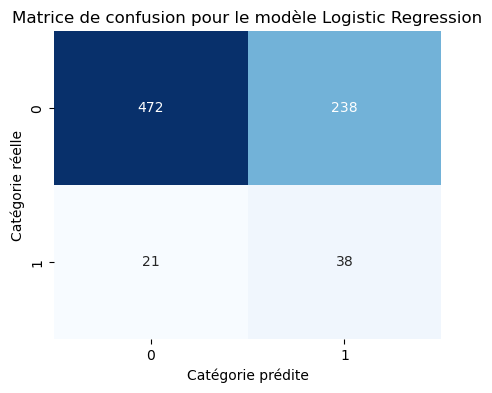

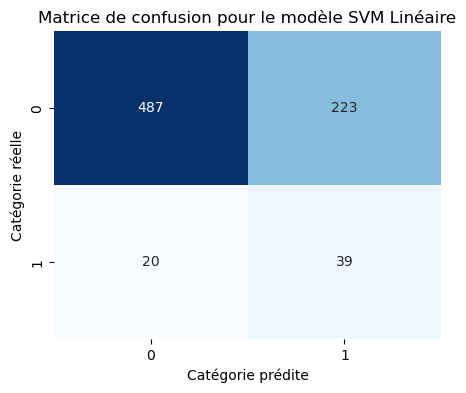

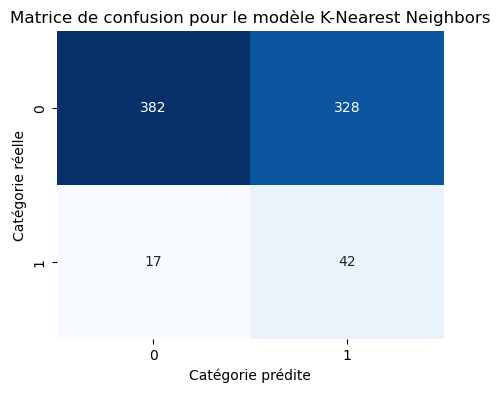

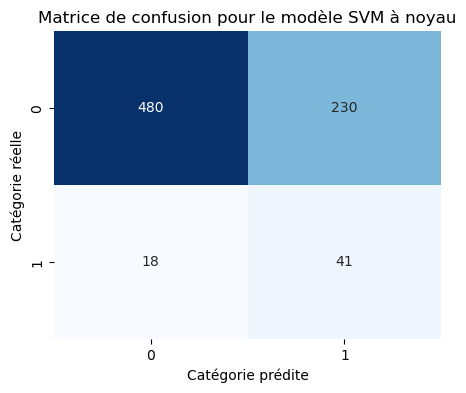

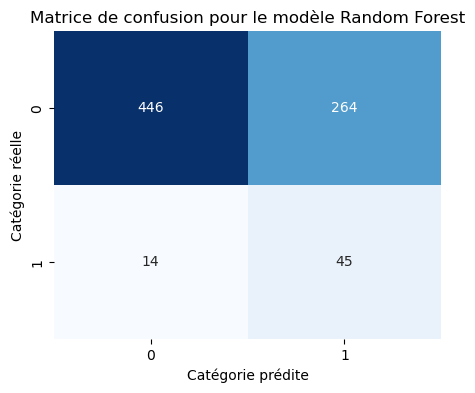

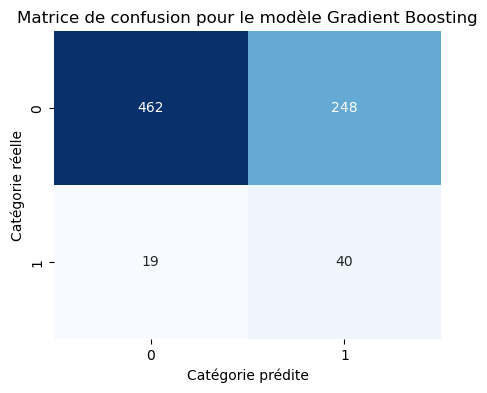

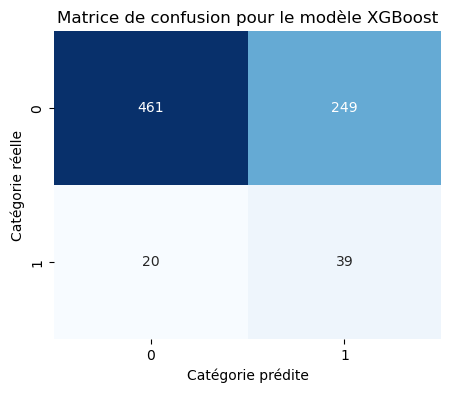

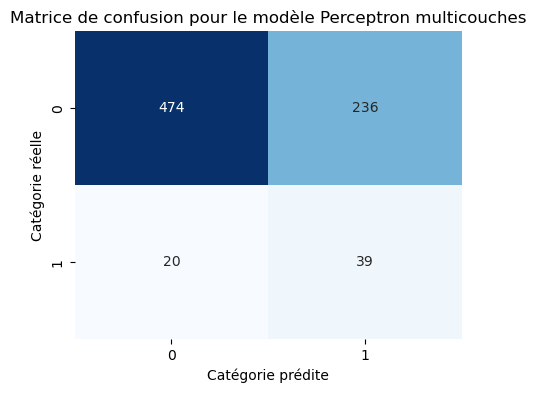

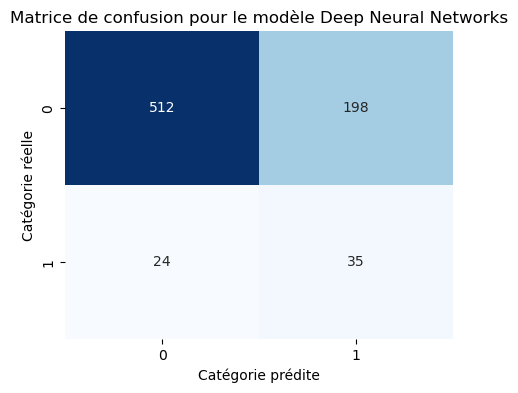

In [72]:
# Tracer la matrice de confusion
def plot_confusion_matrix(y_true, y_pred, model_name):
    """
    Affiche la matrice de confusion pour un modèle donné.

    Paramètres :
        y_true (array-like) : Les étiquettes réelles (cibles) de la classification.
        y_pred (array-like) : Les étiquettes prédites par le modèle.
        model_name (str) : Le nom du modèle utilisé pour l'affichage du titre.

    Retour :
        None
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matrice de confusion pour le modèle {model_name}')
    plt.xlabel('Catégorie prédite')
    plt.ylabel('Catégorie réelle')
    plt.show()

# Matrice de confusion pour chaque modèle
for name, model in models_dict.items():
    y_prob = model.predict(X_test)
    plot_confusion_matrix(y_test, y_prob, name)

### Sélection et enregistrement du modèle final

Le modèle de Random Forest (RF) semble être le plus approprié dans le cadre de ce projet en raison de sa très bonne performance dans les métriques clés :

- Score Métier : Le modèle RF a le score métier le plus faible (0,525), ce qui signifie qu'il est plus efficace pour minimiser les coûts associés aux erreurs de prédiction (faux positifs et faux négatifs) par rapport aux autres modèles.

- Accuracy : Le score d'accucary est plus faible que celui d'autres modèles, mais il est toujours compétitif.

- Precision : Ce modèle a un des meilleurs scores de précision (0,146). Dans notre contexte, cela signifie que lorsque le modèle prédit qu'un prêt ne sera pas remboursé (classe 1), il est très probable que ce soit effectivement le cas. Cela réduit les erreurs où les prêts remboursés à temps sont incorrectement classés comme défaillants.

- Recall : Le rappel du RF est bien meilleur que celui des autres modèles (0,763). C'est une métrique très importante dans ce projet car elle nous renseigne sur la capacité du modèle à identifier correctement les prêts défaillants afin de minimiser les pertes financières.

- F1 Score : Le RF obtient le deuxième meilleur F1 Score (0,245), ce qui indique un bon équilibre entre précision et rappel.

- AUC : Le RF a le meilleur AUC (0,737), suggérant une bonne capacité à discriminer les clients à risque de défaut de paiement et ceux susceptibles de rembourser leur prêt.

In [73]:
payment_default_model = rf_model
joblib.dump(payment_default_model, 'payment_default_model.joblib')

['payment_default_model.joblib']

## Analyse de la feature importance
### Analyse globale

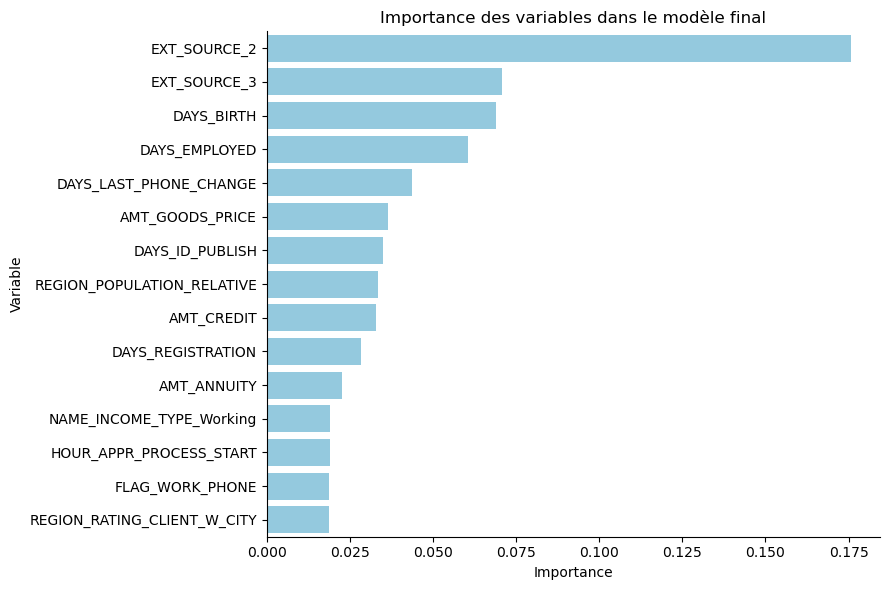

In [74]:
# Création du DataFrame df_plot directement à partir des données
df_plot = pd.DataFrame({
    'feature': X_test.columns,
    'importance': payment_default_model.feature_importances_
})

# Tri par ordre décroissant en fonction de l'importance des variables
df_plot.sort_values(by='importance', ascending=False, inplace=True)

# Création et affichage de la figure
plt.figure(figsize=(9, 6))
sns.barplot(data=df_plot.head(15), y='feature', x='importance', color='skyblue')
plt.title('Importance des variables dans le modèle final')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

Les variables les plus importantes dans la prédiction du modèle sont :
- `EXT_SOURCE_2` et `EXT_SOURCE_3` : Scores normalisés provenant d'une source de données externe.
- `DAYS_BIRTH` : Age du client au moment de la demande de crédit.
- `DAYS_EMPLOYED` : Nombre de jours depuis que le client a commencé son emploi actuel.

Ce sont les mêmes variables que celles qui présentent la plus forte corrélation avec notre cible (voir [Analyse bivariée](#Analyse-bivariée)).

### Analyse locale

In [75]:
# Création de l'explainer
explainer = shap.TreeExplainer(payment_default_model)

# Calcul des valeurs SHAP
shap_values = explainer.shap_values(X_test)

Représentation graphique de la feature importance locale avec shap.summary_plot :

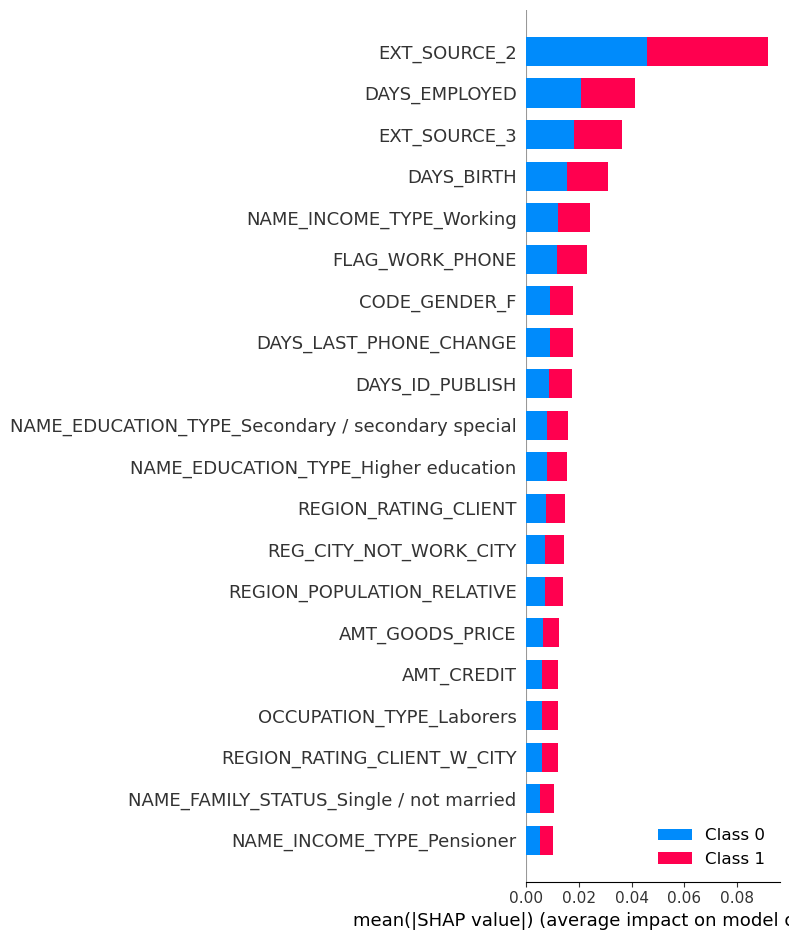

In [76]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

Les quatre variables les plus influentes dans la prédiction du modèle, selon la méthode d'explication locale SHAP, sont les mêmes que celles identifiées lors de l'analyse globale (mais dans un ordre différent).

#### Visualisation des valeurs SHAP pour un client ayant remboursé son prêt

In [77]:
customer_index = 0
print(f'Variable TARGET du client : {list(y_test)[customer_index]}')

Variable TARGET du client : 0.0


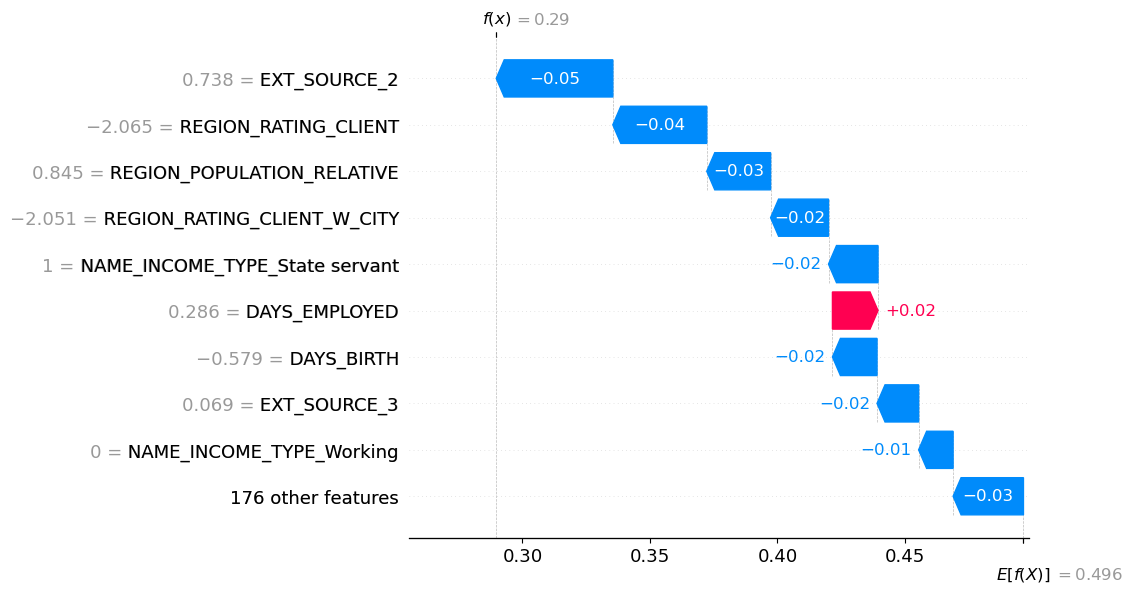

In [78]:
shap.waterfall_plot(shap.Explanation(
    values=-shap_values[0][customer_index], 
    base_values=explainer.expected_value[0], 
    data=X_test.iloc[customer_index], 
    feature_names=X_test.columns
))

**Interprétation générale :**

- Valeur de base :

Affichée en bas du graphique (E[f(x)]), c'est la prédiction moyenne du modèle sur l'ensemble des données de test. Cette valeur est ce à quoi le modèle s'attend sans aucune information supplémentaire spécifique à l'observation.

- Effets des variables :

Chaque barre du graphique représente une variable. Le déplacement de la valeur de la prédiction par rapport à la valeur de base est expliqué par l'effet de chaque variable :

    - Les barres qui se déplacent vers la droite augmentent la prédiction par rapport à la valeur de base (contributions positives).
    - Les barres qui se déplacent vers la gauche diminuent la prédiction par rapport à la valeur de base (contributions négatives).
    
- Importance des variables :

Plus une barre est longue, plus la variable associée a un impact important sur la prédiction du modèle.
Cela permet de visualiser quelles variables influencent le plus la prédiction dans un sens positif ou négatif.

- Valeur finale prédite :

Tout en haut du graphique, la valeur finale de la prédiction pour l'observation spécifique est affichée (f(x)). Cette valeur est obtenue en ajoutant ou soustrayant les contributions de toutes les variables à la valeur de base.

**Interprétation de l'observation :**

- La valeur de base du modèle sur l'ensemble de données de test est de 0,496 (la probabilité moyenne prédite par le modèle).
- Les variables `EXT_SOURCE_2`, `REGION_RATING_CLIENT` et `REGION_POPULATION_RELATIVE` ont les plus influentes sur la prédiction pour cette observation spécifique. Ces variables ont un effet négatif sur la prédiction, c'est-à-dire qu'elles contribuent à réduire la probabilité finale par rapport à la valeur de base.
- La prédiction finale est de 0,29, ce qui indique une probabilité de 29 % que l'observation (le client) appartienne à la classe positive. Le modèle prédit donc que **ce client a peu de chances de présenter un risque de défaut de paiement**, puisque la probabilité prédite est inférieure à la valeur de base de 0,496.

#### Visualisation des valeurs SHAP pour un client ayant un défaut de paiement

In [79]:
customer_index = 16
print(f'Variable TARGET du client : {list(y_test)[customer_index]}')

Variable TARGET du client : 1.0


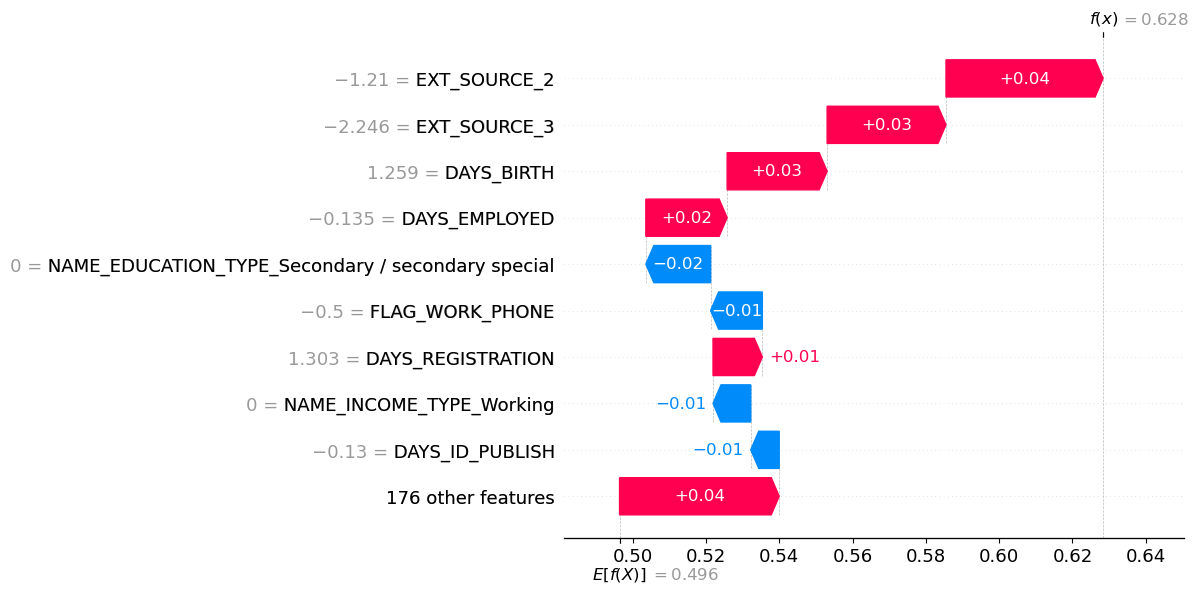

In [80]:
shap.waterfall_plot(shap.Explanation(
    values=-shap_values[0][customer_index], 
    base_values=explainer.expected_value[0], 
    data=X_test.iloc[customer_index], 
    feature_names=X_test.columns
))

- Les variables `EXT_SOURCE_2`, `EXT_SOURCE_3`, et `DAYS_BIRTH` ont les plus influentes sur la prédiction pour cette observation spécifique. Ces variables ont un effet positif sur la prédiction, c'est-à-dire qu'elles contribuent à augmenter la probabilité finale par rapport à la valeur de base.
- La prédiction finale est de 0,628, ce qui indique une probabilité de 62,8 % que l'observation (le client) appartienne à la classe positive. Le modèle prédit donc que **ce client a une probabilité élevée de présenter un risque de défaut de paiement**, puisque la probabilité prédite est supérieure à la valeur de base de 0,496.
- Si ce client souhaite améliorer ses chances d'obtenir un crédit, il pourrait travailler à augmenter la valeur des variables `EXT_SOURCE_2` et `EXT_SOURCE_3`, qui sont des indicateurs externes de solvabilité. De plus, attendre quelques années pour vieillir davantage (ce qui réduirait la valeur de `DAYS_BIRTH`, indiquant un âge plus avancé) et augmenter son ancienneté professionnelle (ce qui augmenterait la valeur de `DAYS_EMPLOYED`) pourraient également contribuer à améliorer son profil de crédit.

## Conclusion

Dans ce projet, nous avons développé un modèle de scoring crédit visant à évaluer la probabilité de défaut de paiement des clients bancaires. À travers une approche méthodique et structurée, nous avons construit un outil capable de prédire avec fiabilité le risque de crédit, tout en limitant les coûts liés aux erreurs de prédiction.

Le processus a commencé par une exploration approfondie des données, incluant la gestion des valeurs manquantes, des doublons, et des valeurs aberrantes. Nous avons ensuite procédé à un feature engineering pour enrichir les données existantes, suivi d'une normalisation des variables numériques et d'un encodage des variables catégorielles. L'équilibrage des classes a permis de répondre aux problèmes liés à la distribution déséquilibrée des classes de la variable cible.

Différentes approches de modélisation ont ensuite été explorées, allant des modèles simples comme la régression logistique et les K-Nearest Neighbors, jusqu'à des modèles plus complexes comme le Random Forest, le Gradient Boosting, XGBoost, et les réseaux de neurones. Grâce à une optimisation des hyperparamètres et une évaluation croisée des performances à l'aide de métriques telles que le score métier, l’accuracy, le score f1 et le AUC-ROC, nous avons pu sélectionner un modèle final performant et adapté aux besoins du métier.

De plus, nous avons pris soin d'analyser l'importance des variables afin d'assurer la transparence et l'interprétabilité du modèle, notamment grâce à l'utilisation des valeurs SHAP pour illustrer l'impact de chaque variable sur les prédictions. Cela permet non seulement de comprendre le fonctionnement global du modèle, mais aussi d'expliquer de manière précise les décisions individuelles concernant les clients.

En termes de perspectives, ce modèle sera prochainement déployé sous forme d'API pour permettre une utilisation en temps réel dans un environnement de production. 

Néanmoins, plusieurs axes d'amélioration peuvent encore être explorés pour optimiser les performances du modèle. Par exemple, des étapes supplémentaires de prétraitement et de feature engineering pourraient être envisagées. Cela inclut l'expérimentation avec d'autres techniques d'imputation des valeurs manquantes, telles que l'imputation par des modèles prédictifs comme les k-nearest neighbors (KNN Imputer) ou par régression multiple, qui pourraient mieux capturer la structure sous-jacente des données manquantes.

Des transformations mathématiques supplémentaires, comme la transformation Box-Cox ou Yeo-Johnson, pourraient également être testées pour normaliser les variables fortement asymétriques. Le feature engineering pourrait être affiné en générant des interactions entre variables ou en créant de nouvelles variables à partir des ratios ou différences de certaines colonnes pertinentes.

La gestion des outliers pourrait être améliorée avec des méthodes plus robustes, comme l'utilisation de modèles d'isolement (isolation forest) ou de méthodes de détection statistique avancée, afin de limiter leur impact sur la modélisation. Il serait également pertinent de revoir l'élimination des variables, en supprimant non seulement celles ayant peu d'importance, mais aussi celles qui introduisent de la colinéarité ou du bruit dans le modèle.

Du côté de l'encodage, au-delà des approches classiques comme le one-hot encoding, d'autres méthodes comme l'encodage binaire, l'encodage des cibles ou encore l'encodage fréquentiel pourraient être explorées pour améliorer la représentation des variables catégorielles.

En conclusion, ce projet a démontré la faisabilité d'un outil de scoring de crédit performant et transparent, apte à soutenir les décisions d'octroi de crédit dans le secteur bancaire. Il ouvre la voie à des opportunités de perfectionnement continu à mesure que de nouvelles données et méthodes deviennent disponibles.